# Lara Richards Honours Project 2021-2022
# Code takes a 31-year climatology of dryline variables, looks at a case study in June and October and analyses the relationship between the Australian monsoon and the dryline

# Common variarbles and slicing

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import scipy.ndimage as scind
#lat and lon coordinates for mapping
load = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/q/2000/q_era5_oper_pl_2000*')['q'].loc[:,925,-10:-30,110:155]
qlat = load.latitude # lat = 81
qlon = load.longitude # lon = 181
lat_r = np.radians(qlat) #lat in radians
lon_r = np.radians(qlon) #longitude in radians
r = 6371000 #radius of earth in m

#strings
UTC = ["0000","0100","0200","0300","0400","0500","0600","0700","0800","0900","1000","1100","1200","1300","1400","1500",\
     "1600","1700","1800","1900","2000","2100","2200","2300"]
month = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
monthlong = ["January","February","March","April","May","June","July","August","September","October","November","December"]

#months with 31 days normal year, index 1 is leap year
janstart = [0,0]
janstop = [31,31]
marstart = [59,60]
marstop = [90,91]
maystart = [120,121]
maystop = [151,152]
julstart = [181,182]
julstop = [212,213]
augstart = [212,213]
augstop = [243,244]
octstart = [273,274]
octstop = [304,305]
decstart = [334,335]
decstop = [365,366]
#months with 30 days normal year, index 1 is leapyear
aprstart = [90,91]
aprstop = [120,121]
junstart = [151,152]
junstop = [181,182]
sepstart = [243,244]
sepstop = [273,274]
novstart = [304,305]
novstop = [334,335]
# feb, index 1 is leap year
febstart = [31,31]
febstop = [59,60]

# Load in data files

In [4]:
#specific humidity gradient data load
q90 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1990/q_era5_oper_pl_1990*')['q'].loc[:,925,-10:-30,110:155]
q91 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1991/q_era5_oper_pl_1991*')['q'].loc[:,925,-10:-30,110:155]
q92 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1992/q_era5_oper_pl_1992*')['q'].loc[:,925,-10:-30,110:155]
q93 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1993/q_era5_oper_pl_1993*')['q'].loc[:,925,-10:-30,110:155]
q94 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1994/q_era5_oper_pl_1994*')['q'].loc[:,925,-10:-30,110:155]
q95 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1995/q_era5_oper_pl_1995*')['q'].loc[:,925,-10:-30,110:155]
q96 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1996/q_era5_oper_pl_1996*')['q'].loc[:,925,-10:-30,110:155]
q97 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1997/q_era5_oper_pl_1997*')['q'].loc[:,925,-10:-30,110:155]
q98 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1998/q_era5_oper_pl_1998*')['q'].loc[:,925,-10:-30,110:155]
q99 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1999/q_era5_oper_pl_1999*')['q'].loc[:,925,-10:-30,110:155]
q00 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2000/q_era5_oper_pl_2000*')['q'].loc[:,925,-10:-30,110:155]
q01 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2001/q_era5_oper_pl_2001*')['q'].loc[:,925,-10:-30,110:155]
q02 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2002/q_era5_oper_pl_2002*')['q'].loc[:,925,-10:-30,110:155]
q03 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2003/q_era5_oper_pl_2003*')['q'].loc[:,925,-10:-30,110:155]
q04 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2004/q_era5_oper_pl_2004*')['q'].loc[:,925,-10:-30,110:155]
q05 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2005/q_era5_oper_pl_2005*')['q'].loc[:,925,-10:-30,110:155]
q06 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2006/q_era5_oper_pl_2006*')['q'].loc[:,925,-10:-30,110:155]
q07 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2007/q_era5_oper_pl_2007*')['q'].loc[:,925,-10:-30,110:155]
q08 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2008/q_era5_oper_pl_2008*')['q'].loc[:,925,-10:-30,110:155]
q09 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2009/q_era5_oper_pl_2009*')['q'].loc[:,925,-10:-30,110:155]
q10 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2010/q_era5_oper_pl_2010*')['q'].loc[:,925,-10:-30,110:155]
q11 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2011/q_era5_oper_pl_2011*')['q'].loc[:,925,-10:-30,110:155]
q12 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2012/q_era5_oper_pl_2012*')['q'].loc[:,925,-10:-30,110:155]
q13 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2013/q_era5_oper_pl_2013*')['q'].loc[:,925,-10:-30,110:155]
q14 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2014/q_era5_oper_pl_2014*')['q'].loc[:,925,-10:-30,110:155]
q15 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2015/q_era5_oper_pl_2015*')['q'].loc[:,925,-10:-30,110:155]
q16 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2016/q_era5_oper_pl_2016*')['q'].loc[:,925,-10:-30,110:155]
q17 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2017/q_era5_oper_pl_2017*')['q'].loc[:,925,-10:-30,110:155]
q18 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2018/q_era5_oper_pl_2018*')['q'].loc[:,925,-10:-30,110:155]
q19 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2019/q_era5_oper_pl_2019*')['q'].loc[:,925,-10:-30,110:155]
q20 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2020/q_era5_oper_pl_2020*')['q'].loc[:,925,-10:-30,110:155]

In [2]:
#winds data dump
#u-wind data load
u90 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/1990/u_era5_oper_pl_1990*')['u'].loc[:,925,-10:-30,110:155]
u91 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/1991/u_era5_oper_pl_1991*')['u'].loc[:,925,-10:-30,110:155]
u92 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/1992/u_era5_oper_pl_1992*')['u'].loc[:,925,-10:-30,110:155]
u93 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/1993/u_era5_oper_pl_1993*')['u'].loc[:,925,-10:-30,110:155]
u94 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/1994/u_era5_oper_pl_1994*')['u'].loc[:,925,-10:-30,110:155]
u95 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/1995/u_era5_oper_pl_1995*')['u'].loc[:,925,-10:-30,110:155]
u96 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/1996/u_era5_oper_pl_1996*')['u'].loc[:,925,-10:-30,110:155]
u97 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/1997/u_era5_oper_pl_1997*')['u'].loc[:,925,-10:-30,110:155]
u98 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/1998/u_era5_oper_pl_1998*')['u'].loc[:,925,-10:-30,110:155]
u99 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/1999/u_era5_oper_pl_1999*')['u'].loc[:,925,-10:-30,110:155]
u00 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2000/u_era5_oper_pl_2000*')['u'].loc[:,925,-10:-30,110:155]
u01 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2001/u_era5_oper_pl_2001*')['u'].loc[:,925,-10:-30,110:155]
u02 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2002/u_era5_oper_pl_2002*')['u'].loc[:,925,-10:-30,110:155]
u03 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2003/u_era5_oper_pl_2003*')['u'].loc[:,925,-10:-30,110:155]
u04 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2004/u_era5_oper_pl_2004*')['u'].loc[:,925,-10:-30,110:155]
u05 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2005/u_era5_oper_pl_2005*')['u'].loc[:,925,-10:-30,110:155]
u06 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2006/u_era5_oper_pl_2006*')['u'].loc[:,925,-10:-30,110:155]
u07 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2007/u_era5_oper_pl_2007*')['u'].loc[:,925,-10:-30,110:155]
u08 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2008/u_era5_oper_pl_2008*')['u'].loc[:,925,-10:-30,110:155]
u09 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2009/u_era5_oper_pl_2009*')['u'].loc[:,925,-10:-30,110:155]
u10 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2010/u_era5_oper_pl_2010*')['u'].loc[:,925,-10:-30,110:155]
u11 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2011/u_era5_oper_pl_2011*')['u'].loc[:,925,-10:-30,110:155]
u12 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2012/u_era5_oper_pl_2012*')['u'].loc[:,925,-10:-30,110:155]
u13 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2013/u_era5_oper_pl_2013*')['u'].loc[:,925,-10:-30,110:155]
u14 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2014/u_era5_oper_pl_2014*')['u'].loc[:,925,-10:-30,110:155]
u15 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2015/u_era5_oper_pl_2015*')['u'].loc[:,925,-10:-30,110:155]
u16 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2016/u_era5_oper_pl_2016*')['u'].loc[:,925,-10:-30,110:155]
u17 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2017/u_era5_oper_pl_2017*')['u'].loc[:,925,-10:-30,110:155]
u18 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2018/u_era5_oper_pl_2018*')['u'].loc[:,925,-10:-30,110:155]
u19 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2019/u_era5_oper_pl_2019*')['u'].loc[:,925,-10:-30,110:155]
u20 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2020/u_era5_oper_pl_2020*')['u'].loc[:,925,-10:-30,110:155]
#------------------------------------------------------------------------------------------------------------------------------------------------------
#v-wind data load
v90 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/1990/v_era5_oper_pl_1990*')['v'].loc[:,925,-10:-30,110:155]
v91 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/1991/v_era5_oper_pl_1991*')['v'].loc[:,925,-10:-30,110:155]
v92 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/1992/v_era5_oper_pl_1992*')['v'].loc[:,925,-10:-30,110:155]
v93 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/1993/v_era5_oper_pl_1993*')['v'].loc[:,925,-10:-30,110:155]
v94 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/1994/v_era5_oper_pl_1994*')['v'].loc[:,925,-10:-30,110:155]
v95 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/1995/v_era5_oper_pl_1995*')['v'].loc[:,925,-10:-30,110:155]
v96 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/1996/v_era5_oper_pl_1996*')['v'].loc[:,925,-10:-30,110:155]
v97 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/1997/v_era5_oper_pl_1997*')['v'].loc[:,925,-10:-30,110:155]
v98 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/1998/v_era5_oper_pl_1998*')['v'].loc[:,925,-10:-30,110:155]
v99 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/1999/v_era5_oper_pl_1999*')['v'].loc[:,925,-10:-30,110:155]
v00 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2000/v_era5_oper_pl_2000*')['v'].loc[:,925,-10:-30,110:155]
v01 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2001/v_era5_oper_pl_2001*')['v'].loc[:,925,-10:-30,110:155]
v02 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2002/v_era5_oper_pl_2002*')['v'].loc[:,925,-10:-30,110:155]
v03 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2003/v_era5_oper_pl_2003*')['v'].loc[:,925,-10:-30,110:155]
v04 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2004/v_era5_oper_pl_2004*')['v'].loc[:,925,-10:-30,110:155]
v05 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2005/v_era5_oper_pl_2005*')['v'].loc[:,925,-10:-30,110:155]
v06 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2006/v_era5_oper_pl_2006*')['v'].loc[:,925,-10:-30,110:155]
v07 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2007/v_era5_oper_pl_2007*')['v'].loc[:,925,-10:-30,110:155]
v08 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2008/v_era5_oper_pl_2008*')['v'].loc[:,925,-10:-30,110:155]
v09 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2009/v_era5_oper_pl_2009*')['v'].loc[:,925,-10:-30,110:155]
v10 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2010/v_era5_oper_pl_2010*')['v'].loc[:,925,-10:-30,110:155]
v11 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2011/v_era5_oper_pl_2011*')['v'].loc[:,925,-10:-30,110:155]
v12 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2012/v_era5_oper_pl_2012*')['v'].loc[:,925,-10:-30,110:155]
v13 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2013/v_era5_oper_pl_2013*')['v'].loc[:,925,-10:-30,110:155]
v14 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2014/v_era5_oper_pl_2014*')['v'].loc[:,925,-10:-30,110:155]
v15 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2015/v_era5_oper_pl_2015*')['v'].loc[:,925,-10:-30,110:155]
v16 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2016/v_era5_oper_pl_2016*')['v'].loc[:,925,-10:-30,110:155]
v17 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2017/v_era5_oper_pl_2017*')['v'].loc[:,925,-10:-30,110:155]
v18 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2018/v_era5_oper_pl_2018*')['v'].loc[:,925,-10:-30,110:155]
v19 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2019/v_era5_oper_pl_2019*')['v'].loc[:,925,-10:-30,110:155]
v20 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2020/v_era5_oper_pl_2020*')['v'].loc[:,925,-10:-30,110:155]

In [3]:
#geopotential height data load
z90 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/1990/z_era5_oper_pl_1990*')['z'].loc[:,925,-10:-30,110:155]
z91 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/1991/z_era5_oper_pl_1991*')['z'].loc[:,925,-10:-30,110:155]
z92 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/1992/z_era5_oper_pl_1992*')['z'].loc[:,925,-10:-30,110:155]
z93 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/1993/z_era5_oper_pl_1993*')['z'].loc[:,925,-10:-30,110:155]
z94 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/1994/z_era5_oper_pl_1994*')['z'].loc[:,925,-10:-30,110:155]
z95 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/1995/z_era5_oper_pl_1995*')['z'].loc[:,925,-10:-30,110:155]
z96 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/1996/z_era5_oper_pl_1996*')['z'].loc[:,925,-10:-30,110:155]
z97 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/1997/z_era5_oper_pl_1997*')['z'].loc[:,925,-10:-30,110:155]
z98 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/1998/z_era5_oper_pl_1998*')['z'].loc[:,925,-10:-30,110:155]
z99 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/1999/z_era5_oper_pl_1999*')['z'].loc[:,925,-10:-30,110:155]
z00 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2000/z_era5_oper_pl_2000*')['z'].loc[:,925,-10:-30,110:155]
z01 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2001/z_era5_oper_pl_2001*')['z'].loc[:,925,-10:-30,110:155]
z02 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2002/z_era5_oper_pl_2002*')['z'].loc[:,925,-10:-30,110:155]
z03 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2003/z_era5_oper_pl_2003*')['z'].loc[:,925,-10:-30,110:155]
z04 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2004/z_era5_oper_pl_2004*')['z'].loc[:,925,-10:-30,110:155]
z05 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2005/z_era5_oper_pl_2005*')['z'].loc[:,925,-10:-30,110:155]
z06 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2006/z_era5_oper_pl_2006*')['z'].loc[:,925,-10:-30,110:155]
z07 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2007/z_era5_oper_pl_2007*')['z'].loc[:,925,-10:-30,110:155]
z08 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2008/z_era5_oper_pl_2008*')['z'].loc[:,925,-10:-30,110:155]
z09 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2009/z_era5_oper_pl_2009*')['z'].loc[:,925,-10:-30,110:155]
z10 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2010/z_era5_oper_pl_2010*')['z'].loc[:,925,-10:-30,110:155]
z11 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2011/z_era5_oper_pl_2011*')['z'].loc[:,925,-10:-30,110:155]
z12 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2012/z_era5_oper_pl_2012*')['z'].loc[:,925,-10:-30,110:155]
z13 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2013/z_era5_oper_pl_2013*')['z'].loc[:,925,-10:-30,110:155]
z14 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2014/z_era5_oper_pl_2014*')['z'].loc[:,925,-10:-30,110:155]
z15 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2015/z_era5_oper_pl_2015*')['z'].loc[:,925,-10:-30,110:155]
z16 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2016/z_era5_oper_pl_2016*')['z'].loc[:,925,-10:-30,110:155]
z17 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2017/z_era5_oper_pl_2017*')['z'].loc[:,925,-10:-30,110:155]
z18 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2018/z_era5_oper_pl_2018*')['z'].loc[:,925,-10:-30,110:155]
z19 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2019/z_era5_oper_pl_2019*')['z'].loc[:,925,-10:-30,110:155]
z20 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2020/z_era5_oper_pl_2020*')['z'].loc[:,925,-10:-30,110:155]


In [3]:
#divergence/convergence data load
d90 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/1990/d_era5_oper_pl_1990*')['d'].loc[:,925,-10:-30,110:155]
d91 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/1991/d_era5_oper_pl_1991*')['d'].loc[:,925,-10:-30,110:155]
d92 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/1992/d_era5_oper_pl_1992*')['d'].loc[:,925,-10:-30,110:155]
d93 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/1993/d_era5_oper_pl_1993*')['d'].loc[:,925,-10:-30,110:155]
d94 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/1994/d_era5_oper_pl_1994*')['d'].loc[:,925,-10:-30,110:155]
d95 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/1995/d_era5_oper_pl_1995*')['d'].loc[:,925,-10:-30,110:155]
d96 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/1996/d_era5_oper_pl_1996*')['d'].loc[:,925,-10:-30,110:155]
d97 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/1997/d_era5_oper_pl_1997*')['d'].loc[:,925,-10:-30,110:155]
d98 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/1998/d_era5_oper_pl_1998*')['d'].loc[:,925,-10:-30,110:155]
d99 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/1999/d_era5_oper_pl_1999*')['d'].loc[:,925,-10:-30,110:155]
d00 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2000/d_era5_oper_pl_2000*')['d'].loc[:,925,-10:-30,110:155]
d01 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2001/d_era5_oper_pl_2001*')['d'].loc[:,925,-10:-30,110:155]
d02 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2002/d_era5_oper_pl_2002*')['d'].loc[:,925,-10:-30,110:155]
d03 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2003/d_era5_oper_pl_2003*')['d'].loc[:,925,-10:-30,110:155]
d04 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2004/d_era5_oper_pl_2004*')['d'].loc[:,925,-10:-30,110:155]
d05 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2005/d_era5_oper_pl_2005*')['d'].loc[:,925,-10:-30,110:155]
d06 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2006/d_era5_oper_pl_2006*')['d'].loc[:,925,-10:-30,110:155]
d07 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2007/d_era5_oper_pl_2007*')['d'].loc[:,925,-10:-30,110:155]
d08 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2008/d_era5_oper_pl_2008*')['d'].loc[:,925,-10:-30,110:155]
d09 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2009/d_era5_oper_pl_2009*')['d'].loc[:,925,-10:-30,110:155]
d10 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2010/d_era5_oper_pl_2010*')['d'].loc[:,925,-10:-30,110:155]
d11 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2011/d_era5_oper_pl_2011*')['d'].loc[:,925,-10:-30,110:155]
d12 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2012/d_era5_oper_pl_2012*')['d'].loc[:,925,-10:-30,110:155]
d13 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2013/d_era5_oper_pl_2013*')['d'].loc[:,925,-10:-30,110:155]
d14 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2014/d_era5_oper_pl_2014*')['d'].loc[:,925,-10:-30,110:155]
d15 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2015/d_era5_oper_pl_2015*')['d'].loc[:,925,-10:-30,110:155]
d16 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2016/d_era5_oper_pl_2016*')['d'].loc[:,925,-10:-30,110:155]
d17 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2017/d_era5_oper_pl_2017*')['d'].loc[:,925,-10:-30,110:155]
d18 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2018/d_era5_oper_pl_2018*')['d'].loc[:,925,-10:-30,110:155]
d19 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2019/d_era5_oper_pl_2019*')['d'].loc[:,925,-10:-30,110:155]
d20 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2020/d_era5_oper_pl_2020*')['d'].loc[:,925,-10:-30,110:155]

In [3]:
#SST data load *****important note this is single level data taken at the sfc not at 925hPa******
sst90 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/1990/sst_era5_oper_sfc_1990*')['sst'].loc[:,-10:-30,110:155]
sst91 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/1991/sst_era5_oper_sfc_1991*')['sst'].loc[:,-10:-30,110:155]
sst92 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/1992/sst_era5_oper_sfc_1992*')['sst'].loc[:,-10:-30,110:155]
sst93 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/1993/sst_era5_oper_sfc_1993*')['sst'].loc[:,-10:-30,110:155]
sst94 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/1994/sst_era5_oper_sfc_1994*')['sst'].loc[:,-10:-30,110:155]
sst95 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/1995/sst_era5_oper_sfc_1995*')['sst'].loc[:,-10:-30,110:155]
sst96 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/1996/sst_era5_oper_sfc_1996*')['sst'].loc[:,-10:-30,110:155]
sst97 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/1997/sst_era5_oper_sfc_1997*')['sst'].loc[:,-10:-30,110:155]
sst98 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/1998/sst_era5_oper_sfc_1998*')['sst'].loc[:,-10:-30,110:155]
sst99 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/1999/sst_era5_oper_sfc_1999*')['sst'].loc[:,-10:-30,110:155]
sst00 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2000/sst_era5_oper_sfc_2000*')['sst'].loc[:,-10:-30,110:155]
sst01 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2001/sst_era5_oper_sfc_2001*')['sst'].loc[:,-10:-30,110:155]
sst02 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2002/sst_era5_oper_sfc_2002*')['sst'].loc[:,-10:-30,110:155]
sst03 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2003/sst_era5_oper_sfc_2003*')['sst'].loc[:,-10:-30,110:155]
sst04 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2004/sst_era5_oper_sfc_2004*')['sst'].loc[:,-10:-30,110:155]
sst05 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2005/sst_era5_oper_sfc_2005*')['sst'].loc[:,-10:-30,110:155]
sst06 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2006/sst_era5_oper_sfc_2006*')['sst'].loc[:,-10:-30,110:155]
sst07 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2007/sst_era5_oper_sfc_2007*')['sst'].loc[:,-10:-30,110:155]
sst08 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2008/sst_era5_oper_sfc_2008*')['sst'].loc[:,-10:-30,110:155]
sst09 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2009/sst_era5_oper_sfc_2009*')['sst'].loc[:,-10:-30,110:155]
sst10 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2010/sst_era5_oper_sfc_2010*')['sst'].loc[:,-10:-30,110:155]
sst11 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2011/sst_era5_oper_sfc_2011*')['sst'].loc[:,-10:-30,110:155]
sst12 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2012/sst_era5_oper_sfc_2012*')['sst'].loc[:,-10:-30,110:155]
sst13 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2013/sst_era5_oper_sfc_2013*')['sst'].loc[:,-10:-30,110:155]
sst14 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2014/sst_era5_oper_sfc_2014*')['sst'].loc[:,-10:-30,110:155]
sst15 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2015/sst_era5_oper_sfc_2015*')['sst'].loc[:,-10:-30,110:155]
sst16 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2016/sst_era5_oper_sfc_2016*')['sst'].loc[:,-10:-30,110:155]
sst17 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2017/sst_era5_oper_sfc_2017*')['sst'].loc[:,-10:-30,110:155]
sst18 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2018/sst_era5_oper_sfc_2018*')['sst'].loc[:,-10:-30,110:155]
sst19 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2019/sst_era5_oper_sfc_2019*')['sst'].loc[:,-10:-30,110:155]
sst20 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/sst/2020/sst_era5_oper_sfc_2020*')['sst'].loc[:,-10:-30,110:155]

In [3]:
# mean total precipitaton rate mtpr for precip climo in units Kg m**-2 s**-1
#this is also single level data taken at the sfc not a 925hpa
mtpr90 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1990/mtpr_era5_oper_sfc_1990*')['mtpr'].loc[:,-10:-30,110:155]
mtpr91 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1991/mtpr_era5_oper_sfc_1991*')['mtpr'].loc[:,-10:-30,110:155]
mtpr92 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1992/mtpr_era5_oper_sfc_1992*')['mtpr'].loc[:,-10:-30,110:155]
mtpr93 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1993/mtpr_era5_oper_sfc_1993*')['mtpr'].loc[:,-10:-30,110:155]
mtpr94 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1994/mtpr_era5_oper_sfc_1994*')['mtpr'].loc[:,-10:-30,110:155]
mtpr95 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1995/mtpr_era5_oper_sfc_1995*')['mtpr'].loc[:,-10:-30,110:155]
mtpr96 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1996/mtpr_era5_oper_sfc_1996*')['mtpr'].loc[:,-10:-30,110:155]
mtpr97 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1997/mtpr_era5_oper_sfc_1997*')['mtpr'].loc[:,-10:-30,110:155]
mtpr98 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1998/mtpr_era5_oper_sfc_1998*')['mtpr'].loc[:,-10:-30,110:155]
mtpr99 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1999/mtpr_era5_oper_sfc_1999*')['mtpr'].loc[:,-10:-30,110:155]
mtpr00 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2000/mtpr_era5_oper_sfc_2000*')['mtpr'].loc[:,-10:-30,110:155]
mtpr01 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2001/mtpr_era5_oper_sfc_2001*')['mtpr'].loc[:,-10:-30,110:155]
mtpr02 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2002/mtpr_era5_oper_sfc_2002*')['mtpr'].loc[:,-10:-30,110:155]
mtpr03 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2003/mtpr_era5_oper_sfc_2003*')['mtpr'].loc[:,-10:-30,110:155]
mtpr04 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2004/mtpr_era5_oper_sfc_2004*')['mtpr'].loc[:,-10:-30,110:155]
mtpr05 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2005/mtpr_era5_oper_sfc_2005*')['mtpr'].loc[:,-10:-30,110:155]
mtpr06 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2006/mtpr_era5_oper_sfc_2006*')['mtpr'].loc[:,-10:-30,110:155]
mtpr07 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2007/mtpr_era5_oper_sfc_2007*')['mtpr'].loc[:,-10:-30,110:155]
mtpr08 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2008/mtpr_era5_oper_sfc_2008*')['mtpr'].loc[:,-10:-30,110:155]
mtpr09 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2009/mtpr_era5_oper_sfc_2009*')['mtpr'].loc[:,-10:-30,110:155]
mtpr10 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2010/mtpr_era5_oper_sfc_2010*')['mtpr'].loc[:,-10:-30,110:155]
mtpr11 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2011/mtpr_era5_oper_sfc_2011*')['mtpr'].loc[:,-10:-30,110:155]
mtpr12 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2012/mtpr_era5_oper_sfc_2012*')['mtpr'].loc[:,-10:-30,110:155]
mtpr13 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2013/mtpr_era5_oper_sfc_2013*')['mtpr'].loc[:,-10:-30,110:155]
mtpr14 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2014/mtpr_era5_oper_sfc_2014*')['mtpr'].loc[:,-10:-30,110:155]
mtpr15 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2015/mtpr_era5_oper_sfc_2015*')['mtpr'].loc[:,-10:-30,110:155]
mtpr16 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2016/mtpr_era5_oper_sfc_2016*')['mtpr'].loc[:,-10:-30,110:155]
mtpr17 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2017/mtpr_era5_oper_sfc_2017*')['mtpr'].loc[:,-10:-30,110:155]
mtpr18 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2018/mtpr_era5_oper_sfc_2018*')['mtpr'].loc[:,-10:-30,110:155]
mtpr19 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2019/mtpr_era5_oper_sfc_2019*')['mtpr'].loc[:,-10:-30,110:155]
mtpr20 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2020/mtpr_era5_oper_sfc_2020*')['mtpr'].loc[:,-10:-30,110:155]

In [2]:
# This is altered for the monsoon box in northern Aus
# mean total precipitaton rate mtpr for precip climo in units Kg m**-2 s**-1
#this is also single level data taken at the sfc not a 925hpa
mtpr90 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1990/mtpr_era5_oper_sfc_1990*')['mtpr'].loc[:,-10:-20,120:150]
mtpr91 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1991/mtpr_era5_oper_sfc_1991*')['mtpr'].loc[:,-10:-20,120:150]
mtpr92 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1992/mtpr_era5_oper_sfc_1992*')['mtpr'].loc[:,-10:-20,120:150]
mtpr93 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1993/mtpr_era5_oper_sfc_1993*')['mtpr'].loc[:,-10:-20,120:150]
mtpr94 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1994/mtpr_era5_oper_sfc_1994*')['mtpr'].loc[:,-10:-20,120:150]
mtpr95 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1995/mtpr_era5_oper_sfc_1995*')['mtpr'].loc[:,-10:-20,120:150]
mtpr96 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1996/mtpr_era5_oper_sfc_1996*')['mtpr'].loc[:,-10:-20,120:150]
mtpr97 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1997/mtpr_era5_oper_sfc_1997*')['mtpr'].loc[:,-10:-20,120:150]
mtpr98 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1998/mtpr_era5_oper_sfc_1998*')['mtpr'].loc[:,-10:-20,120:150]
mtpr99 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/1999/mtpr_era5_oper_sfc_1999*')['mtpr'].loc[:,-10:-20,120:150]
mtpr00 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2000/mtpr_era5_oper_sfc_2000*')['mtpr'].loc[:,-10:-20,120:150]
mtpr01 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2001/mtpr_era5_oper_sfc_2001*')['mtpr'].loc[:,-10:-20,120:150]
mtpr02 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2002/mtpr_era5_oper_sfc_2002*')['mtpr'].loc[:,-10:-20,120:150]
mtpr03 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2003/mtpr_era5_oper_sfc_2003*')['mtpr'].loc[:,-10:-20,120:150]
mtpr04 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2004/mtpr_era5_oper_sfc_2004*')['mtpr'].loc[:,-10:-20,120:150]
mtpr05 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2005/mtpr_era5_oper_sfc_2005*')['mtpr'].loc[:,-10:-20,120:150]
mtpr06 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2006/mtpr_era5_oper_sfc_2006*')['mtpr'].loc[:,-10:-20,120:150]
mtpr07 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2007/mtpr_era5_oper_sfc_2007*')['mtpr'].loc[:,-10:-20,120:150]
mtpr08 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2008/mtpr_era5_oper_sfc_2008*')['mtpr'].loc[:,-10:-20,120:150]
mtpr09 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2009/mtpr_era5_oper_sfc_2009*')['mtpr'].loc[:,-10:-20,120:150]
mtpr10 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2010/mtpr_era5_oper_sfc_2010*')['mtpr'].loc[:,-10:-20,120:150]
mtpr11 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2011/mtpr_era5_oper_sfc_2011*')['mtpr'].loc[:,-10:-20,120:150]
mtpr12 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2012/mtpr_era5_oper_sfc_2012*')['mtpr'].loc[:,-10:-20,120:150]
mtpr13 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2013/mtpr_era5_oper_sfc_2013*')['mtpr'].loc[:,-10:-20,120:150]
mtpr14 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2014/mtpr_era5_oper_sfc_2014*')['mtpr'].loc[:,-10:-20,120:150]
mtpr15 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2015/mtpr_era5_oper_sfc_2015*')['mtpr'].loc[:,-10:-20,120:150]
mtpr16 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2016/mtpr_era5_oper_sfc_2016*')['mtpr'].loc[:,-10:-20,120:150]
mtpr17 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2017/mtpr_era5_oper_sfc_2017*')['mtpr'].loc[:,-10:-20,120:150]
mtpr18 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2018/mtpr_era5_oper_sfc_2018*')['mtpr'].loc[:,-10:-20,120:150]
mtpr19 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2019/mtpr_era5_oper_sfc_2019*')['mtpr'].loc[:,-10:-20,120:150]
mtpr20 = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2020/mtpr_era5_oper_sfc_2020*')['mtpr'].loc[:,-10:-20,120:150]

In [3]:
t90 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/1990/t_era5_oper_pl_1990*')['t'].loc[:,925,-10:-30,110:155]
t91 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/1991/t_era5_oper_pl_1991*')['t'].loc[:,925,-10:-30,110:155]
t92 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/1992/t_era5_oper_pl_1992*')['t'].loc[:,925,-10:-30,110:155]
t93 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/1993/t_era5_oper_pl_1993*')['t'].loc[:,925,-10:-30,110:155]
t94 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/1994/t_era5_oper_pl_1994*')['t'].loc[:,925,-10:-30,110:155]
t95 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/1995/t_era5_oper_pl_1995*')['t'].loc[:,925,-10:-30,110:155]
t96 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/1996/t_era5_oper_pl_1996*')['t'].loc[:,925,-10:-30,110:155]
t97 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/1997/t_era5_oper_pl_1997*')['t'].loc[:,925,-10:-30,110:155]
t98 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/1998/t_era5_oper_pl_1998*')['t'].loc[:,925,-10:-30,110:155]
t99 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/1999/t_era5_oper_pl_1999*')['t'].loc[:,925,-10:-30,110:155]
t00 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2000/t_era5_oper_pl_2000*')['t'].loc[:,925,-10:-30,110:155]
t01 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2001/t_era5_oper_pl_2001*')['t'].loc[:,925,-10:-30,110:155]
t02 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2002/t_era5_oper_pl_2002*')['t'].loc[:,925,-10:-30,110:155]
t03 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2003/t_era5_oper_pl_2003*')['t'].loc[:,925,-10:-30,110:155]
t04 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2004/t_era5_oper_pl_2004*')['t'].loc[:,925,-10:-30,110:155]
t05 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2005/t_era5_oper_pl_2005*')['t'].loc[:,925,-10:-30,110:155]
t06 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2006/t_era5_oper_pl_2006*')['t'].loc[:,925,-10:-30,110:155]
t07 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2007/t_era5_oper_pl_2007*')['t'].loc[:,925,-10:-30,110:155]
t08 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2008/t_era5_oper_pl_2008*')['t'].loc[:,925,-10:-30,110:155]
t09 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2009/t_era5_oper_pl_2009*')['t'].loc[:,925,-10:-30,110:155]
t10 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2010/t_era5_oper_pl_2010*')['t'].loc[:,925,-10:-30,110:155]
t11 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2011/t_era5_oper_pl_2011*')['t'].loc[:,925,-10:-30,110:155]
t12 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2012/t_era5_oper_pl_2012*')['t'].loc[:,925,-10:-30,110:155]
t13 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2013/t_era5_oper_pl_2013*')['t'].loc[:,925,-10:-30,110:155]
t14 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2014/t_era5_oper_pl_2014*')['t'].loc[:,925,-10:-30,110:155]
t15 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2015/t_era5_oper_pl_2015*')['t'].loc[:,925,-10:-30,110:155]
t16 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2016/t_era5_oper_pl_2016*')['t'].loc[:,925,-10:-30,110:155]
t17 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2017/t_era5_oper_pl_2017*')['t'].loc[:,925,-10:-30,110:155]
t18 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2018/t_era5_oper_pl_2018*')['t'].loc[:,925,-10:-30,110:155]
t19 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2019/t_era5_oper_pl_2019*')['t'].loc[:,925,-10:-30,110:155]
t20 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/t/2020/t_era5_oper_pl_2020*')['t'].loc[:,925,-10:-30,110:155]

In [5]:
#potential temperature conversion
pot90=t90*(1000/t90.level)**0.286
pot91=t91*(1000/t91.level)**0.286
pot92=t92*(1000/t92.level)**0.286
pot93=t93*(1000/t93.level)**0.286
pot94=t94*(1000/t94.level)**0.286
pot95=t95*(1000/t95.level)**0.286
pot96=t96*(1000/t96.level)**0.286
pot97=t97*(1000/t97.level)**0.286
pot98=t98*(1000/t98.level)**0.286
pot99=t99*(1000/t99.level)**0.286
pot00=t00*(1000/t00.level)**0.286
pot01=t01*(1000/t01.level)**0.286
pot02=t02*(1000/t02.level)**0.286
pot03=t03*(1000/t03.level)**0.286
pot04=t04*(1000/t04.level)**0.286
pot05=t05*(1000/t05.level)**0.286
pot06=t06*(1000/t06.level)**0.286
pot07=t07*(1000/t07.level)**0.286
pot08=t08*(1000/t08.level)**0.286
pot09=t09*(1000/t09.level)**0.286
pot10=t10*(1000/t10.level)**0.286
pot11=t11*(1000/t11.level)**0.286
pot12=t12*(1000/t12.level)**0.286
pot13=t13*(1000/t13.level)**0.286
pot14=t14*(1000/t14.level)**0.286
pot15=t15*(1000/t15.level)**0.286
pot16=t16*(1000/t16.level)**0.286
pot17=t17*(1000/t17.level)**0.286
pot18=t18*(1000/t18.level)**0.286
pot19=t19*(1000/t19.level)**0.286
pot20=t20*(1000/t20.level)**0.286

In [2]:
# load in variables for vertical cross section
temp90 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1990/q_era5_oper_pl_1990*')['q'].loc[:,500:1000,-16,110:130]
temp91 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1991/q_era5_oper_pl_1991*')['q'].loc[:,500:1000,-16,110:130]
temp92 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1992/q_era5_oper_pl_1992*')['q'].loc[:,500:1000,-16,110:130]
temp93 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1993/q_era5_oper_pl_1993*')['q'].loc[:,500:1000,-16,110:130]
temp94 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1994/q_era5_oper_pl_1994*')['q'].loc[:,500:1000,-16,110:130]
temp95 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1995/q_era5_oper_pl_1995*')['q'].loc[:,500:1000,-16,110:130]
temp96 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1996/q_era5_oper_pl_1996*')['q'].loc[:,500:1000,-16,110:130]
temp97 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1997/q_era5_oper_pl_1997*')['q'].loc[:,500:1000,-16,110:130]
temp98 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1998/q_era5_oper_pl_1998*')['q'].loc[:,500:1000,-16,110:130]
temp99 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/1999/q_era5_oper_pl_1999*')['q'].loc[:,500:1000,-16,110:130]
temp00 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2000/q_era5_oper_pl_2000*')['q'].loc[:,500:1000,-16,110:130]
temp01 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2001/q_era5_oper_pl_2001*')['q'].loc[:,500:1000,-16,110:130]
temp02 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2002/q_era5_oper_pl_2002*')['q'].loc[:,500:1000,-16,110:130]
temp03 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2003/q_era5_oper_pl_2003*')['q'].loc[:,500:1000,-16,110:130]
temp04 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2004/q_era5_oper_pl_2004*')['q'].loc[:,500:1000,-16,110:130]
temp05 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2005/q_era5_oper_pl_2005*')['q'].loc[:,500:1000,-16,110:130]
temp06 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2006/q_era5_oper_pl_2006*')['q'].loc[:,500:1000,-16,110:130]
temp07 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2007/q_era5_oper_pl_2007*')['q'].loc[:,500:1000,-16,110:130]
temp08 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2008/q_era5_oper_pl_2008*')['q'].loc[:,500:1000,-16,110:130]
temp09 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2009/q_era5_oper_pl_2009*')['q'].loc[:,500:1000,-16,110:130]
temp10 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2010/q_era5_oper_pl_2010*')['q'].loc[:,500:1000,-16,110:130]
temp11 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2011/q_era5_oper_pl_2011*')['q'].loc[:,500:1000,-16,110:130]
temp12 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2012/q_era5_oper_pl_2012*')['q'].loc[:,500:1000,-16,110:130]
temp13 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2013/q_era5_oper_pl_2013*')['q'].loc[:,500:1000,-16,110:130]
temp14 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2014/q_era5_oper_pl_2014*')['q'].loc[:,500:1000,-16,110:130]
temp15 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2015/q_era5_oper_pl_2015*')['q'].loc[:,500:1000,-16,110:130]
temp16 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2016/q_era5_oper_pl_2016*')['q'].loc[:,500:1000,-16,110:130]
temp17 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2017/q_era5_oper_pl_2017*')['q'].loc[:,500:1000,-16,110:130]
temp18 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2018/q_era5_oper_pl_2018*')['q'].loc[:,500:1000,-16,110:130]
temp19 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2019/q_era5_oper_pl_2019*')['q'].loc[:,500:1000,-16,110:130]
temp20 = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/q/2020/q_era5_oper_pl_2020*')['q'].loc[:,500:1000,-16,110:130]
                           
#lat = temp20.latitude
lvl = temp20.level
lon = temp20.longitude

# Calculate Ageostrophic winds

In [ ]:
#ageostrophic wind data
g = 9.81
f = 2*7.292*10**(-5)*np.sin(lat_r).data
uawind = [[] for x in range(961)]
vawind = [[] for x in range(961)]
def ageowind(start,stop,lystart,lystop,month,monthlong):
    for i in range(0,1): #hour loop
        utime = [ut90,ut91,ut92,ut93,ut94,ut95,ut96,ut97,ut98,ut99,
                ut00,ut01,ut02,ut03,ut04,ut05,ut06,ut07,ut08,ut09,
                ut10,ut11,ut12,ut13,ut14,ut15,ut16,ut17,ut18,ut19,ut20] = [u90[i::24],u91[i::24],u92[i::24],u93[i::24],u94[i::24],
                                                                           u95[i::24],u96[i::24],u97[i::24],u98[i::24],u99[i::24],
                                                                           u00[i::24],u01[i::24],u02[i::24],u03[i::24],u04[i::24],
                                                                           u05[i::24],u06[i::24],u07[i::24],u08[i::24],u09[i::24],
                                                                           u10[i::24],u11[i::24],u12[i::24],u13[i::24],u14[i::24],
                                                                           u15[i::24],u16[i::24],u17[i::24],u18[i::24],u19[i::24],u20[i::24]]


        vtime = [vt90,vt91,vt92,vt93,vt94,vt95,vt96,vt97,vt98,vt99,
            vt00,vt01,vt02,vt03,vt04,vt05,vt06,vt07,vt08,vt09,
            vt10,vt11,vt12,vt13,vt14,vt15,vt16,vt17,vt18,vt19,vt20] = [v90[i::24],v91[i::24],v92[i::24],v93[i::24],v94[i::24],
                                                                       v95[i::24],v96[i::24],v97[i::24],v98[i::24],v99[i::24],
                                                                       v00[i::24],v01[i::24],v02[i::24],v03[i::24],v04[i::24],
                                                                       v05[i::24],v06[i::24],v07[i::24],v08[i::24],v09[i::24],
                                                                       v10[i::24],v11[i::24],v12[i::24],v13[i::24],v14[i::24],
                                                                       v15[i::24],v16[i::24],v17[i::24],v18[i::24],v19[i::24],v20[i::24]]
        ztime = [zt90,zt91,zt92,zt93,zt94,zt95,zt96,zt97,zt98,zt99,
            zt00,zt01,zt02,zt03,zt04,zt05,zt06,zt07,zt08,zt09,
            zt10,zt11,zt12,zt13,zt14,zt15,zt16,zt17,zt18,zt19,zt20] = [z90[i::24],z91[i::24],z92[i::24],z93[i::24],z94[i::24],
                                                                       z95[i::24],z96[i::24],z97[i::24],z98[i::24],z99[i::24],
                                                                       z00[i::24],z01[i::24],z02[i::24],z03[i::24],z04[i::24],
                                                                       z05[i::24],z06[i::24],z07[i::24],z08[i::24],z09[i::24],
                                                                       z10[i::24],z11[i::24],z12[i::24],z13[i::24],z14[i::24],
                                                                       z15[i::24],z16[i::24],z17[i::24],z18[i::24],z19[i::24],z20[i::24]]
        uhour = xr.concat([ut90[start:stop],ut91[start:stop],ut92[lystart:lystop],ut93[start:stop],ut94[start:stop],ut95[start:stop],
                ut96[lystart:lystop],ut97[start:stop],ut98[start:stop],ut99[start:stop],ut00[lystart:lystop],ut01[start:stop],
                ut02[start:stop],ut03[start:stop],ut04[lystart:lystop],ut05[start:stop],ut06[start:stop],ut07[start:stop],
                ut08[lystart:lystop],ut09[start:stop],ut10[start:stop],ut11[start:stop],ut12[lystart:lystop],ut13[start:stop],
                ut14[start:stop],ut15[start:stop],ut16[lystart:lystop],ut17[start:stop],ut18[start:stop],ut19[start:stop],ut20[lystart:lystop]],dim='time') 
        vhour = xr.concat([vt90[start:stop],vt91[start:stop],vt92[lystart:lystop],vt93[start:stop],vt94[start:stop],vt95[start:stop],
                vt96[lystart:lystop],vt97[start:stop],vt98[start:stop],vt99[start:stop],vt00[lystart:lystop],vt01[start:stop],
                vt02[start:stop],vt03[start:stop],vt04[lystart:lystop],vt05[start:stop],vt06[start:stop],vt07[start:stop],
                vt08[lystart:lystop],vt09[start:stop],vt10[start:stop],vt11[start:stop],vt12[lystart:lystop],vt13[start:stop],
                vt14[start:stop],vt15[start:stop],vt16[lystart:lystop],vt17[start:stop],vt18[start:stop],vt19[start:stop],vt20[lystart:lystop]],dim='time')
        zhour = xr.concat([zt90[start:stop],zt91[start:stop],zt92[lystart:lystop],zt93[start:stop],zt94[start:stop],zt95[start:stop],
                zt96[lystart:lystop],zt97[start:stop],zt98[start:stop],zt99[start:stop],zt00[lystart:lystop],zt01[start:stop],
                zt02[start:stop],zt03[start:stop],zt04[lystart:lystop],zt05[start:stop],zt06[start:stop],zt07[start:stop],
                zt08[lystart:lystop],zt09[start:stop],zt10[start:stop],zt11[start:stop],zt12[lystart:lystop],zt13[start:stop],
                zt14[start:stop],zt15[start:stop],zt16[lystart:lystop],zt17[start:stop],zt18[start:stop],zt19[start:stop],zt20[lystart:lystop]],dim='time')
        utime = vhour.time
        for j in range(0,961): #yearxmonth
                dzdx = np.gradient(zhour[j], lon_r, axis=1)/(r * np.cos(lat_r).data[:, np.newaxis])
                dzdy = np.gradient(zhour[j], lat_r, axis=0)/r
                u_geo = -(1/f[:, np.newaxis])*dzdy
                v_geo = (1/f[:, np.newaxis])*dzdx
                uawind[j] = uhour[j] - u_geo #u-ageostrophic wind
                vawind[j] = vhour[j] - v_geo #v-ageostrophic wind
                # (uawind)[j][np.where(uawind[j]>50)]=np.nan
                # (vawind)[j][np.where(vawind[j]>50)]=np.nan
                # if np.any(uawind[j] > 100):
                #     print(uawind[j])
                #     print(np.max(np.array(uawind[j])))
                    # high_index = np.where(u_geo>100)
                    # print(high_index)
                    # print('f=')
                    # print(f[18])
                    # print('dzdy=')
                    # print(dzdy[18][148])
                    # print('ugeo=')
                    # print(u_geo[18][148])
                    # print(np.max(dzdy))
                    # print(np.where(uhour[j]))
                    # print(u_geo)
                    # print(np.where(uawind[j]>50))
                # if np.any(vawind[j] > 50):
                    # print(np.max(vhour[j]))
                    # print(v_geo)
                    # print(np.where(vawind[j]))
                # amag[j] = np.sqrt(u_ageo**2 + v_ageo**2)
        uamean = np.nanmean(uawind, axis=0 )
        vamean = np.nanmean(vawind, axis=0 )
        zmean = zhour.mean(dim='time')
        print(np.array(uamean))
        print(np.array(vamean))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax.gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        lons, lats = np.meshgrid(qlon, qlat)
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        plt.quiver(lons[quiver_slices],lats[quiver_slices],uamean[quiver_slices],vamean[quiver_slices],width=0.0025)
        # con = plt.contour(lons,lats,zmean)
        plt.title('ageostrophic wind and geopotential height')
        ax.coastlines()  
        # plt.quiverkey(Q1, 0.81, 0.92, 10, r'$10 \frac{m}{s}$', labelpos='E',
        #                    coordinates='figure',angle = 180, labelsep=0.3) 
#         kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
#                                   'rightside_up': True, 'use_clabeltext': True}

#         plt.clabel(con, **kw_clabels)
        plt.show()
        # xr.DataArray(uamean,dims=["latitude","longitude"],coords=dict(latitude=lat,longitude=lon)).to_netcdf(path='/g/data/k10/lr0203/Winds/uageo-data/October/uageoOCT'+UTC[i]+'mean.nc')
        # xr.DataArray(vamean,dims=["latitude","longitude"],coords=dict(latitude=lat,longitude=lon)).to_netcdf(path='/g/data/k10/lr0203/Winds/vageo-data/October/vageoOCT'+UTC[i]+'mean.nc')
        # xr.DataArray(zmean).to_netcdf(path='/g/data/k10/lr0203/Winds/geopotential-data/October/zmeanOCT'+UTC[i]+'.nc')
        # xr.DataArray(uawind,dims=["time","latitude","longitude"],coords=dict(time=utime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Winds/uageo/'+monthlong+'/uageo_full/uageofull'+month+UTC[i]+'.nc')
        # xr.DataArray(vawind,dims=["time","latitude","longitude"],coords=dict(time=utime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Winds/vageo/'+monthlong+'/vageo_full/vageofull'+month+UTC[i]+'.nc')

ageowind(decstart[0],decstop[0],decstart[1],decstop[1],month[11],monthlong[11])

# Frontogenesis

In [ ]:
def frontogenesiscalc(start,stop,lystart,lystop,month,monthlong):
    gradq=[[] for x in range(876)]
    D=[[] for x in range(876)]
    E=[[] for x in range(876)]
    F=[[] for x in range(876)]
    Eprime=[[] for x in range(876)]
    alpha=[[] for x in range(876)]
    delta=[[] for x in range(876)]
    beta=[[] for x in range(876)]
    frontogenesis=[[] for x in range(876)]
    for i in range(17,24): #hour loop
        qtime = [tq90,tq91,tq92,tq93,tq94,tq95,tq96,tq97,tq98,tq99,
                tq00,tq01,tq02,tq03,tq04,tq05,tq06,tq07,tq08,tq09,
                tq10,tq11,tq12,tq13,tq14,tq15,tq16,tq17,tq18,tq19,tq20] = [q90[i::24],q91[i::24],q92[i::24],q93[i::24],
                                                                q94[i::24],q95[i::24],q96[i::24],q97[i::24],
                                                                q98[i::24],q99[i::24],q00[i::24],q01[i::24],
                                                                q02[i::24],q03[i::24],q04[i::24],q05[i::24],
                                                                q06[i::24],q07[i::24],q08[i::24],q09[i::24],
                                                                q10[i::24],q11[i::24],q12[i::24],q13[i::24],
                                                                q14[i::24],q15[i::24],q16[i::24],q17[i::24],
                                                                q18[i::24],q19[i::24],q20[i::24]]
        qhour =  xr.concat([tq90[start:stop],tq91[start:stop],tq92[lystart:lystop],tq93[start:stop],tq94[start:stop],tq95[start:stop],tq96[lystart:lystop],tq97[start:stop],
                tq98[start:stop],tq99[start:stop],tq00[lystart:lystop],tq01[start:stop],tq02[start:stop],tq03[start:stop],tq04[lystart:lystop],tq05[start:stop],
                tq06[start:stop],tq07[start:stop],tq08[lystart:lystop],tq09[start:stop],tq10[start:stop],tq11[start:stop],tq12[lystart:lystop],tq13[start:stop],
                tq14[start:stop],tq15[start:stop],tq16[lystart:lystop],tq17[start:stop],tq18[start:stop],tq19[start:stop],tq20[lystart:lystop]],dim='time')
        ftime = qhour.time
        
        utime = [tu90,tu91,tu92,tu93,tu94,tu95,tu96,tu97,tu98,tu99,
                tu00,tu01,tu02,tu03,tu04,tu05,tu06,tu07,tu08,tu09,
                tu10,tu11,tu12,tu13,tu14,tu15,tu16,tu17,tu18,tu19,tu20] = [u90[i::24],u91[i::24],u92[i::24],u93[i::24],
                                                                u94[i::24],u95[i::24],u96[i::24],u97[i::24],
                                                                u98[i::24],u99[i::24],u00[i::24],u01[i::24],
                                                                u02[i::24],u03[i::24],u04[i::24],u05[i::24],
                                                                u06[i::24],u07[i::24],u08[i::24],u09[i::24],
                                                                u10[i::24],u11[i::24],u12[i::24],u13[i::24],
                                                                u14[i::24],u15[i::24],u16[i::24],u17[i::24],
                                                                u18[i::24],u19[i::24],u20[i::24]]
        uhour =  xr.concat([tu90[start:stop],tu91[start:stop],tu92[lystart:lystop],tu93[start:stop],tu94[start:stop],tu95[start:stop],tu96[lystart:lystop],tu97[start:stop],
                tu98[start:stop],tu99[start:stop],tu00[lystart:lystop],tu01[start:stop],tu02[start:stop],tu03[start:stop],tu04[lystart:lystop],tu05[start:stop],
                tu06[start:stop],tu07[start:stop],tu08[lystart:lystop],tu09[start:stop],tu10[start:stop],tu11[start:stop],tu12[lystart:lystop],tu13[start:stop],
                tu14[start:stop],tu15[start:stop],tu16[lystart:lystop],tu17[start:stop],tu18[start:stop],tu19[start:stop],tu20[lystart:lystop]],dim='time')
        
        vtime = [tv90,tv91,tv92,tv93,tv94,tv95,tv96,tv97,tv98,tv99,
               tv00,tv01,tv02,tv03,tv04,tv05,tv06,tv07,tv08,tv09,
                tv10,tv11,tv12,tv13,tv14,tv15,tv16,tv17,tv18,tv19,tv20] = [v90[i::24],v91[i::24],v92[i::24],v93[i::24],
                                                                v94[i::24],v95[i::24],v96[i::24],v97[i::24],
                                                                v98[i::24],v99[i::24],v00[i::24],v01[i::24],
                                                                v02[i::24],v03[i::24],v04[i::24],v05[i::24],
                                                                v06[i::24],v07[i::24],v08[i::24],v09[i::24],
                                                                v10[i::24],v11[i::24],v12[i::24],v13[i::24],
                                                                v14[i::24],v15[i::24],v16[i::24],v17[i::24],
                                                                v18[i::24],v19[i::24],v20[i::24]]
        vhour =  xr.concat([tv90[start:stop],tv91[start:stop],tv92[lystart:lystop],tv93[start:stop],tv94[start:stop],tv95[start:stop],tv96[lystart:lystop],tv97[start:stop],
                tv98[start:stop],tv99[start:stop],tv00[lystart:lystop],tv01[start:stop],tv02[start:stop],tv03[start:stop],tv04[lystart:lystop],tv05[start:stop],
                tv06[start:stop],tv07[start:stop],tv08[lystart:lystop],tv09[start:stop],tv10[start:stop],tv11[start:stop],tv12[lystart:lystop],tv13[start:stop],
                tv14[start:stop],tv15[start:stop],tv16[lystart:lystop],tv17[start:stop],tv18[start:stop],tv19[start:stop],tv20[lystart:lystop]],dim='time')
        for j in range(0,876): #year(31) x month loop 
            #calculate gradq            
            dqdy = np.gradient(qhour[j], lat_r, axis=0)/r
            dqdx = np.gradient(qhour[j], lon_r, axis=1)/(r*np.cos(lat_r).data[:,np.newaxis])
            gradq[j] = np.sqrt((dqdy) ** 2 + (dqdx) ** 2)*1000
            # calculate D
            vcos = vhour[j]*(np.cos(lat_r))
            dudx = np.gradient(uhour[j], lon_r, axis=1) / (r * np.cos(lat_r).data[:, np.newaxis])
            dDdy = (np.gradient(vcos, lat_r, axis=0) / r)/(np.cos(lat_r).data[:, np.newaxis])
            D[j] = dudx + dDdy
            #calculate E
            v_cos = vhour[j]/(np.cos(lat_r))
            dEdy = (np.gradient(v_cos, lat_r, axis=0) / r)*(np.cos(lat_r).data[:,np.newaxis])
            E[j] = dudx - dEdy
            #calculate F
            dvdx = np.gradient(vhour[j], lon_r, axis=1) / (r * np.cos(lat_r).data[:, np.newaxis])
            u_cos = uhour[j]/(np.cos(lat_r))
            dFdy = (np.gradient(u_cos, lat_r, axis=0) / r)*(np.cos(lat_r).data[:, np.newaxis])
            F[j] = dvdx + dFdy
            #calculate E'
            Eprime[j] = np.sqrt(E[j]**2 +F[j]**2)
            #calculate alpha
            angle=dqdx/dqdy
            (angle)[np.isposinf(angle)]=(np.pi/2)
            (angle)[np.isneginf(angle)]=-(np.pi/2)
            alpha[j] = np.arctan(-(angle))
            #calculate delta
            delta[j] = (np.arctan(F[j]/E[j]))/2
            #calculate beta
            beta[j] = delta[j]-alpha[j]
            #calculate frontogenesis
            frontogenesis[j] = (np.absolute(gradq[j])*(D[j]-Eprime[j]*np.cos(2*beta[j])))/2
        meanfronto = np.mean(frontogenesis,axis=0)
        xr.DataArray(alpha,dims=["time","latitude","longitude"],coords=dict(time=ftime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Frontogenesis/Fn/'+monthlong+'/alpha/alpha'+month+UTC[i]+'.nc')
        xr.DataArray(beta,dims=["time","latitude","longitude"],coords=dict(time=ftime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Frontogenesis/Fn/'+monthlong+'/beta/beta'+month+UTC[i]+'.nc')
        xr.DataArray(D,dims=["time","latitude","longitude"],coords=dict(time=ftime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Frontogenesis/Fn/'+monthlong+'/D/D'+month+UTC[i]+'.nc')
        xr.DataArray(delta,dims=["time","latitude","longitude"],coords=dict(time=ftime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Frontogenesis/Fn/'+monthlong+'/delta/delta'+month+UTC[i]+'.nc')
        xr.DataArray(E,dims=["time","latitude","longitude"],coords=dict(time=ftime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Frontogenesis/Fn/'+monthlong+'/E/E'+month+UTC[i]+'.nc')
        xr.DataArray(Eprime,dims=["time","latitude","longitude"],coords=dict(time=ftime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Frontogenesis/Fn/'+monthlong+'/Eprime/Eprime'+month+UTC[i]+'.nc')
        xr.DataArray(F,dims=["time","latitude","longitude"],coords=dict(time=ftime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Frontogenesis/Fn/'+monthlong+'/F/F'+month+UTC[i]+'.nc')
        xr.DataArray(frontogenesis,dims=["time","latitude","longitude"],coords=dict(time=ftime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Frontogenesis/Fn/'+monthlong+'/Fn_Fronto/Fn_Fronto'+month+UTC[i]+'.nc')
        xr.DataArray(meanfronto,dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Frontogenesis/Fn/'+monthlong+'/Fn_MeanFronto/Fn_MeanFronto'+month+UTC[i]+'.nc')
        xr.DataArray(gradq,dims=["time","latitude","longitude"],coords=dict(time=ftime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Frontogenesis/Fn/'+monthlong+'/gradq/gradq'+month+UTC[i]+'.nc')

frontogenesiscalc(febstart[0],febstop[0],febstart[1],febstop[1],month[1],monthlong[1])

# Specific humidity gradient

In [27]:
gradq = [[] for x in range(961)]
def dailygradq(start,stop,lystart,lystop,month,monthlong):
    for i in range(3,4):#hour loop   
        qtime = [tq90,tq91,tq92,tq93,tq94,tq95,tq96,tq97,tq98,tq99,
                tq00,tq01,tq02,tq03,tq04,tq05,tq06,tq07,tq08,tq09,
                tq10,tq11,tq12,tq13,tq14,tq15,tq16,tq17,tq18,tq19,tq20] = [q90[i::24],q91[i::24],q92[i::24],q93[i::24],
                                                                q94[i::24],q95[i::24],q96[i::24],q97[i::24],
                                                                q98[i::24],q99[i::24],q00[i::24],q01[i::24],
                                                                q02[i::24],q03[i::24],q04[i::24],q05[i::24],
                                                                q06[i::24],q07[i::24],q08[i::24],q09[i::24],
                                                                q10[i::24],q11[i::24],q12[i::24],q13[i::24],
                                                                q14[i::24],q15[i::24],q16[i::24],q17[i::24],
                                                                q18[i::24],q19[i::24],q20[i::24]]
        qhour =  xr.concat([tq90[start:stop],tq91[start:stop],tq92[lystart:lystop],tq93[start:stop],tq94[start:stop],tq95[start:stop],tq96[lystart:lystop],tq97[start:stop],
                tq98[start:stop],tq99[start:stop],tq00[lystart:lystop],tq01[start:stop],tq02[start:stop],tq03[start:stop],tq04[lystart:lystop],tq05[start:stop],
                tq06[start:stop],tq07[start:stop],tq08[lystart:lystop],tq09[start:stop],tq10[start:stop],tq11[start:stop],tq12[lystart:lystop],tq13[start:stop],
                tq14[start:stop],tq15[start:stop],tq16[lystart:lystop],tq17[start:stop],tq18[start:stop],tq19[start:stop],tq20[lystart:lystop]],dim='time')
        ftime = qhour.time
        for j in range(0,961):
            dfdy = np.gradient(qhour[j], lat_r, axis=0)/r
            dfdx = np.gradient(qhour[j], lon_r, axis=1)/(r*np.cos(lat_r).data[:,np.newaxis])
            gradq[j] = np.sqrt((dfdy) ** 2 + (dfdx) ** 2)*1000
            (gradq)[j][gradq[j]<(0.00006)]=0
        meanqkg = qhour.mean(dim="time") #calculate hourly mean of q in g
        meanqg = meanqkg*1000 #convert q mean to kg
        meangradq = np.mean(gradq, axis=0 ) #calculate hourly mean of grad q
        xr.DataArray(meangradq,dims=["latitude","longitude"],coords=dict(latitude=lat,longitude=lon)).to_netcdf(path='/g/data/k10/lr0203/gradq/'+monthlong+'/data'+month+UTC[i]+'.nc')
        xr.DataArray(meanqg).to_netcdf(path='/g/data/k10/lr0203/SpecHum/'+monthlong+'/q'+month+UTC[i]+'.nc')
        xr.DataArray(qhour).to_netcdf(path='/g/data/k10/lr0203/SpecHum/'+monthlong+'/qgfull/qg'+month+UTC[i]+'.nc')
        xr.DataArray(gradq,dims=["time","latitude","longitude"],coords=dict(time=ftime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/gradq/'+monthlong+'/gradqfull/new_gradqfull'+month+UTC[i]+'.nc')
dailygradq(marstart[0],marstop[0],marstart[1],marstop[1],month[2],monthlong[2])

# Divergence


In [35]:
#function for calculating monthly and hourly divergence
div = [[] for x in range(961)]
def divergence(stop,lystart,lystop,month,monthlong):
    for i in range(0,24): #hour loop
        dtime = [t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,
                t00,t01,t02,t03,t04,t05,t06,t07,t08,t09,
                t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20] = [d90[i::24],d91[i::24],d92[i::24],d93[i::24],
                                                                d94[i::24],d95[i::24],d96[i::24],d97[i::24],
                                                                d98[i::24],d99[i::24],d00[i::24],d01[i::24],
                                                                d02[i::24],d03[i::24],d04[i::24],d05[i::24],
                                                                d06[i::24],d07[i::24],d08[i::24],d09[i::24],
                                                                d10[i::24],d11[i::24],d12[i::24],d13[i::24],
                                                                d14[i::24],d15[i::24],d16[i::24],d17[i::24],
                                                                d18[i::24],d19[i::24],d20[i::24]]
        dhour =  xr.concat([t90[start:stop],t91[start:stop],t92[lystart:lystop],t93[start:stop],t94[start:stop],t95[start:stop],t96[lystart:lystop],t97[start:stop],
                t98[start:stop],t99[start:stop],t00[lystart:lystop],t01[start:stop],t02[start:stop],t03[start:stop],t04[lystart:lystop],t05[start:stop],
                t06[start:stop],t07[start:stop],t08[lystart:lystop],t09[start:stop],t10[start:stop],t11[start:stop],t12[lystart:lystop],t13[start:stop],
                t14[start:stop],t15[start:stop],t16[lystart:lystop],t17[start:stop],t18[start:stop],t19[start:stop],t20[lystart:lystop]], dim='time')
        meandiv = dhour.mean(dim='time')
        xr.DataArray(meandiv).to_netcdf(path='/g/data/k10/lr0203/Convergence/'+monthlong+'/Data/conv'+month+UTC[i]+'.nc')
divergence(novstart[0],novstop[0],novstart[1],novstop[1],month[10],monthlong[10])

# Mean winds

In [4]:
#plot mean winds test 
def meanwinds(start,stop,lystart,lystop,month):
    for i in range(0,24):
        utime = [ut90,ut91,ut92,ut93,ut94,ut95,ut96,ut97,ut98,ut99,
            ut00,ut01,ut02,ut03,ut04,ut05,ut06,ut07,ut08,ut09,
            ut10,ut11,ut12,ut13,ut14,ut15,ut16,ut17,ut18,ut19,ut20] = [u90[i::24],u91[i::24],u92[i::24],u93[i::24],u94[i::24],
                                                                       u95[i::24],u96[i::24],u97[i::24],u98[i::24],u99[i::24],
                                                                       u00[i::24],u01[i::24],u02[i::24],u03[i::24],u04[i::24],
                                                                       u05[i::24],u06[i::24],u07[i::24],u08[i::24],u09[i::24],
                                                                       u10[i::24],u11[i::24],u12[i::24],u13[i::24],u14[i::24],
                                                                       u15[i::24],u16[i::24],u17[i::24],u18[i::24],u19[i::24],u20[i::24]]

        
        vtime = [vt90,vt91,vt92,vt93,vt94,vt95,vt96,vt97,vt98,vt99,
            vt00,vt01,vt02,vt03,vt04,vt05,vt06,vt07,vt08,vt09,
            vt10,vt11,vt12,vt13,vt14,vt15,vt16,vt17,vt18,vt19,vt20] = [v90[i::24],v91[i::24],v92[i::24],v93[i::24],v94[i::24],
                                                                       v95[i::24],v96[i::24],v97[i::24],v98[i::24],v99[i::24],
                                                                       v00[i::24],v01[i::24],v02[i::24],v03[i::24],v04[i::24],
                                                                       v05[i::24],v06[i::24],v07[i::24],v08[i::24],v09[i::24],
                                                                       v10[i::24],v11[i::24],v12[i::24],v13[i::24],v14[i::24],
                                                                       v15[i::24],v16[i::24],v17[i::24],v18[i::24],v19[i::24],v20[i::24]]
        uhour = xr.concat([ut90[start:stop],ut91[start:stop],ut92[lystart:lystop],ut93[start:stop],ut94[start:stop],ut95[start:stop],
                ut96[lystart:lystop],ut97[start:stop],ut98[start:stop],ut99[start:stop],ut00[lystart:lystop],ut01[start:stop],
                ut02[start:stop],ut03[start:stop],ut04[lystart:lystop],ut05[start:stop],ut06[start:stop],ut07[start:stop],
                ut08[lystart:lystop],ut09[start:stop],ut10[start:stop],ut11[start:stop],ut12[lystart:lystop],ut13[start:stop],
                ut14[start:stop],ut15[start:stop],ut16[lystart:lystop],ut17[start:stop],ut18[start:stop],ut19[start:stop],ut20[lystart:lystop]],dim='time') 
        vhour = xr.concat([vt90[start:stop],vt91[start:stop],vt92[lystart:lystop],vt93[start:stop],vt94[start:stop],vt95[start:stop],
                vt96[lystart:lystop],vt97[start:stop],vt98[start:stop],vt99[start:stop],vt00[lystart:lystop],vt01[start:stop],
                vt02[start:stop],vt03[start:stop],vt04[lystart:lystop],vt05[start:stop],vt06[start:stop],vt07[start:stop],
                vt08[lystart:lystop],vt09[start:stop],vt10[start:stop],vt11[start:stop],vt12[lystart:lystop],vt13[start:stop],
                vt14[start:stop],vt15[start:stop],vt16[lystart:lystop],vt17[start:stop],vt18[start:stop],vt19[start:stop],vt20[lystart:lystop]],dim='time')
        umean = uhour.mean(dim='time')
        vmean = vhour.mean(dim='time')
        xr.DataArray(umean).to_netcdf(path='/g/data/k10/lr0203/Winds/uwind-data/November/umeanNOV'+UTC[i]+'.nc')
        xr.DataArray(vmean).to_netcdf(path='/g/data/k10/lr0203/Winds/vwind-data/November/vmeanNOV'+UTC[i]+'.nc')
meanwinds(novstart[0],novstop[0],novstart[1],novstop[1],month[10])


# Sea Surface Temperature

In [10]:
#sst for 30 and 31 day months data save
def sst(start,stop,lystart,lystop,month,monthlong):
    for i in range(18,19): #hour loop
        ssttime = [t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,
                t00,t01,t02,t03,t04,t05,t06,t07,t08,t09,
                t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20] = [sst90[i::24],sst91[i::24],sst92[i::24],sst93[i::24],
                                                                sst94[i::24],sst95[i::24],sst96[i::24],sst97[i::24],
                                                                sst98[i::24],sst99[i::24],sst00[i::24],sst01[i::24],
                                                                sst02[i::24],sst03[i::24],sst04[i::24],sst05[i::24],
                                                                sst06[i::24],sst07[i::24],sst08[i::24],sst09[i::24],
                                                                sst10[i::24],sst11[i::24],sst12[i::24],sst13[i::24],
                                                                sst14[i::24],sst15[i::24],sst16[i::24],sst17[i::24],
                                                                sst18[i::24],sst19[i::24],sst20[i::24]]
        ssthour =  xr.concat([t90[start:stop],t91[start:stop],t92[lystart:lystop],t93[start:stop],t94[start:stop],t95[start:stop],t96[lystart:lystop],t97[start:stop],
                t98[start:stop],t99[start:stop],t00[lystart:lystop],t01[start:stop],t02[start:stop],t03[start:stop],t04[lystart:lystop],t05[start:stop],
                t06[start:stop],t07[start:stop],t08[lystart:lystop],t09[start:stop],t10[start:stop],t11[start:stop],t12[lystart:lystop],t13[start:stop],
                t14[start:stop],t15[start:stop],t16[lystart:lystop],t17[start:stop],t18[start:stop],t19[start:stop],t20[lystart:lystop]],dim='time')
        meansst = ssthour.mean(dim='time')
        xr.DataArray(meansst).to_netcdf(path='/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+month+UTC[i]+'.nc')
sst(augstart[0],augstop[0],augstart[1],augstop[1],month[7],monthlong[7])


# Mean total precipitation rate

In [10]:
#mtpr for 30 and 31 day months data save
def mtpr(start,stop,lystart,lystop,month,monthlong):
    for i in range(0,24): #hour loop
        mtprtime = [t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,
                t00,t01,t02,t03,t04,t05,t06,t07,t08,t09,
                t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20] = [mtpr90[i::24],mtpr91[i::24],mtpr92[i::24],mtpr93[i::24],
                                                                mtpr94[i::24],mtpr95[i::24],mtpr96[i::24],mtpr97[i::24],
                                                                mtpr98[i::24],mtpr99[i::24],mtpr00[i::24],mtpr01[i::24],
                                                                mtpr02[i::24],mtpr03[i::24],mtpr04[i::24],mtpr05[i::24],
                                                                mtpr06[i::24],mtpr07[i::24],mtpr08[i::24],mtpr09[i::24],
                                                                mtpr10[i::24],mtpr11[i::24],mtpr12[i::24],mtpr13[i::24],
                                                                mtpr14[i::24],mtpr15[i::24],mtpr16[i::24],mtpr17[i::24],
                                                                mtpr18[i::24],mtpr19[i::24],mtpr20[i::24]]
        mtprhour =  xr.concat([t90[start:stop],t91[start:stop],t92[lystart:lystop],t93[start:stop],t94[start:stop],t95[start:stop],t96[lystart:lystop],t97[start:stop],
                t98[start:stop],t99[start:stop],t00[lystart:lystop],t01[start:stop],t02[start:stop],t03[start:stop],t04[lystart:lystop],t05[start:stop],
                t06[start:stop],t07[start:stop],t08[lystart:lystop],t09[start:stop],t10[start:stop],t11[start:stop],t12[lystart:lystop],t13[start:stop],
                t14[start:stop],t15[start:stop],t16[lystart:lystop],t17[start:stop],t18[start:stop],t19[start:stop],t20[lystart:lystop]],dim='time')
        meanmtpr = mtprhour.mean(dim='time')
        xr.DataArray(meanmtpr).to_netcdf(path='/g/data/k10/lr0203/MTPR/'+monthlong+'/Data/mtpr'+month+UTC[i]+'.nc')
        xr.DataArray(mtprhour).to_netcdf(path='/g/data/k10/lr0203/MTPR/'+monthlong+'/MTPRdaily/MTPRdaily'+month+UTC[i]+'.nc')
mtpr(marstart[0],marstop[0],marstart[1],marstop[1],month[2],monthlong[2])

# Potential temperature

In [ ]:
#potential temperature
def theta(start,stop,lystart,lystop,month,monthlong):
    for i in range(15,16): #hour loop
        thetatime = [th90,th91,th92,th93,th94,th95,th96,th97,th98,th99,
                th00,th01,th02,th03,th04,th05,th06,th07,th08,th09,
                th10,th11,th12,th13,th14,th15,th16,th17,th18,th19,th20] = [pot90[i::24],pot91[i::24],pot92[i::24],pot93[i::24],
                                                                pot94[i::24],pot95[i::24],pot96[i::24],pot97[i::24],
                                                                pot98[i::24],pot99[i::24],pot00[i::24],pot01[i::24],
                                                                pot02[i::24],pot03[i::24],pot04[i::24],pot05[i::24],
                                                                pot06[i::24],pot07[i::24],pot08[i::24],pot09[i::24],
                                                                pot10[i::24],pot11[i::24],pot12[i::24],pot13[i::24],
                                                                pot14[i::24],pot15[i::24],pot16[i::24],pot17[i::24],
                                                                pot18[i::24],pot19[i::24],pot20[i::24]]
        thetahour =  xr.concat([th90[start:stop],th91[start:stop],th92[lystart:lystop],th93[start:stop],th94[start:stop],th95[start:stop],th96[lystart:lystop],th97[start:stop],
                th98[start:stop],th99[start:stop],th00[lystart:lystop],th01[start:stop],th02[start:stop],th03[start:stop],th04[lystart:lystop],th05[start:stop],
                th06[start:stop],th07[start:stop],th08[lystart:lystop],th09[start:stop],th10[start:stop],th11[start:stop],th12[lystart:lystop],th13[start:stop],
                th14[start:stop],th15[start:stop],th16[lystart:lystop],th17[start:stop],th18[start:stop],th19[start:stop],th20[lystart:lystop]],dim='time')
        # thetamean = thetahour.mean(dim='time')
        xr.DataArray(thetahour).to_netcdf(path='/g/data/k10/lr0203/theta/'+monthlong+'/Full_data/thetafull'+month+UTC[i]+'.nc')
        # xr.DataArray(thetamean).to_netcdf(path='/g/data/k10/lr0203/theta/'+monthlong+'/Data/theta'+month+UTC[i]+'.nc')
theta(octstart[0],octstop[0],octstart[1],octstop[1],month[9],monthlong[9])

# Plotting and testing june case study data 

In [ ]:
q02 = xr.open_dataset('/g/data5/rt52/era5/pressure-levels/reanalysis/q/2010/q_era5_oper_pl_20150101-20150131.nc')['q'].loc[:,925,-10:-30,110:155]
z98 = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2015/z_era5_oper_pl_20150101-20150131.nc')['z'].loc[:,925,-10:-30,110:155]
u = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2015/u_era5_oper_pl_20150101-20150131.nc')['u'].loc[:,925,-10:-30,110:155]
v = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2015/v_era5_oper_pl_20150101-20150131.nc')['v'].loc[:,925,-10:-30,110:155]
pcp = xr.open_mfdataset('/g/data5/rt52/era5/single-levels/reanalysis/mtpr/2015/mtpr_era5_oper_sfc_20150101-20150131.nc')['mtpr'].loc[:,-10:-30,110:155]
d = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/d/2015/d_era5_oper_pl_20150101-20150131.nc')['d'].loc[:,925,-10:-30,110:155]
# q02[264]
# q02[287]
qgrad1=[[] for x in range(24)]
z = [[] for x in range(24)]
ui = [[] for x in range(24)]
vi=[[] for x in range(24)]
pcpi=[[] for x in range(24)]
di=[[] for x in range(24)]
for k in range(30,31): #day
    for j in range(0,24):
    #calculate gradq            
        dqdy = np.gradient(q02[j+(k*24)], lat_r, axis=0)/r
        dqdx = np.gradient(q02[j+(k*24)], lon_r, axis=1)/(r*np.cos(lat_r).data[:,np.newaxis])
        qgrad1[j] = np.sqrt((dqdy) ** 2 + (dqdx) ** 2)*1000
        # (qgrad1)[j][qgrad1[j]<(0.00006)]=0
        z[j]=z98[j+(k*24)]
        ui[j]=u[j+(k*24)]
        vi[j]=v[j+(k*24)]
        pcpi[j]=pcp[j+(k*24)]
        di[j]=d[j+(k*24)]
        
        ax = plt.axes(projection=ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax.gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        plt.title(UTC[j])
        # conv = plt.contourf(qlon, qlat, di[j],levels=[-10e-5,-8e-5,-6e-5,-4e-5,-2e-5,-1e-5], colors=['darkred','firebrick','crimson','red','darkorange','khaki','white'],extend='both')

        grad = plt.contourf(qlon, qlat, qgrad1[j],levels=[3e-5,4e-5,5e-5,6e-5,7e-5,8e-5],cmap='Blues',extend='max')
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                     'rightside_up': True, 'use_clabeltext': True}
        mslp = plt.contour(qlon,qlat,z[j], colors='black')
        plt.clabel(mslp, **kw_clabels)
        plt.colorbar(grad, orientation='horizontal', label='Specific Humidity (g/Kg m)')
        ax.coastlines()
        plt.show()
        # xr.DataArray(z[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/z/z21062010'+UTC[j]+'.nc')
        # xr.DataArray(ui[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/u/u21062010'+UTC[j]+'.nc')
        # xr.DataArray(vi[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/v/v21062010'+UTC[j]+'.nc')
        # xr.DataArray(qgrad1[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/qgrad/qgrad21062010'+UTC[j]+'.nc')
        # xr.DataArray(pcpi[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/pcp/pcp21062010'+UTC[j]+'.nc')
        # xr.DataArray(di[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/d/d21062010'+UTC[j]+'.nc')
    

# Frontogenesis for June case study

In [ ]:
q = xr.open_dataset('/g/data5/rt52/era5/pressure-levels/reanalysis/q/2010/q_era5_oper_pl_20100601-20100630.nc')['q'].loc[:,925,-10:-30,110:155]
z = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/z/2010/z_era5_oper_pl_20100601-20100630.nc')['z'].loc[:,925,-10:-30,110:155]
u = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/u/2010/u_era5_oper_pl_20100601-20100630.nc')['u'].loc[:,925,-10:-30,110:155]
v = xr.open_mfdataset('/g/data5/rt52/era5/pressure-levels/reanalysis/v/2010/v_era5_oper_pl_20100601-20100630.nc')['v'].loc[:,925,-10:-30,110:155]
gradq=[[] for x in range(24)]
D = [[] for x in range(24)]
E = [[] for x in range(24)]
F=[[] for x in range(24)]
Eprime=[[] for x in range(24)]
alpha=[[] for x in range(24)]
delta=[[] for x in range(24)]
beta=[[] for x in range(24)]
frontogenesis=[[] for x in range(24)]
for k in range(22,23): #day
    for j in range(0,24):
        dqdy = np.gradient(q[j+(k*24)], lat_r, axis=0)/r
        dqdx = np.gradient(q[j+(k*24)], lon_r, axis=1)/(r*np.cos(lat_r).data[:,np.newaxis])
        gradq[j] = np.sqrt((dqdy) ** 2 + (dqdx) ** 2)*1000
        # calculate D
        vcos = v[j+(k*24)]*(np.cos(lat_r))
        dudx = np.gradient(u[j+(k*24)], lon_r, axis=1) / (r * np.cos(lat_r).data[:, np.newaxis])
        dDdy = (np.gradient(vcos, lat_r, axis=0) / r)/(np.cos(lat_r).data[:, np.newaxis])
        D[j] = dudx + dDdy
        #calculate E
        v_cos = v[j+(k*24)]/(np.cos(lat_r))
        dEdy = (np.gradient(v_cos, lat_r, axis=0) / r)*(np.cos(lat_r).data[:,np.newaxis])
        E[j] = dudx - dEdy
        #calculate F
        dvdx = np.gradient(v[j+(k*24)], lon_r, axis=1) / (r * np.cos(lat_r).data[:, np.newaxis])
        u_cos = u[j+(k*24)]/(np.cos(lat_r))
        dFdy = (np.gradient(u_cos, lat_r, axis=0) / r)*(np.cos(lat_r).data[:, np.newaxis])
        F[j] = dvdx + dFdy
        #calculate E'
        Eprime[j] = np.sqrt(E[j]**2 +F[j]**2)
        #calculate alpha
        angle=dqdx/dqdy
        (angle)[np.isposinf(angle)]=(np.pi/2)
        (angle)[np.isneginf(angle)]=-(np.pi/2)
        alpha[j] = np.arctan(-(angle))
        #calculate delta
        delta[j] = (np.arctan(F[j]/E[j]))/2
        #calculate beta
        beta[j] = delta[j]-alpha[j]
        #calculate frontogenesis
        frontogenesis[j] = (np.absolute(gradq[j])*(D[j]-Eprime[j]*np.cos(2*beta[j])))/2
        xr.DataArray(D[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/frontogenesis/D/D22062010'+UTC[j]+'.nc')
        xr.DataArray(E[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/frontogenesis/E/E22062010'+UTC[j]+'.nc')
        xr.DataArray(F[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/frontogenesis/F/F22062010'+UTC[j]+'.nc')
        xr.DataArray(Eprime[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/frontogenesis/Eprime/Eprime22062010'+UTC[j]+'.nc')
        xr.DataArray(alpha[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/frontogenesis/alpha/alpha22062010'+UTC[j]+'.nc')
        xr.DataArray(delta[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/frontogenesis/delta/delta22062010'+UTC[j]+'.nc')
        xr.DataArray(beta[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/frontogenesis/beta/beta22062010'+UTC[j]+'.nc')
        xr.DataArray(frontogenesis[j],dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/JUNcasestudy/frontogenesis/Fn/Fn22062010'+UTC[j]+'.nc')

# Calculate vertical cross section variables (variables often changed)

In [ ]:
#potential temperature monthly average
def vertcross(start,stop,lystart,lystop,month,monthlong):
    for i in range(8,9): #hour loop
        time = [t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,
                t00,t01,t02,t03,t04,t05,t06,t07,t08,t09,
                t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20] = [temp90[i::24],temp91[i::24],temp92[i::24],temp93[i::24],
                                                                temp94[i::24],temp95[i::24],temp96[i::24],temp97[i::24],
                                                                temp98[i::24],temp99[i::24],temp00[i::24],temp01[i::24],
                                                                temp02[i::24],temp03[i::24],temp04[i::24],temp05[i::24],
                                                                temp06[i::24],temp07[i::24],temp08[i::24],temp09[i::24],
                                                                temp10[i::24],temp11[i::24],temp12[i::24],temp13[i::24],
                                                                temp14[i::24],temp15[i::24],temp16[i::24],temp17[i::24],
                                                                temp18[i::24],temp19[i::24],temp20[i::24]]
        thour =  xr.concat([t90[start:stop],t91[start:stop],t92[lystart:lystop],t93[start:stop],t94[start:stop],t95[start:stop],t96[lystart:lystop],t97[start:stop],
                t98[start:stop],t99[start:stop],t00[lystart:lystop],t01[start:stop],t02[start:stop],t03[start:stop],t04[lystart:lystop],t05[start:stop],
                t06[start:stop],t07[start:stop],t08[lystart:lystop],t09[start:stop],t10[start:stop],t11[start:stop],t12[lystart:lystop],t13[start:stop],
                t14[start:stop],t15[start:stop],t16[lystart:lystop],t17[start:stop],t18[start:stop],t19[start:stop],t20[lystart:lystop]],dim='time')
          
        mean = thour.mean(dim='time')
        # pot=mean*(1000/temp19.level)**0.286
        #pot_temp=xr.DataArray(pot)
        xr.DataArray(thour).to_netcdf(path='/g/data/k10/lr0203/16S-110-130E/q/'+monthlong+'/V16-110-130q'+month+UTC[i]+'.nc')
        # xr.DataArray(pot).to_netcdf(path='/g/data/k10/lr0203/16S-110-130E/theta/'+monthlong+'/V16-110-130theta'+month+UTC[i]+'.nc')
        #xr.DataArray(pot_temp,dims=["level","latitude"],coords=dict(level=lvl,latitude=lat)).to_netcdf(path='/g/data/k10/lr0203/117E-10-30S/theta/'+monthlong+'/Data/V117-10-30theta'+month+UTC[i]+'.nc')
vertcross(junstart[0],junstop[0],junstart[1],junstop[1],month[5],monthlong[5])

# Dryline associated precipitation

In [4]:
#pcp and dryline 
# feb is 876??
#31x31=961
#31x30=930
#adjust condition to 0.00004
def pcpdryline(start,stop,lystart,lystop,month,monthlong):
    dryline=[[] for x in range(930)]
    buffer=[[] for x in range(930)]
    for i in range(0,24): #hour loop
        mtpr_mean = xr.open_dataarray('/g/data/k10/lr0203/MTPR/'+monthlong+'/Data/mtpr'+month+UTC[i]+'.nc')
        qtime = [tq90,tq91,tq92,tq93,tq94,tq95,tq96,tq97,tq98,tq99,
                tq00,tq01,tq02,tq03,tq04,tq05,tq06,tq07,tq08,tq09,
                tq10,tq11,tq12,tq13,tq14,tq15,tq16,tq17,tq18,tq19,tq20] = [q90[i::24],q91[i::24],q92[i::24],q93[i::24],
                                                                q94[i::24],q95[i::24],q96[i::24],q97[i::24],
                                                                q98[i::24],q99[i::24],q00[i::24],q01[i::24],
                                                                q02[i::24],q03[i::24],q04[i::24],q05[i::24],
                                                                q06[i::24],q07[i::24],q08[i::24],q09[i::24],
                                                                q10[i::24],q11[i::24],q12[i::24],q13[i::24],
                                                                q14[i::24],q15[i::24],q16[i::24],q17[i::24],
                                                                q18[i::24],q19[i::24],q20[i::24]]
        qhour =  xr.concat([tq90[start:stop],tq91[start:stop],tq92[lystart:lystop],tq93[start:stop],tq94[start:stop],tq95[start:stop],tq96[lystart:lystop],tq97[start:stop],
                tq98[start:stop],tq99[start:stop],tq00[lystart:lystop],tq01[start:stop],tq02[start:stop],tq03[start:stop],tq04[lystart:lystop],tq05[start:stop],
                tq06[start:stop],tq07[start:stop],tq08[lystart:lystop],tq09[start:stop],tq10[start:stop],tq11[start:stop],tq12[lystart:lystop],tq13[start:stop],
                tq14[start:stop],tq15[start:stop],tq16[lystart:lystop],tq17[start:stop],tq18[start:stop],tq19[start:stop],tq20[lystart:lystop]],dim='time')
        
        pcptime = [t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,
                t00,t01,t02,t03,t04,t05,t06,t07,t08,t09,
                t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20] = [mtpr90[i::24],mtpr91[i::24],mtpr92[i::24],mtpr93[i::24],
                                                                mtpr94[i::24],mtpr95[i::24],mtpr96[i::24],mtpr97[i::24],
                                                                mtpr98[i::24],mtpr99[i::24],mtpr00[i::24],mtpr01[i::24],
                                                                mtpr02[i::24],mtpr03[i::24],mtpr04[i::24],mtpr05[i::24],
                                                                mtpr06[i::24],mtpr07[i::24],mtpr08[i::24],mtpr09[i::24],
                                                                mtpr10[i::24],mtpr11[i::24],mtpr12[i::24],mtpr13[i::24],
                                                                mtpr14[i::24],mtpr15[i::24],mtpr16[i::24],mtpr17[i::24],
                                                                mtpr18[i::24],mtpr19[i::24],mtpr20[i::24]]
        pcp =  xr.concat([t90[start:stop],t91[start:stop],t92[lystart:lystop],t93[start:stop],t94[start:stop],t95[start:stop],t96[lystart:lystop],t97[start:stop],
                t98[start:stop],t99[start:stop],t00[lystart:lystop],t01[start:stop],t02[start:stop],t03[start:stop],t04[lystart:lystop],t05[start:stop],
                t06[start:stop],t07[start:stop],t08[lystart:lystop],t09[start:stop],t10[start:stop],t11[start:stop],t12[lystart:lystop],t13[start:stop],
                t14[start:stop],t15[start:stop],t16[lystart:lystop],t17[start:stop],t18[start:stop],t19[start:stop],t20[lystart:lystop]],dim='time')
        for j in range(0,930): #year(31) x month loop 
            dfdy = np.gradient(qhour[j], lat_r, axis=0)/r
            dfdx = np.gradient(qhour[j], lon_r, axis=1)/(r*np.cos(lat_r).data[:,np.newaxis])
            dryline[j] = np.sqrt((dfdy) ** 2 + (dfdx) ** 2)*1000
            (dryline)[j][dryline[j]<(0.00006)]=0
            (dryline)[j][dryline[j]>=(0.00006)]=1
            buffer[j]=scind.binary_dilation(dryline[j], structure=None, iterations=4) #increase dryline by 1degree (4x0.25)
            pcp_dryline=(pcp[j]*buffer[j]).compute()
            if j==0:
                tot_pcp_dryline=pcp_dryline
            if j>0:
                tot_pcp_dryline=tot_pcp_dryline+pcp_dryline

        av_pcp_dryline = tot_pcp_dryline/(mtpr_mean*930)
        xr.DataArray(tot_pcp_dryline,dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/pcpbuffer/'+monthlong+'/tot_pcp_dryline/tot_pcp_dry'+month+UTC[i]+'.nc')
        xr.DataArray(av_pcp_dryline,dims=["latitude","longitude"],coords=dict(latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/pcpbuffer/'+monthlong+'/av_pcp_dryline/av_pcp_dry'+month+UTC[i]+'.nc')
pcpdryline(novstart[0],novstop[0],novstart[1],novstop[1],month[10],monthlong[10])

# Start plotting

**Early plotting practice of single panels and unused variables**

In [25]:
#plotting function for convergence/divergence higher interval
for j in range(11,12):
    monthlong = ["January","February","March","April","May","June","July","August","September","October","November","December"]
    def plotting(monthshort,monthlong):
        for i in range(0,24): #hour loop
            meangrad = xr.open_dataarray('/g/data/k10/lr0203/Convergence/'+monthlong+'/Data/conv'+monthshort+UTC[i]+'.nc')
            meangrad1 = np.clip(meangrad,-0.000031,0.000031)
            ax = plt.axes(projection=ccrs.PlateCarree())
            plt.title('mean Divergence '+UTC[i]+'UTC '+monthshort+' 1990-2020')
            ax.set_extent([110, 155, -30, -10], ccrs.PlateCarree())
            ax.coastlines()
            lon_grid = np.arange(110,155,5)
            lat_grid = np.arange(-30,-10,5)
            gl = ax.gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                      x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
            gl.top_labels = False
            gl.right_labels = False
            grad = plt.contourf(lon, lat, meangrad1,14, transform=ccrs.PlateCarree(), colors=['darkred','firebrick','crimson','red','darkorange','khaki','white','white','powderblue','skyblue','cornflowerblue','royalblue','mediumblue','darkblue'],vmin=-0.00003,vmax=0.00003,extend='both')
            plt.colorbar(grad, spacing='proportional',orientation='horizontal', label='Divergence ($s^{-1}$)',ticks=[-0.00003,-0.000025,-0.00002,-0.000015,-0.00001,-0.000005,0,0.000005,0.00001,0.000015,0.00002,0.000025,0.00003])
            save_results_to = '/g/data/k10/lr0203/Convergence/'+monthlong+'/conv-div/'
            plt.savefig(save_results_to+monthshort+'convdiv-'+UTC[i]+'-90-20.jpg')
            #plt.show()
            plt.close()
    plotting(month[j],monthlong[j])

In [ ]:
#plotting function for convergence
monthlong = ["January","February","March","April","May","June","July","August","September","October","November","December"]
def plotting(monthshort,monthlong):
    for i in range(0,24): #hour loop
        meangrad = xr.open_dataarray('/g/data/k10/lr0203/Convergence/'+monthlong+'/Data/conv'+monthshort+UTC[i]+'.nc')
        meangrad1 = np.clip(meangrad,-0.00005,0)
        ax = plt.axes(projection=ccrs.PlateCarree())
        plt.title('mean Convergence '+UTC[i]+'UTC '+monthshort+' 1990-2020')
        ax.set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        ax.coastlines()
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax.gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        grad = plt.contourf(lon, lat, meangrad1,4, transform=ccrs.PlateCarree(), colors=['black','crimson','darkorange','khaki','white'],vmax=-0.00002,vmin=-0.00003,extend='min')
        plt.colorbar(grad, orientation='horizontal', label='Convergence ($s^{-1}$)',ticks=[-0.00004,-0.00003,-0.00002,-0.00001,0])
        save_results_to = '/g/data/k10/lr0203/Convergence/'+monthlong+'/conv-plt/'
        plt.savefig(save_results_to+monthshort+'conv-'+UTC[i]+'-90-20.jpg')
        plt.show()
        plt.close()
plotting(month[11],monthlong[11])


In [ ]:
#plotting function for convergence/divergence
for j in range(0,12):
    monthlong = ["January","February","March","April","May","June","July","August","September","October","November","December"]
    def plotting(monthshort,monthlong):
        for i in range(0,24): #hour loop
            meangrad = xr.open_dataarray('/g/data/k10/lr0203/Convergence/'+monthlong+'/Data/conv'+monthshort+UTC[i]+'.nc')
            meangrad1 = np.clip(meangrad,-0.00003,0)
            ax = plt.axes(projection=ccrs.PlateCarree())
            plt.title('mean Convergence '+UTC[i]+'UTC '+monthshort+' 1990-2020')
            ax.set_extent([110, 155, -30, -10], ccrs.PlateCarree())
            ax.coastlines()
            lon_grid = np.arange(110,155,5)
            lat_grid = np.arange(-30,-10,5)
            gl = ax.gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                      x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
            gl.top_labels = False
            gl.right_labels = False
            grad = plt.contourf(lon, lat, meangrad1,5, transform=ccrs.PlateCarree(), colors=['black','darkred','crimson','darkorange','khaki','white'],extend='min')
            plt.colorbar(grad, spacing='proportional',orientation='horizontal', label='Convergence ($s^{-1}$)',ticks=[-0.000025,-0.00002,-0.000015,-0.00001,-0.000005,0])
            save_results_to = '/g/data/k10/lr0203/Convergence/'+monthlong+'/conv-plt-lower-int/'
            #plt.savefig(save_results_to+monthshort+'conv-'+UTC[i]+'-90-20.jpg')
            #plt.show()
            #plt.close()
    plotting(month[j],monthlong[j])

In [36]:
monthlong = ["January","February","March","April","May","June","July","August","September","October","November","December"]
for j in range(2,12): #month loop
    def plotting(monthshort,monthlong):
        for i in range(0,24): #hour loop
            uageo = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo-data/'+monthlong+'/uageo'+monthshort+UTC[i]+'mean.nc')
            vageo = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo-data/'+monthlong+'/vageo'+monthshort+UTC[i]+'mean.nc')
            zmean = xr.open_dataarray('/g/data/k10/lr0203/Winds/geopotential-data/'+monthlong+'/zmean'+monthshort+UTC[i]+'.nc')
            ax = plt.axes(projection=ccrs.PlateCarree())
            plt.title('mean Ageostrophic Winds and Geopotenital Height \n'+UTC[i]+'UTC '+monthshort+' 1990-2020')
            ax.set_extent([110, 155, -30, -10], ccrs.PlateCarree())
            ax.coastlines()
            lons, lats = np.meshgrid(lon, lat)
            lon_grid = np.arange(110,155,5)
            lat_grid = np.arange(-30,-10,5)
            gl = ax.gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                      x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
            gl.top_labels = False
            gl.right_labels = False
            quiver_slices = (slice(None, None, 6), slice(None, None, 6))
            kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                      'rightside_up': True, 'use_clabeltext': True}
            mslp = plt.contour(lons,lats,zmean, colors='darkblue') #mslp contours
            plt.clabel(mslp, **kw_clabels)
            Q = ax.quiver(lons[quiver_slices],lats[quiver_slices],uageo[quiver_slices],vageo[quiver_slices])
            #ax.quiverkey(Q, 1.07, 0.8, 5, r'$1 \frac{m}{s}$',labelpos='N')
            save_results_to = '/g/data/k10/lr0203/Winds/ageo-plt/'+monthlong+'/'
            plt.savefig(save_results_to+monthshort+'ageo-'+UTC[i]+'-90-20.jpg')
            #plt.show()
            plt.close()
    plotting(month[j],monthlong[j])

In [14]:

for j in range(0,12):
    def sstplotting(monthshort,monthlong):

        sst00 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'0000.nc')
        sst01 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'0100.nc')
        sst02 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'0200.nc')
        sst03 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'0300.nc')
        sst04 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'0400.nc')
        sst05 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'0500.nc')
        sst06 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'0600.nc')
        sst07 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'0700.nc')
        sst08 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'0800.nc')
        sst09 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'0900.nc')
        sst10 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'1000.nc')
        sst11 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'1100.nc')
        sst12 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'1200.nc')
        sst13 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'1300.nc')
        sst14 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'1400.nc')
        sst15 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'1500.nc')
        sst16 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'1600.nc')
        sst17 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'1700.nc')
        sst18 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'1800.nc')
        sst19 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'1900.nc')
        sst20 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'2000.nc')
        sst21 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'2100.nc')
        sst22 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'2200.nc')
        sst23 = xr.open_dataarray('/g/data/k10/lr0203/SST/'+monthlong+'/Data/sst'+monthshort+'2300.nc')
        sst = [sst00,sst01,sst02,sst03,sst04,sst05,sst06,sst07,sst08,sst09,sst10,sst11,sst12,sst13,sst14,sst15,sst16,sst17,sst18,sst19,sst20,sst21,sst22,sst23]
        totmeansst = np.mean(sst,axis=0)
        celciussst = totmeansst-273.15
        ax = plt.axes(projection=ccrs.PlateCarree())
        plt.title('Mean monthly SST '+month[j]+' 1990-2020')
        ax.set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax.gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        grad = plt.contourf(lon, lat, celciussst,6, transform=ccrs.PlateCarree(),cmap='coolwarm',extend='both')
        plt.colorbar(grad, orientation='horizontal', label='Temperature ($^\circ$C)')
        ax.coastlines()
        save_results_to = '/g/data/k10/lr0203/SST/'+monthlong+'/'
        plt.savefig(save_results_to+'sst'+monthshort+'-90-20.jpg')
        plt.close()

    sstplotting(month[j],monthlong[j])

In [27]:
#plotting function modified for 3 intervals
monthlong = ["January","February","March","April","May","June","July","August","September","October","November","December"]
def plotting(monthshort,monthlong):
    for i in range(0,24): #hour loop
        meangrad = xr.open_dataarray('/g/data/k10/lr0203/gradq/'+monthlong+'/data'+monthshort+UTC[i]+'.nc')
        meangrad1 = np.clip(meangrad,0,0.000008)
        ax = plt.axes(projection=ccrs.PlateCarree())
        plt.title('mean ∇q '+UTC[i]+'UTC '+monthshort+' 1990-2020')
        ax.set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        ax.coastlines()
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax.gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        grad = plt.contourf(lon, lat, meangrad1,3, transform=ccrs.PlateCarree(), cmap='Blues',vmin=0.000002,vmax=0.000006,extend='max')
        plt.colorbar(grad, orientation='horizontal', label='Specific Humidity (g/Kg m)')
        save_results_to = '/g/data/k10/lr0203/gradq/'+monthlong+'/3tier/'
        plt.savefig(save_results_to+monthshort+'-'+UTC[i]+'-90-20-3tier.jpg')
       # plt.show()
        plt.close()
plotting(month[9],monthlong[9])


In [8]:
#lowest 5km is about 840hPa which is lvl 30
#500hpa starts at lvl 21
lontemp = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/t/2020/t_era5_oper_pl_2020*')['t'].loc[:,500:1000,-13,120:150]
lattemp = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/t/2020/t_era5_oper_pl_2020*')['t'].loc[:,500:1000,-10:-30,117]
lat = lattemp.latitude
lvl = lattemp.level
lon = lontemp.longitude
for i in range(9,10): #month
    for j in range(0,24): #hour
        data = xr.open_dataarray('/g/data/k10/lr0203/13S-120-150E/q/'+monthlong[i]+'/Data/V13-120-150q'+month[i]+UTC[j]+'.nc')
        umean = xr.open_dataarray('/g/data/k10/lr0203/13S-120-150E/u/'+monthlong[i]+'/Data/V13-120-150u'+month[i]+UTC[j]+'.nc')
        wmean = xr.open_dataarray('/g/data/k10/lr0203/13S-120-150E/w/'+monthlong[i]+'/Data/V13-120-150w'+month[i]+UTC[j]+'.nc')
        u=umean
        w=(wmean)/-11.76 #converts into m/s
        # cel = data-273.15
        spec_hum = data*1000
        x, y = np.meshgrid(lon, lvl)
        clip = np.clip(spec_hum,0,16)
        horo = plt.contourf(lon, lvl,clip, 6,cmap='BrBG', extend='both')
        quiver_slices = (slice(None, None, 2), slice(None, None, 6))
        Q = plt.quiver(x[quiver_slices], y[quiver_slices], u[quiver_slices],100*w[quiver_slices])
        plt.quiverkey(Q, 0.81, 0.92, 5, r'$5 \frac{m}{s}$', labelpos='E',
                   coordinates='figure',angle = 180, labelsep=0.2)

        plt.gca().invert_yaxis()
        plt.xlabel('Longitude ($^\circ$)')
        plt.ylabel('Pressure (hPa)')
        plt.title('Vertical circulation along 13$^\circ$S \n'+month[i]+' '+UTC[j]+'UTC 1990-2020')
        #plt.title('Vertical Cross Section '+month[i]+' '+UTC[j]+'UTC 1990-2020')
        plt.colorbar(horo,orientation='horizontal', label='Specific Humidity (g/Kg)',pad=0.2)
        save_results_to = '/g/data/k10/lr0203/13S-120-150E/q/'+monthlong[i]+'/Plot/'
        plt.savefig(save_results_to+'13S-120-150Equw'+month[i]+UTC[j]+'.jpg')
        plt.close()
        # plt.show()
        

In [9]:
for j in range(2,3):
    monthlong = ["January","February","March","April","May","June","July","August","September","October","November","December"]
    def plotting(monthshort,monthlong):
        for i in range(0,24): #hour loop
            data = xr.open_dataarray('/g/data/k10/lr0203/MTPR/'+monthlong+'/Data/mtpr'+monthshort+UTC[i]+'.nc')
            mmday=data*86400 
            clip = np.clip(mmday,0,15)
            ax = plt.axes(projection=ccrs.PlateCarree())
            plt.title('Mean Total Precipitation Rate '+UTC[i]+'UTC '+monthshort+' 1990-2020')
            ax.set_extent([110, 155, -30, -10], ccrs.PlateCarree())
            
            lon_grid = np.arange(110,155,5)
            lat_grid = np.arange(-30,-10,5)
            gl = ax.gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                      x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
            gl.top_labels = False
            gl.right_labels = False
            grad = plt.contourf(qlon, qlat, clip,5, transform=ccrs.PlateCarree(), colors=['white','paleturquoise','mediumturquoise','lightseagreen','teal','darkslategrey'],vmax=12.5,extend='max')
            plt.colorbar(grad, spacing='proportional',orientation='horizontal', label='rainfall (mm/day)')
            ax.coastlines()
            save_results_to = '/g/data/k10/lr0203/MTPR/'+monthlong+'/Plot/'
            # plt.savefig(save_results_to+'mtpr'+monthshort+UTC[i]+'90-20.jpg')
            plt.close()
            # plt.show()
    plotting(month[j],monthlong[j])

In [28]:
#lowest 5km is about 840hPa which is lvl 30
#500hpa starts at lvl 21
lontemp = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/t/2020/t_era5_oper_pl_2020*')['t'].loc[:,500:1000,-15,120:150]
lattemp = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/t/2020/t_era5_oper_pl_2020*')['t'].loc[:,500:1000,-10:-30,117]
lat = lattemp.latitude
lvl = lattemp.level
lon = lontemp.longitude
for i in range(9,10): #month
    for j in range(0,24): #hour
        data = xr.open_dataarray('/g/data/k10/lr0203/15S-120-150E/theta/'+monthlong[i]+'/Data/V15-120-150theta'+month[i]+UTC[j]+'.nc')
        umean = xr.open_dataarray('/g/data/k10/lr0203/15S-120-150E/u/'+monthlong[i]+'/Data/V15-120-150u'+month[i]+UTC[j]+'.nc')
        wmean = xr.open_dataarray('/g/data/k10/lr0203/15S-120-150E/w/'+monthlong[i]+'/Data/V15-120-150w'+month[i]+UTC[j]+'.nc')
        u=umean
        w=(wmean)/-11.76 #converts into m/s
        cel = data-273.15
        #spec_hum = data*1000
        x, y = np.meshgrid(lon, lvl)
        #clip = np.clip(cel,26,51)
        horo = plt.contourf(lon, lvl,cel, 6,cmap='coolwarm', extend='both')
        quiver_slices = (slice(None, None, 2), slice(None, None, 6))
        Q = plt.quiver(x[quiver_slices], y[quiver_slices], u[quiver_slices],100*w[quiver_slices])
        plt.quiverkey(Q, 0.81, 0.92, 5, r'$5 \frac{m}{s}$', labelpos='E',
                   coordinates='figure',angle = 180, labelsep=0.3)

        plt.gca().invert_yaxis()
        plt.xlabel('Longitude ($^\circ$)')
        plt.ylabel('Pressure (hPa)')
        plt.title('Vertical circulation along 117$^\circ$E \n'+month[i]+' '+UTC[j]+'UTC 1990-2020')
        #plt.title('Vertical Cross Section '+month[i]+' '+UTC[j]+'UTC 1990-2020')
        plt.colorbar(horo,orientation='horizontal', label='Potential Temperature ($^\circ$C)',pad=0.2)
        save_results_to = '/g/data/k10/lr0203/15S-120-150E/theta/'+monthlong[i]+'/thetauwplt/'
        plt.savefig(save_results_to+'V15-120-150thetauw'+month[i]+UTC[j]+'plt.jpg')
        plt.close()
        # plt.show()

**October case study**

In [ ]:
q = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/October/gradq/gradqOCT1500.nc')

q_cs = q[383]
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([110, 155, -30, -10], ccrs.PlateCarree())
lon_grid = np.arange(110,155,5)
lat_grid = np.arange(-30,-10,5)
gl = ax.gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
          x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
gl.top_labels = False
gl.right_labels = False
lons, lats = np.meshgrid(qlon, qlat)
qg = plt.contourf(lons,lats,q_cs,levels=[2.5e-5,5e-5,7.5e-5,10e-5,12.5e-5,15e-5],cmap='Blues',extend='max')
kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
mslp = ax.contour(lons,lats,pot02, colors='black',linewidths=1) #mslp contours
ax.clabel(mslp, **kw_clabels)
plt.colorbar(qg, orientation='horizontal',label='Specific Humidity Gradient (g $Kg^{-1} m^{-1}$)',fraction=0.06)
ax.coastlines()   
plt.title('|∇q| and θ \n1500UTC 12th OCTOBER 2002')
save_results_to = '/g/data/k10/lr0203/final-plt/'
plt.savefig(save_results_to+'12OCT02.jpg')
plt.show()

**June Case Study 4-panel showing frontogenesis, deformation, specific humidity gradient, mean winds and convergence**

In [ ]:
qgrad = [[] for x in range(4)]
fronto = [[] for x in range(4)]
Eprime = [[] for x in range(4)]
d = [[] for x in range(4)]
u = [[] for x in range(4)]
v = [[] for x in range(4)]
abc = ["a)","b)","c)","d)"]
time4h = ["0000UTC 21/06/2010","1200UTC 21/06/2010","0000UTC 22/06/2010","1200UTC 22/06/2010"]
fig, ax = plt.subplots(2,2,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(15,10))
for i in range(0,2):
    qgrad[i] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/qgrad/qgrad21062010'+UTC[(i*12)]+'.nc')
    fronto[i] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/frontogenesis/Fn/Fn21062010'+UTC[(i*12)]+'.nc')
    Eprime[i] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/frontogenesis/Eprime/Eprime21062010'+UTC[(i*12)]+'.nc')
    d[i] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/d/d21062010'+UTC[(i*12)]+'.nc')
    u[i] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/u/u21062010'+UTC[(i*12)]+'.nc')
    v[i] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/v/v21062010'+UTC[(i*12)]+'.nc')

    qgrad[i+2] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/qgrad/qgrad22062010'+UTC[(i*12)]+'.nc')
    fronto[i+2] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/frontogenesis/Fn/Fn22062010'+UTC[(i*12)]+'.nc')
    Eprime[i+2] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/frontogenesis/Eprime/Eprime22062010'+UTC[(i*12)]+'.nc')
    d[i+2] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/d/d22062010'+UTC[(i*12)]+'.nc')
    u[i+2] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/u/u22062010'+UTC[(i*12)]+'.nc')
    v[i+2] = xr.open_dataarray('/g/data/k10/lr0203/JUNcasestudy/v/v22062010'+UTC[(i*12)]+'.nc')
for j in range(0,4):
    if j == 0 or j == 2:
        ax=ax.flatten()
        ax[j].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[j].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        lons, lats = np.meshgrid(qlon, qlat)
        u1=u[j]
        v1=v[j]
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        conv = ax[j].contourf(lons, lats, d[j],levels=[-1,-1.5e-5], colors=['khaki'],linestyles='solid',extend='min')
        Q1=ax[j].quiver(lons[quiver_slices],lats[quiver_slices],u1[quiver_slices],v1[quiver_slices],width=0.0025)
        q = ax[j].contourf(lons, lats, qgrad[j],levels=[3e-5,4e-5,5e-5,6e-5,7e-5,8e-5], cmap='Blues',extend='max')
        Ep = ax[j].contour(lons,lats,Eprime[j], levels=[0.00005],colors='limegreen',linestyles='solid',extend='max')
        f = ax[j].contour(lons,lats,fronto[j], levels=[-0.25e-9],colors='magenta',linestyles='solid',extend='min')
        ax[j].set_title(abc[j], loc='left')
        ax[j].set_title(time4h[j])
        ax[j].coastlines()  
    else:
        ax=ax.flatten()
        ax[j].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[j].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        lons, lats = np.meshgrid(qlon, qlat)
        u1=u[j]
        v1=v[j]
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        conv = ax[j].contourf(lons, lats, d[j],levels=[-1,-1.5e-5], colors=['khaki'],linestyles='solid',extend='min')

        Q1=ax[j].quiver(lons[quiver_slices],lats[quiver_slices],u1[quiver_slices],v1[quiver_slices],width=0.0025)
        q = ax[j].contourf(lons, lats, qgrad[j],levels=[3e-5,4e-5,5e-5,6e-5,7e-5,8e-5], cmap='Blues',extend='max')
        Ep = ax[j].contour(lons,lats,Eprime[j], levels=[0.00005],colors='limegreen',linestyles='solid',extend='max')
        f = ax[j].contour(lons,lats,fronto[j], levels=[-0.25e-9],colors='magenta',linestyles='solid',extend='min')
        ax[j].set_title(abc[j], loc='left')
        ax[j].set_title(time4h[j])
        ax[j].coastlines()  
ax[1].quiverkey(Q1, 0.81, 0.92, 10, r'$10 \frac{m}{s}$', labelpos='E',
                   coordinates='figure',angle = 180, labelsep=0.3)    


    
 # Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.3)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
# cbar_ax1 = fig.add_axes([0.2, 0.18, 0.6, 0.02])
# cbar_ax2 = fig.add_axes([0.2, 0.11, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(q,cax=cbar_ax,orientation='horizontal',label='Specific Humidity Gradient (g $Kg^{-1}m^{-1}$)')
# cbar1=fig.colorbar(conv,cax=cbar_ax1,orientation='horizontal',label='Convergence ($s^{-1}$)')
# cbar2=fig.colorbar(Ep,cax=cbar_ax2,orientation='horizontal',label='Frontogenesis ($g Kg^{-1} m^{-1} s^{-1}$)')


# # Add a big title at the top
plt.suptitle('|∇q|, Convergence, Deformation, Fn and Total Winds\n 21-22nd JUNE 2010',fontsize='xx-large')
save_results_to = '/g/data/k10/lr0203/final-plt/'
plt.savefig(save_results_to+'junecasestudy.jpg')
plt.show()

**Specific humidity gradient, potential temperature, ageostrophic winds 9-panel**

In [ ]:
#seasonal gradq combine with 3 hours
qgrad = [[] for x in range(9)]
p = [[] for x in range(9)]
u = [[] for x in range(9)]
v = [[] for x in range(9)]
time4h = ["1PM AEST AMJJ","7PM AEST AMJJ","1AM AEST AMJJ","1PM AEST ASON","7PM AEST ASON","1AM AEST ASON",
          "1PM AEST DJFM","7PM AEST DJFM","1AM AEST DJFM"]
abc = ["a)","b)","c)","d)","e)","f)","g)","h)","i)"]
fig, ax = plt.subplots(3,3,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,15))
for j in range(0,3):
    qg1 = xr.open_dataarray('/g/data/k10/lr0203/gradq/April/dataAPR'+UTC[(j*6)+3]+'.nc')
    qg2 = xr.open_dataarray('/g/data/k10/lr0203/gradq/May/dataMAY'+UTC[(j*6)+3]+'.nc')
    qg3 = xr.open_dataarray('/g/data/k10/lr0203/gradq/June/dataJUN'+UTC[(j*6)+3]+'.nc')
    qg4 = xr.open_dataarray('/g/data/k10/lr0203/gradq/July/dataJUL'+UTC[(j*6)+3]+'.nc')
    qg5 = xr.open_dataarray('/g/data/k10/lr0203/gradq/August/dataAUG'+UTC[(j*6)+3]+'.nc')
    qg6 = xr.open_dataarray('/g/data/k10/lr0203/gradq/September/dataSEP'+UTC[(j*6)+3]+'.nc')
    qg7 = xr.open_dataarray('/g/data/k10/lr0203/gradq/October/dataOCT'+UTC[(j*6)+3]+'.nc')
    qg8 = xr.open_dataarray('/g/data/k10/lr0203/gradq/November/dataNOV'+UTC[(j*6)+3]+'.nc')
    qg9 = xr.open_dataarray('/g/data/k10/lr0203/gradq/December/dataDEC'+UTC[(j*6)+3]+'.nc')
    qg10 = xr.open_dataarray('/g/data/k10/lr0203/gradq/January/dataJAN'+UTC[(j*6)+3]+'.nc')
    qg11 = xr.open_dataarray('/g/data/k10/lr0203/gradq/February/dataFEB'+UTC[(j*6)+3]+'.nc')
    qg12 = xr.open_dataarray('/g/data/k10/lr0203/gradq/March/dataMAR'+UTC[(j*6)+3]+'.nc')
    qgrad[j] =(qg1+qg2+qg3+qg4)/4
    qgrad[j+3] = (qg5+qg6+qg7+qg8)/4
    qgrad[j+6] = (qg9+qg10+qg11+qg12)/4
    
    p1 = xr.open_dataarray('/g/data/k10/lr0203/theta/April/Data/thetaAPR'+UTC[(j*6)+3]+'.nc')
    p2 = xr.open_dataarray('/g/data/k10/lr0203/theta/May/Data/thetaMAY'+UTC[(j*6)+3]+'.nc')
    p3 = xr.open_dataarray('/g/data/k10/lr0203/theta/June/Data/thetaJUN'+UTC[(j*6)+3]+'.nc')
    p4 = xr.open_dataarray('/g/data/k10/lr0203/theta/July/Data/thetaJUL'+UTC[(j*6)+3]+'.nc')
    p5 = xr.open_dataarray('/g/data/k10/lr0203/theta/August/Data/thetaAUG'+UTC[(j*6)+3]+'.nc')
    p6 = xr.open_dataarray('/g/data/k10/lr0203/theta/September/Data/thetaSEP'+UTC[(j*6)+3]+'.nc')
    p7 = xr.open_dataarray('/g/data/k10/lr0203/theta/October/Data/thetaOCT'+UTC[(j*6)+3]+'.nc')
    p8 = xr.open_dataarray('/g/data/k10/lr0203/theta/November/Data/thetaNOV'+UTC[(j*6)+3]+'.nc')
    p9 = xr.open_dataarray('/g/data/k10/lr0203/theta/December/Data/thetaDEC'+UTC[(j*6)+3]+'.nc')
    p10 = xr.open_dataarray('/g/data/k10/lr0203/theta/January/Data/thetaJAN'+UTC[(j*6)+3]+'.nc')
    p11 = xr.open_dataarray('/g/data/k10/lr0203/theta/February/Data/thetaFEB'+UTC[(j*6)+3]+'.nc')
    p12 = xr.open_dataarray('/g/data/k10/lr0203/theta/March/Data/thetaMAR'+UTC[(j*6)+3]+'.nc')
    p[j] =(p1+p2+p3+p4)/4
    p[j+3] = (p5+p6+p7+p8)/4
    p[j+6] = (p9+p10+p11+p12)/4
    
    u1 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/April/uageoAPR'+UTC[(j*6)+3]+'mean.nc')
    u2 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/May/uageoMAY'+UTC[(j*6)+3]+'mean.nc')
    u3 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/June/uageoJUN'+UTC[(j*6)+3]+'mean.nc')
    u4 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/July/uageoJUL'+UTC[(j*6)+3]+'mean.nc')
    u5 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/August/uageoAUG'+UTC[(j*6)+3]+'mean.nc')
    u6 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/September/uageoSEP'+UTC[(j*6)+3]+'mean.nc')
    u7 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/October/uageoOCT'+UTC[(j*6)+3]+'mean.nc')
    u8 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/November/uageoNOV'+UTC[(j*6)+3]+'mean.nc')
    u9 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/December/uageoDEC'+UTC[(j*6)+3]+'mean.nc')
    u10 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/January/uageoJAN'+UTC[(j*6)+3]+'mean.nc')
    u11 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/February/uageoFEB'+UTC[(j*6)+3]+'mean.nc')
    u12 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/March/uageoMAR'+UTC[(j*6)+3]+'mean.nc')
    u[j] = (u1+u2+u3+u4)/4
    u[j+3] = (u5+u6+u7+u8)/4
    u[j+6] = (u9+u10+u11+u12)/4
    
    v1 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/April/vageoAPR'+UTC[(j*6)+3]+'mean.nc')
    v2 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/May/vageoMAY'+UTC[(j*6)+3]+'mean.nc')
    v3 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/June/vageoJUN'+UTC[(j*6)+3]+'mean.nc')
    v4 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/July/vageoJUL'+UTC[(j*6)+3]+'mean.nc')
    v5 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/August/vageoAUG'+UTC[(j*6)+3]+'mean.nc')
    v6 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/September/vageoSEP'+UTC[(j*6)+3]+'mean.nc')
    v7 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/October/vageoOCT'+UTC[(j*6)+3]+'mean.nc')
    v8 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/November/vageoNOV'+UTC[(j*6)+3]+'mean.nc')
    v9 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/December/vageoDEC'+UTC[(j*6)+3]+'mean.nc')
    v10 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/January/vageoJAN'+UTC[(j*6)+3]+'mean.nc')
    v11 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/February/vageoFEB'+UTC[(j*6)+3]+'mean.nc')
    v12 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/March/vageoMAR'+UTC[(j*6)+3]+'mean.nc')
    v[j] = (v1+v2+v3+v4)/4
    v[j+3] = (v5+v6+v7+v8)/4
    v[j+6] = (v9+v10+v11+v12)/4
for k in range(0,9):
    if k == 0 or k == 3 or k == 6:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        lons, lats = np.meshgrid(qlon, qlat)
        umean1=u[k]
        vmean1=v[k]
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        grad = ax[k].contourf(lons, lats, qgrad[k],levels=[1e-6,2e-6,3e-6,4e-6,5e-6,6e-6,7e-6], cmap='Blues',extend='max')
        Q1=ax[k].quiver(lons[quiver_slices],lats[quiver_slices],umean1[quiver_slices],vmean1[quiver_slices],width=0.0025)
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        mslp = ax[k].contour(qlon,qlat,p[k], colors='black') #mslp contours
        ax[k].clabel(mslp, **kw_clabels)
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        ax[k].coastlines()  
    else:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        lons, lats = np.meshgrid(qlon, qlat)
        umean1=u[k]
        vmean1=v[k]
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        grad = ax[k].contourf(lons, lats, qgrad[k],levels=[1e-6,2e-6,3e-6,4e-6,5e-6,6e-6,7e-6], cmap='Blues',extend='max')
        Q1=ax[k].quiver(lons[quiver_slices],lats[quiver_slices],umean1[quiver_slices],vmean1[quiver_slices],width=0.0025)
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        mslp = ax[k].contour(qlon,qlat,p[k], colors='black') #mslp contours
        ax[k].clabel(mslp, **kw_clabels)
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        ax[k].coastlines()
ax[5].quiverkey(Q1, 0.81, 0.92, 3, r'$3 \frac{m}{s}$', labelpos='E',
                   coordinates='figure',angle = 180, labelsep=0.3)

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.3)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(grad,cax=cbar_ax,orientation='horizontal',label='Specific Humidity Gradient (g $Kg^{-1} m^{-1}$)')

# # Add a big title at the top
plt.suptitle('Mean |∇q|, θ and Ageostrophic Winds \n 1990-2020 at 925hPa',fontsize='xx-large')
save_results_to = '/g/data/k10/lr0203/final-plt/'
plt.savefig(save_results_to+'3int-annualgradq.jpg')
plt.show()

**Mean total dryline associated precipitation rate over 5h 9-panel**

In [ ]:
# Mean total dryline associated precipitation
pcp = [[] for x in range(9)]
h1 = [[] for x in range(5)]
h2 = [[] for x in range(5)]
h3 = [[] for x in range(5)]
h4 = [[] for x in range(5)]
h5 = [[] for x in range(5)]
h6 = [[] for x in range(5)]
h7 = [[] for x in range(5)]
h8 = [[] for x in range(5)]
h9 = [[] for x in range(5)]
h10 = [[] for x in range(5)]
h11 = [[] for x in range(5)]
h12 = [[] for x in range(5)]
time4h = ["1PM AEST AMJJ","7PM AEST AMJJ","1AM AEST AMJJ","1PM AEST ASON","7PM AEST ASON","1AM AEST ASON",
          "1PM AEST DJFM","7PM AEST DJFM","1AM AEST DJFM"]
abc = ["a)","b)","c)","d)","e)","f)","g)","h)","i)"]
fig, ax = plt.subplots(3,3,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,15))

for j in range(0,3):
    for k in range(0,5):
        n = 3
        pcp1 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/April/tot_pcp_dryline/tot_pcp_dryAPR'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp2 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/May/tot_pcp_dryline/tot_pcp_dryMAY'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp3 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/June/tot_pcp_dryline/tot_pcp_dryJUN'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp4 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/July/tot_pcp_dryline/tot_pcp_dryJUL'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp5 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/August/tot_pcp_dryline/tot_pcp_dryAUG'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp6 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/September/tot_pcp_dryline/tot_pcp_drySEP'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp7 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/October/tot_pcp_dryline/tot_pcp_dryOCT'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp8 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/November/tot_pcp_dryline/tot_pcp_dryNOV'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp9 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/December/tot_pcp_dryline/tot_pcp_dryDEC'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp10 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/January/tot_pcp_dryline/tot_pcp_dryJAN'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp11 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/February/tot_pcp_dryline/tot_pcp_dryFEB'+UTC[(j*6)+(n-2)+k]+'.nc')
        pcp12 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/March/tot_pcp_dryline/tot_pcp_dryMAR'+UTC[(j*6)+(n-2)+k]+'.nc')
        h1[k] = pcp1
        h2[k] = pcp2
        h3[k] = pcp3
        h4[k] = pcp4
        h5[k] = pcp5
        h6[k] = pcp6
        h7[k] = pcp7
        h8[k] = pcp8
        h9[k] = pcp9
        h10[k] = pcp10
        h11[k] = pcp11
        h12[k] = pcp12
    hm1 = np.mean(h1,axis=0)
    hm2 = np.mean(h2,axis=0)
    hm3 = np.mean(h3,axis=0)
    hm4 = np.mean(h4,axis=0)
    hm5 = np.mean(h5,axis=0)
    hm6 = np.mean(h6,axis=0)
    hm7 = np.mean(h7,axis=0)
    hm8 = np.mean(h8,axis=0)
    hm9 = np.mean(h9,axis=0)
    hm10 = np.mean(h10,axis=0)
    hm11 = np.mean(h11,axis=0)
    hm12 = np.mean(h12,axis=0)                                                                                                 
                                                                                                     
    pcp[j] = (hm1+hm2+hm3+hm4)/4
    pcp[j+3] = (hm5+hm6+hm7+hm8)/4
    pcp[j+6] = (hm9+hm10+hm11+hm12)/4
for i in range(0,9):
    if i == 0 or i == 3 or i == 6:
        ax=ax.flatten()
        ax[i].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[i].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        grad = ax[i].contourf(qlon, qlat, pcp[i]*3600,levels=[0,2,4,8,16,32,48,64],
                              colors=['white','lightgreen','mediumaquamarine','lightseagreen','steelblue','slateblue','rebeccapurple','indigo'],transform=ccrs.PlateCarree(),extend='max')

        ax[i].set_title(time4h[i])
        ax[i].set_title(abc[i], loc='left')
        ax[i].coastlines()
    else:
        ax=ax.flatten()
        ax[i].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[i].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        grad = ax[i].contourf(qlon, qlat, pcp[i]*3600,levels=[0,2,4,8,16,32,48,64],
                              colors=['white','lightgreen','mediumaquamarine','lightseagreen','steelblue','slateblue','rebeccapurple','indigo'],transform=ccrs.PlateCarree(),extend='max')

        ax[i].set_title(time4h[i])
        ax[i].set_title(abc[i], loc='left')
        ax[i].coastlines()


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.3)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(grad,cax=cbar_ax,orientation='horizontal',label='Precipitation Rate (mm/hour)')

# # Add a big title at the top
plt.suptitle('Mean Total Dryline-Associated Precipitation Rate averaged over 5h\n 1990-2020',fontsize='xx-large')
save_results_to = '/g/data/k10/lr0203/final-plt/'
plt.savefig(save_results_to+'3int-annual-buftotpcpdryjpg')
plt.show()

**Mean percent of dryline associated rainfall over 5h 9-panel**

In [5]:
#Mean percent of dryline associated rainfall over 5h
percent = [[] for x in range(9)]
h1 = [[] for x in range(5)]
h2 = [[] for x in range(5)]
h3 = [[] for x in range(5)]
h4 = [[] for x in range(5)]
h5 = [[] for x in range(5)]
h6 = [[] for x in range(5)]
h7 = [[] for x in range(5)]
h8 = [[] for x in range(5)]
h9 = [[] for x in range(5)]
h10 = [[] for x in range(5)]
h11 = [[] for x in range(5)]
h12 = [[] for x in range(5)]
time4h = ["1PM AEST AMJJ","7PM AEST AMJJ","1AM AEST AMJJ","1PM AEST ASON","7PM AEST ASON","1AM AEST ASON",
          "1PM AEST DJFM","7PM AEST DJFM","1AM AEST DJFM"]
abc = ["a)","b)","c)","d)","e)","f)","g)","h)","i)"]
fig, ax = plt.subplots(3,3,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,15))

for j in range(0,3):
    for k in range(0,5):
        n=3
        per1 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/April/av_pcp_dryline/av_pcp_dryAPR'+UTC[(j*6)+(n-2)+k]+'.nc')
        per2 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/May/av_pcp_dryline/av_pcp_dryMAY'+UTC[(j*6)+(n-2)+k]+'.nc')
        per3 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/June/av_pcp_dryline/av_pcp_dryJUN'+UTC[(j*6)+(n-2)+k]+'.nc')
        per4 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/July/av_pcp_dryline/av_pcp_dryJUL'+UTC[(j*6)+(n-2)+k]+'.nc')
        per5 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/August/av_pcp_dryline/av_pcp_dryAUG'+UTC[(j*6)+(n-2)+k]+'.nc')
        per6 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/September/av_pcp_dryline/av_pcp_drySEP'+UTC[(j*6)+(n-2)+k]+'.nc')
        per7 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/October/av_pcp_dryline/av_pcp_dryOCT'+UTC[(j*6)+(n-2)+k]+'.nc')
        per8 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/November/av_pcp_dryline/av_pcp_dryNOV'+UTC[(j*6)+(n-2)+k]+'.nc')
        per9 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/December/av_pcp_dryline/av_pcp_dryDEC'+UTC[(j*6)+(n-2)+k]+'.nc')
        per10 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/January/av_pcp_dryline/av_pcp_dryJAN'+UTC[(j*6)+(n-2)+k]+'.nc')
        per11 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/February/av_pcp_dryline/av_pcp_dryFEB'+UTC[(j*6)+(n-2)+k]+'.nc')
        per12 = xr.open_dataarray('/g/data/k10/lr0203/pcpbuffer/March/av_pcp_dryline/av_pcp_dryMAR'+UTC[(j*6)+(n-2)+k]+'.nc')
        h1[k] = per1
        h2[k] = per2
        h3[k] = per3
        h4[k] = per4
        h5[k] = per5
        h6[k] = per6
        h7[k] = per7
        h8[k] = per8
        h9[k] = per9
        h10[k] = per10
        h11[k] = per11
        h12[k] = per12
    hm1 = np.mean(h1,axis=0)
    hm2 = np.mean(h2,axis=0)
    hm3 = np.mean(h3,axis=0)
    hm4 = np.mean(h4,axis=0)
    hm5 = np.mean(h5,axis=0)
    hm6 = np.mean(h6,axis=0)
    hm7 = np.mean(h7,axis=0)
    hm8 = np.mean(h8,axis=0)
    hm9 = np.mean(h9,axis=0)
    hm10 = np.mean(h10,axis=0)
    hm11 = np.mean(h11,axis=0)
    hm12 = np.mean(h12,axis=0)                                                                                                 
                                                                                                     
    percent[j] = (hm1+hm2+hm3+hm4)/4
    percent[j+3] = (hm5+hm6+hm7+hm8)/4
    percent[j+6] = (hm9+hm10+hm11+hm12)/4

for i in range(0,9):
    if i ==0 or i == 3 or i == 6:
        ax=ax.flatten()
        ax[i].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[i].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        percentage = ax[i].contourf(qlon, qlat, percent[i]*100,levels=[5,10,15,20,25,30,35,40,45,50,55,60], transform=ccrs.PlateCarree(),cmap='turbo',extend='max')
        ax[i].set_title(time4h[i])
        ax[i].set_title(abc[i], loc='left')
        ax[i].coastlines()
    else:
        ax=ax.flatten()
        ax[i].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[i].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        percentage = ax[i].contourf(qlon, qlat, percent[i]*100,levels=[5,10,15,20,25,30,35,40,45,50,55,60], transform=ccrs.PlateCarree(),cmap='turbo',extend='max')
        ax[i].set_title(time4h[i])
        ax[i].set_title(abc[i], loc='left')
        ax[i].coastlines()

# # Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.3)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(percentage,cax=cbar_ax,orientation='horizontal',label='(%)')

# # Add a big title at the top
plt.suptitle('Mean Percentage of Total Rainfall Associated with Drylines\n 1990-2020',fontsize='xx-large')
save_results_to = '/g/data/k10/lr0203/final-plt/'
plt.savefig(save_results_to+'3int-annual-bufavpcpdry.jpg')
plt.show()

# plt.close()

**Mean divergence, geopotential height and ageostrophic winds 9-panel**

In [ ]:
#Mean divergence, geopotential height and ageostrophic winds
d = [[] for x in range(9)]
v = [[] for x in range(9)]
u = [[] for x in range(9)]
z = [[] for x in range(9)]
time4h = ["1PM AEST AMJJ","7PM AEST AMJJ","1AM AEST AMJJ","1PM AEST ASON","7PM AEST ASON","1AM AEST ASON",
          "1PM AEST DJFM","7PM AEST DJFM","1AM AEST DJFM"]
abc = ["a)","b)","c)","d)","e)","f)","g)","h)","i)"]
fig, ax = plt.subplots(3,3,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,15))

for j in range(0,3):
    d1 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/April/Data/convAPR'+UTC[(j*6)+3]+'.nc')
    d2 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/May/Data/convMAY'+UTC[(j*6)+3]+'.nc')
    d3 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/June/Data/convJUN'+UTC[(j*6)+3]+'.nc')
    d4 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/July/Data/convJUL'+UTC[(j*6)+3]+'.nc')
    d5 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/August/Data/convAUG'+UTC[(j*6)+3]+'.nc')
    d6 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/September/Data/convSEP'+UTC[(j*6)+3]+'.nc')
    d7 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/October/Data/convOCT'+UTC[(j*6)+3]+'.nc')
    d8 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/November/Data/convNOV'+UTC[(j*6)+3]+'.nc')
    d9 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/December/Data/convDEC'+UTC[(j*6)+3]+'.nc')
    d10 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/January/Data/convJAN'+UTC[(j*6)+3]+'.nc')
    d11 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/February/Data/convFEB'+UTC[(j*6)+3]+'.nc')
    d12 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/March/Data/convMAR'+UTC[(j*6)+3]+'.nc')
    d[j] = (d1+d2+d3+d4)/4
    d[j+3] = (d5+d6+d7+d8)/4
    d[j+6] = (d9+d10+d11+d12)/4
    
    u1 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/April/uageoAPR'+UTC[(j*6)+3]+'mean.nc')
    u2 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/May/uageoMAY'+UTC[(j*6)+3]+'mean.nc')
    u3 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/June/uageoJUN'+UTC[(j*6)+3]+'mean.nc')
    u4 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/July/uageoJUL'+UTC[(j*6)+3]+'mean.nc')
    u5 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/August/uageoAUG'+UTC[(j*6)+3]+'mean.nc')
    u6 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/September/uageoSEP'+UTC[(j*6)+3]+'mean.nc')
    u7 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/October/uageoOCT'+UTC[(j*6)+3]+'mean.nc')
    u8 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/November/uageoNOV'+UTC[(j*6)+3]+'mean.nc')
    u9 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/December/uageoDEC'+UTC[(j*6)+3]+'mean.nc')
    u10 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/January/uageoJAN'+UTC[(j*6)+3]+'mean.nc')
    u11 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/February/uageoFEB'+UTC[(j*6)+3]+'mean.nc')
    u12 = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/March/uageoMAR'+UTC[(j*6)+3]+'mean.nc')
    u[j] = (u1+u2+u3+u4)/4
    u[j+3] = (u5+u6+u7+u8)/4
    u[j+6] = (u9+u10+u11+u12)/4
    
    v1 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/April/vageoAPR'+UTC[(j*6)+3]+'mean.nc')
    v2 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/May/vageoMAY'+UTC[(j*6)+3]+'mean.nc')
    v3 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/June/vageoJUN'+UTC[(j*6)+3]+'mean.nc')
    v4 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/July/vageoJUL'+UTC[(j*6)+3]+'mean.nc')
    v5 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/August/vageoAUG'+UTC[(j*6)+3]+'mean.nc')
    v6 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/September/vageoSEP'+UTC[(j*6)+3]+'mean.nc')
    v7 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/October/vageoOCT'+UTC[(j*6)+3]+'mean.nc')
    v8 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/November/vageoNOV'+UTC[(j*6)+3]+'mean.nc')
    v9 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/December/vageoDEC'+UTC[(j*6)+3]+'mean.nc')
    v10 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/January/vageoJAN'+UTC[(j*6)+3]+'mean.nc')
    v11 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/February/vageoFEB'+UTC[(j*6)+3]+'mean.nc')
    v12 = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/March/vageoMAR'+UTC[(j*6)+3]+'mean.nc')
    v[j] = (v1+v2+v3+v4)/4
    v[j+3] = (v5+v6+v7+v8)/4
    v[j+6] = (v9+v10+v11+v12)/4
    
    z1 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/April/zmeanAPR'+UTC[(j*6)+3]+'.nc')
    z2 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/May/zmeanMAY'+UTC[(j*6)+3]+'.nc')
    z3 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/June/zmeanJUN'+UTC[(j*6)+3]+'.nc')
    z4 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/July/zmeanJUL'+UTC[(j*6)+3]+'.nc')
    z5 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/August/zmeanAUG'+UTC[(j*6)+3]+'.nc')
    z6 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/September/zmeanSEP'+UTC[(j*6)+3]+'.nc')
    z7 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/October/zmeanOCT'+UTC[(j*6)+3]+'.nc')
    z8 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/November/zmeanNOV'+UTC[(j*6)+3]+'.nc')
    z9 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/December/zmeanDEC'+UTC[(j*6)+3]+'.nc')
    z10 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/January/zmeanJAN'+UTC[(j*6)+3]+'.nc')
    z11 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/February/zmeanFEB'+UTC[(j*6)+3]+'.nc')
    z12 = xr.open_dataarray('/g/data/k10/lr0203/Winds/geo/March/zmeanMAR'+UTC[(j*6)+3]+'.nc')
    z[j] = (z1+z2+z3+z4)/4
    z[j+3] = (z5+z6+z7+z8)/4
    z[j+6] = (z9+z10+z11+z12)/4
for k in range(0,9):
    if k == 0 or k == 3 or k == 6:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lons, lats = np.meshgrid(qlon, qlat)
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        umean1=u[k]
        vmean1=v[k]
        grad = ax[k].contourf(lons, lats, d[k],levels=[-3e-5,-2.5e-5,-2e-5,-1.5e-5,-1e-5,-0.5e-5,0,0.5e-5,1e-5,1.5e-5,2e-5,2.5e-5,3e-5], transform=ccrs.PlateCarree(), 
                              colors=['darkred','firebrick','crimson','red','darkorange','khaki','white','white','powderblue','skyblue','cornflowerblue','royalblue','mediumblue','darkblue'],
                              extend='both')

        mslp = ax[k].contour(lons,lats,z[k], colors='black') #mslp contours
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        Q1=ax[k].quiver(lons[quiver_slices],lats[quiver_slices],umean1[quiver_slices],vmean1[quiver_slices],width=0.0025)
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        ax[k].clabel(mslp, **kw_clabels)
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        ax[k].coastlines()
    else:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lons, lats = np.meshgrid(qlon, qlat)
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        umean1=u[k]
        vmean1=v[k]
        grad = ax[k].contourf(lons, lats, d[k],levels=[-3e-5,-2.5e-5,-2e-5,-1.5e-5,-1e-5,-0.5e-5,0,0.5e-5,1e-5,1.5e-5,2e-5,2.5e-5,3e-5], transform=ccrs.PlateCarree(), 
                              colors=['darkred','firebrick','crimson','red','darkorange','khaki','white','white','powderblue','skyblue','cornflowerblue','royalblue','mediumblue','darkblue'],
                              extend='both')

        mslp = ax[k].contour(lons,lats,z[k], colors='black') #mslp contours
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        Q1=ax[k].quiver(lons[quiver_slices],lats[quiver_slices],umean1[quiver_slices],vmean1[quiver_slices],width=0.0025)
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        ax[k].clabel(mslp, **kw_clabels)
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        ax[k].coastlines()
ax[5].quiverkey(Q1, 0.81, 0.92, 3, r'$3 \frac{m}{s}$', labelpos='E',
                   coordinates='figure',angle = 180, labelsep=0.3)
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.3)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(grad,cax=cbar_ax,spacing='proportional',orientation='horizontal',label='Divergence ($s^{-1}$)')

# # Add a big title at the top
plt.suptitle('Mean Divergence, Geopotential Height and Ageostrophic Winds\n 1990-2020 at 925hPa',fontsize='xx-large')
save_results_to = '/g/data/k10/lr0203/final-plt/'
plt.savefig(save_results_to+'3int-annualdivergence.jpg')
plt.show()

**Mean Frontogenesis and specific humidity 9-panel**

In [ ]:
#frontogenesis
#seasonal combine example
f = [[] for x in range(9)]
q = [[] for x in range(9)]
e = [[] for x in range(9)]
d = [[] for x in range(9)]
time4h = ["1PM AEST AMJJ","7PM AEST AMJJ","1AM AEST AMJJ","1PM AEST ASON","7PM AEST ASON","1AM AEST ASON",
          "1PM AEST DJFM","7PM AEST DJFM","1AM AEST DJFM"]
abc = ["a)","b)","c)","d)","e)","f)","g)","h)","i)"]
fig, ax = plt.subplots(3,3,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,15))

for j in range(0,3):
    f1 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/April/Fn_MeanFronto/Fn_MeanFrontoAPR'+UTC[(j*6)+3]+'.nc')
    f2 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/May/Fn_MeanFronto/Fn_MeanFrontoMAY'+UTC[(j*6)+3]+'.nc')
    f3 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/June/Fn_MeanFronto/Fn_MeanFrontoJUN'+UTC[(j*6)+3]+'.nc')
    f4 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/July/Fn_MeanFronto/Fn_MeanFrontoJUL'+UTC[(j*6)+3]+'.nc')
    f5 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/August/Fn_MeanFronto/Fn_MeanFrontoAUG'+UTC[(j*6)+3]+'.nc')
    f6 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/September/Fn_MeanFronto/Fn_MeanFrontoSEP'+UTC[(j*6)+3]+'.nc')
    f7 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/October/Fn_MeanFronto/Fn_MeanFrontoOCT'+UTC[(j*6)+3]+'.nc')
    f8 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/November/Fn_MeanFronto/Fn_MeanFrontoNOV'+UTC[(j*6)+3]+'.nc')
    f9 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/December/Fn_MeanFronto/Fn_MeanFrontoDEC'+UTC[(j*6)+3]+'.nc')
    f10 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/January/Fn_MeanFronto/Fn_MeanFrontoJAN'+UTC[(j*6)+3]+'.nc')
    f11 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/February/Fn_MeanFronto/Fn_MeanFrontoFEB'+UTC[(j*6)+3]+'.nc')
    f12 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/March/Fn_MeanFronto/Fn_MeanFrontoMAR'+UTC[(j*6)+3]+'.nc')
    f[j] = (f1+f2+f3+f4)/4
    f[j+3] = (f5+f6+f7+f8)/4
    f[j+6] = (f9+f10+f11+f12)/4
    d1 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/April/Data/convAPR'+UTC[(j*6)+3]+'.nc')
    d2 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/May/Data/convMAY'+UTC[(j*6)+3]+'.nc')
    d3 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/June/Data/convJUN'+UTC[(j*6)+3]+'.nc')
    d4 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/July/Data/convJUL'+UTC[(j*6)+3]+'.nc')
    d5 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/August/Data/convAUG'+UTC[(j*6)+3]+'.nc')
    d6 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/September/Data/convSEP'+UTC[(j*6)+3]+'.nc')
    d7 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/October/Data/convOCT'+UTC[(j*6)+3]+'.nc')
    d8 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/November/Data/convNOV'+UTC[(j*6)+3]+'.nc')
    d9 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/December/Data/convDEC'+UTC[(j*6)+3]+'.nc')
    d10 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/January/Data/convJAN'+UTC[(j*6)+3]+'.nc')
    d11 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/February/Data/convFEB'+UTC[(j*6)+3]+'.nc')
    d12 = xr.open_dataarray('/g/data/k10/lr0203/Convergence/March/Data/convMAR'+UTC[(j*6)+3]+'.nc')
    d[j] = (d1+d2+d3+d4)/4
    d[j+3] = (d5+d6+d7+d8)/4
    d[j+6] = (d9+d10+d11+d12)/4
    e1 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/April/Eprime_mean/Eprime_meanAPR'+UTC[(j*6)+3]+'.nc')
    e2 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/May/Eprime_mean/Eprime_meanMAY'+UTC[(j*6)+3]+'.nc')
    e3 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/June/Eprime_mean/Eprime_meanJUN'+UTC[(j*6)+3]+'.nc')
    e4 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/July/Eprime_mean/Eprime_meanJUL'+UTC[(j*6)+3]+'.nc')
    e5 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/August/Eprime_mean/Eprime_meanAUG'+UTC[(j*6)+3]+'.nc')
    e6 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/September/Eprime_mean/Eprime_meanSEP'+UTC[(j*6)+3]+'.nc')
    e7 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/October/Eprime_mean/Eprime_meanOCT'+UTC[(j*6)+3]+'.nc')
    e8 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/November/Eprime_mean/Eprime_meanNOV'+UTC[(j*6)+3]+'.nc')
    e9 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/December/Eprime_mean/Eprime_meanDEC'+UTC[(j*6)+3]+'.nc')
    e10 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/January/Eprime_mean/Eprime_meanJAN'+UTC[(j*6)+3]+'.nc')
    e11 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/February/Eprime_mean/Eprime_meanFEB'+UTC[(j*6)+3]+'.nc')
    e12 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/March/Eprime_mean/Eprime_meanMAR'+UTC[(j*6)+3]+'.nc')
    e[j] = (e1+e2+e3+e4)/4
    e[j+3] = (e5+e6+e7+e8)/4
    e[j+6] = (e9+e10+e11+e12)/4
    q1 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/April/qAPR'+UTC[(j*6)+3]+'.nc')
    q2 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/May/qMAY'+UTC[(j*6)+3]+'.nc')
    q3 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/June/qJUN'+UTC[(j*6)+3]+'.nc')
    q4 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/July/qJUL'+UTC[(j*6)+3]+'.nc')
    q5 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/August/qAUG'+UTC[(j*6)+3]+'.nc')
    q6 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/September/qSEP'+UTC[(j*6)+3]+'.nc')
    q7 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/October/qOCT'+UTC[(j*6)+3]+'.nc')
    q8 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/November/qNOV'+UTC[(j*6)+3]+'.nc')
    q9 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/December/qDEC'+UTC[(j*6)+3]+'.nc')
    q10 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/January/qJAN'+UTC[(j*6)+3]+'.nc')
    q11 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/February/qFEB'+UTC[(j*6)+3]+'.nc')
    q12 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/March/qMAR'+UTC[(j*6)+3]+'.nc')
    q[j] = (q1+q2+q3+q4)/4
    q[j+3] = (q5+q6+q7+q8)/4
    q[j+6] = (q9+q10+q11+q12)/4
for k in range(0,9):
    if k == 0 or k == 3 or k == 6:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lons, lats = np.meshgrid(qlon, qlat)
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        qcon = ax[k].contour(lons,lats,q[k],colors='black') #mslp contours
        epcon = ax[k].contour(lons,lats,e[k],levels=[0.00006],colors='blue',extend='max')
        dcon = ax[k].contour(lons,lats,d[k],levels=[-0.000015],linestyles='solid',colors='magenta',extend='min')
        ax[k].clabel(qcon, **kw_clabels)
        fronto = ax[k].contourf(qlon, qlat, f[k],levels=[-9e-10,-7.5e-10,-6e-10,-4.5e-10,-3e-10,-1.5e-10,0],transform=ccrs.PlateCarree(), 
                                colors=['saddlebrown','sienna','chocolate','darkorange','orange','navajowhite','white'],extend='min')
        ax[k].coastlines()
    else:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lons, lats = np.meshgrid(qlon, qlat)
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        qcon = ax[k].contour(lons,lats,q[k],colors='black') #mslp contours
        epcon = ax[k].contour(lons,lats,e[k],levels=[0.00006],colors='blue',extend='max')
        dcon = ax[k].contour(lons,lats,d[k],levels=[-0.000015],linestyles='solid',colors='magenta',extend='min')

        ax[k].clabel(qcon, **kw_clabels)
        fronto = ax[k].contourf(qlon, qlat, f[k],levels=[-9e-10,-7.5e-10,-6e-10,-4.5e-10,-3e-10,-1.5e-10,0],transform=ccrs.PlateCarree(), 
                                colors=['saddlebrown','sienna','chocolate','darkorange','orange','navajowhite','white'],extend='min')
        ax[k].coastlines()

fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.3)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(fronto,cax=cbar_ax,spacing='proportional',orientation='horizontal',label='Frontogenesis ($g Kg^{-1} m^{-1} s^{-1}$)')
# # Add a big title at the top
plt.suptitle('Mean Fn and q\n 1990-2020 at 925hPa',fontsize='xx-large')
# save_results_to = '/g/data/k10/lr0203/final-plt/'
# plt.savefig(save_results_to+'3int-annual-Fn.jpg')
plt.show()

**Mean deformation and specific humidity 9-panel**

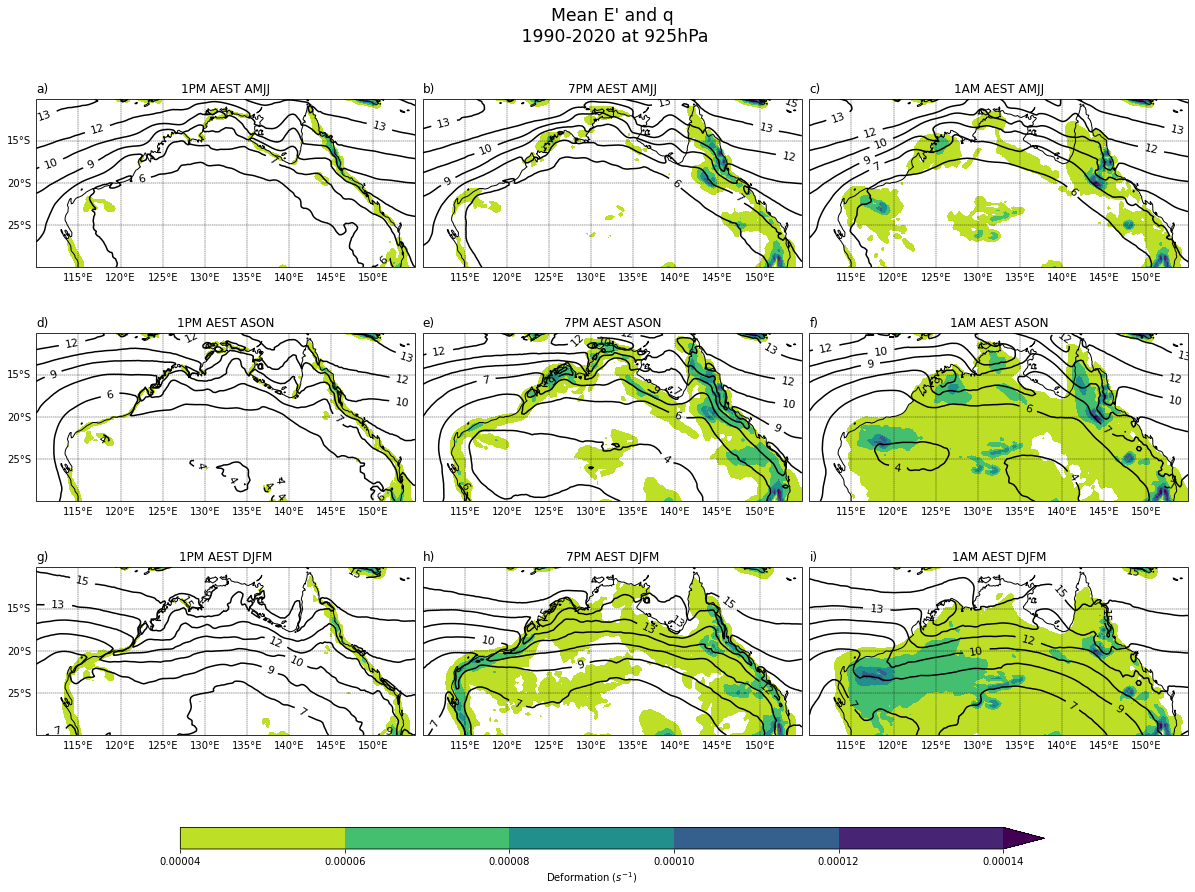

In [2]:
#deformation
#seasonal combine example
ones = np.ones((81,181))
q = [[] for x in range(9)]
e = [[] for x in range(9)]
b = [[] for x in range(9)]
time4h = ["1PM AEST AMJJ","7PM AEST AMJJ","1AM AEST AMJJ","1PM AEST ASON","7PM AEST ASON","1AM AEST ASON",
          "1PM AEST DJFM","7PM AEST DJFM","1AM AEST DJFM"]
abc = ["a)","b)","c)","d)","e)","f)","g)","h)","i)"]
fig, ax = plt.subplots(3,3,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,15))

for j in range(0,3):
    e1 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/April/Eprime_mean/Eprime_meanAPR'+UTC[(j*6)+3]+'.nc')
    e2 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/May/Eprime_mean/Eprime_meanMAY'+UTC[(j*6)+3]+'.nc')
    e3 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/June/Eprime_mean/Eprime_meanJUN'+UTC[(j*6)+3]+'.nc')
    e4 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/July/Eprime_mean/Eprime_meanJUL'+UTC[(j*6)+3]+'.nc')
    e5 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/August/Eprime_mean/Eprime_meanAUG'+UTC[(j*6)+3]+'.nc')
    e6 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/September/Eprime_mean/Eprime_meanSEP'+UTC[(j*6)+3]+'.nc')
    e7 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/October/Eprime_mean/Eprime_meanOCT'+UTC[(j*6)+3]+'.nc')
    e8 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/November/Eprime_mean/Eprime_meanNOV'+UTC[(j*6)+3]+'.nc')
    e9 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/December/Eprime_mean/Eprime_meanDEC'+UTC[(j*6)+3]+'.nc')
    e10 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/January/Eprime_mean/Eprime_meanJAN'+UTC[(j*6)+3]+'.nc')
    e11 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/February/Eprime_mean/Eprime_meanFEB'+UTC[(j*6)+3]+'.nc')
    e12 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/March/Eprime_mean/Eprime_meanMAR'+UTC[(j*6)+3]+'.nc')
    e[j] = (e1+e2+e3+e4)/4
    e[j+3] = (e5+e6+e7+e8)/4
    e[j+6] = (e9+e10+e11+e12)/4
    
    b1 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/April/delta_test/delta_testAPR'+UTC[(j*6)+3]+'.nc')
    b2 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/May/delta_test/delta_testMAY'+UTC[(j*6)+3]+'.nc')
    b3 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/June/delta_test/delta_testJUN'+UTC[(j*6)+3]+'.nc')
    b4 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/July/delta_test/delta_testJUL'+UTC[(j*6)+3]+'.nc')
    b5 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/August/delta_test/delta_testAUG'+UTC[(j*6)+3]+'.nc')
    b6 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/September/delta_test/delta_testSEP'+UTC[(j*6)+3]+'.nc')
    b7 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/October/delta_test/delta_testOCT'+UTC[(j*6)+3]+'.nc')
    b8 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/November/delta_test/delta_testNOV'+UTC[(j*6)+3]+'.nc')
    b9 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/December/delta_test/delta_testDEC'+UTC[(j*6)+3]+'.nc')
    b10 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/January/delta_test/delta_testJAN'+UTC[(j*6)+3]+'.nc')
    b11 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/February/delta_test/delta_testFEB'+UTC[(j*6)+3]+'.nc')
    b12 = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/March/delta_test/delta_testMAR'+UTC[(j*6)+3]+'.nc')
    b[j] = (b1+b2+b3+b4)/4
    b[j+3] = (b5+b6+b7+b8)/4
    b[j+6] = (b9+b10+b11+b12)/4
    
    q1 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/April/qAPR'+UTC[(j*6)+3]+'.nc')
    q2 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/May/qMAY'+UTC[(j*6)+3]+'.nc')
    q3 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/June/qJUN'+UTC[(j*6)+3]+'.nc')
    q4 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/July/qJUL'+UTC[(j*6)+3]+'.nc')
    q5 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/August/qAUG'+UTC[(j*6)+3]+'.nc')
    q6 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/September/qSEP'+UTC[(j*6)+3]+'.nc')
    q7 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/October/qOCT'+UTC[(j*6)+3]+'.nc')
    q8 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/November/qNOV'+UTC[(j*6)+3]+'.nc')
    q9 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/December/qDEC'+UTC[(j*6)+3]+'.nc')
    q10 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/January/qJAN'+UTC[(j*6)+3]+'.nc')
    q11 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/February/qFEB'+UTC[(j*6)+3]+'.nc')
    q12 = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/March/qMAR'+UTC[(j*6)+3]+'.nc')
    q[j] = (q1+q2+q3+q4)/4
    q[j+3] = (q5+q6+q7+q8)/4
    q[j+6] = (q9+q10+q11+q12)/4
for k in range(0,9):
    beta=b[k]
    if k == 0 or k == 3 or k == 6:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lons, lats = np.meshgrid(qlon, qlat)
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        ep = ax[k].contourf(qlon, qlat, e[k],levels=[4e-5,6e-5,8e-5,10e-5,12e-5,14e-5],transform=ccrs.PlateCarree(), 
                        cmap='viridis_r',extend='max')
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        # Q1=ax[k].quiver(lons[quiver_slices],lats[quiver_slices],ones[quiver_slices],ones[quiver_slices],angles=[((beta[quiver_slices])*180/np.pi)],width=0.0025, pivot='mid')
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        qcon = ax[k].contour(lons,lats,q[k],colors='black') #mslp contours
        ax[k].clabel(qcon, **kw_clabels)
        ax[k].coastlines()
    else:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lons, lats = np.meshgrid(qlon, qlat)
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        ep = ax[k].contourf(qlon, qlat, e[k],levels=[4e-5,6e-5,8e-5,10e-5,12e-5,14e-5],transform=ccrs.PlateCarree(), 
                        cmap='viridis_r',extend='max')
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        # Q1=ax[k].quiver(lons[quiver_slices],lats[quiver_slices],ones[quiver_slices],ones[quiver_slices],angles=[((beta[quiver_slices])*180/np.pi)],width=0.0025, pivot='mid')
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        qcon = ax[k].contour(lons,lats,q[k],colors='black') #mslp contours
        ax[k].clabel(qcon, **kw_clabels)
        ax[k].coastlines()

fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.3)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(ep,cax=cbar_ax,spacing='proportional',orientation='horizontal',label='Deformation ($s^{-1}$)')
# # Add a big title at the top
plt.suptitle('Mean E\' and q\n 1990-2020 at 925hPa',fontsize='xx-large')
save_results_to = '/g/data/k10/lr0203/final-plt/'
plt.savefig(save_results_to+'deformation.jpg')
plt.show()

**Vertical cross section over 16S for potential temperature and specific humidity (Offshore dryline analysis)**

In [ ]:
#lowest 5km is about 840hPa which is lvl 30
#500hpa starts at lvl 21
spec_hum = [[] for x in range(6)]
clip = [[] for x in range(6)]
time4h = ["0000","0400","0800","1200","1600","2000"]
fig, ax = plt.subplots(3,2,figsize=(15,15))
lontemp = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/t/2020/t_era5_oper_pl_2020*')['t'].loc[:,500:1000,-16,110:130]
lattemp = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/t/2020/t_era5_oper_pl_2020*')['t'].loc[:,500:1000,-10:-30,117]
lat = lattemp.latitude
lvl = lattemp.level
lon = lontemp.longitude

for j in range(0,6):
    # data = xr.open_dataarray('/g/data/k10/lr0203/16S-110-130E/q/May/Data/V16-110-130qMAY'+UTC[j*4]+'.nc')
    data = xr.open_dataarray('/g/data/k10/lr0203/16S-110-130E/theta/May/Data/V16-110-130thetaMAY'+UTC[j*4]+'.nc')
    umean = xr.open_dataarray('/g/data/k10/lr0203/16S-110-130E/u/May/Data/V16-110-130uMAY'+UTC[j*4]+'.nc')
    wmean = xr.open_dataarray('/g/data/k10/lr0203/16S-110-130E/w/May/Data/V16-110-130wMAY'+UTC[j*4]+'.nc')
    u=umean
    w=(wmean)/-11.76 #converts into m/s
    cel = data-273.15
    # spec_hum[j] = data*1000
    clip[j]=np.clip(cel,26,48)
    ax=ax.flatten()
    x, y = np.meshgrid(lon, lvl)
    grad = ax[j].contourf(lon,lvl, clip[j],8, cmap='coolwarm',extend='both',vmin=27,vmax=47)
    quiver_slices = (slice(None, None, 2), slice(None, None, 6))
    Q = ax[j].quiver(x[quiver_slices], y[quiver_slices], u[quiver_slices],100*w[quiver_slices])
    ax[j].invert_yaxis()
    ax[j].set_xlabel('Longitude ($^\circ$)')
    ax[j].set_ylabel('Pressure (hPa)')
    ax[j].set_title(time4h[j]+'UTC')
ax=ax.flatten()
x, y = np.meshgrid(lon, lvl)
grad1 = ax[1].contourf(lon,lvl, clip[1],8, cmap='coolwarm',extend='both',vmin=27,vmax=47)
quiver_slices = (slice(None, None, 2), slice(None, None, 6))
Q = ax[1].quiver(x[quiver_slices], y[quiver_slices], u[quiver_slices],100*w[quiver_slices])
plt.quiverkey(Q, 0.81, 0.92, 5, r'$5 \frac{m}{s}$', labelpos='E',
           coordinates='figure',angle = 180, labelsep=0.3)

# ax[1].invert_yaxis()
ax[1].set_xlabel('Longitude ($^\circ$)')
ax[1].set_ylabel('Pressure (hPa)')
ax[1].set_title(time4h[5]+'UTC')



# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.2, hspace=0.4)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(grad,cax=cbar_ax,spacing='proportional',orientation='horizontal',label='Potential Temperature ($^\circ$C)')

# # Add a big title at the top
plt.suptitle('Vertical circulation along 16$^\circ$S \n May 1990-2020',fontsize='xx-large')
save_results_to = '/g/data/k10/lr0203/final-plt/16S-110-130E/'
plt.savefig(save_results_to+'thetauwMAY4h-90-20.jpg')
plt.show()

In [ ]:
q = xr.open_dataarray('/g/data/k10/lr0203/16S-110-130E/q/June/V16-110-130qJUN0800.nc')
u = xr.open_dataarray('/g/data/k10/lr0203/16S-110-130E/u/June/V16-110-130uJUN0800.nc')
w = xr.open_dataarray('/g/data/k10/lr0203/16S-110-130E/w/June/V16-110-130wJUN0800.nc')
qmean = q.mean(dim='time')
umean = u.mean(dim='time')
wmean = w.mean(dim='time')
lon = q.longitude
lvl = q.level
u1=umean
w1=(wmean)/-11.76 #converts into m/s
# cel = data-273.15
spec_hum = qmean*1000
plt.figure(figsize=(10,5))
x, y = np.meshgrid(lon, lvl)
grad = plt.contourf(lon,lvl, spec_hum,8, cmap='BrBG',extend='both')
quiver_slices = (slice(None, None, 2), slice(None, None, 6))
Q = plt.quiver(x[quiver_slices], y[quiver_slices], u1[quiver_slices],100*w1[quiver_slices])
plt.colorbar(grad, orientation='horizontal',label='Specific Humidity (g$kg^{-1}$)',pad=0.15,fraction=0.05)
plt.gca().invert_yaxis()
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical cross section along 16°S\nJUNE 0800UTC 1990-2020')
save_results_to = '/g/data/k10/lr0203/final-plt/16S-110-130E/'
plt.savefig(save_results_to+'JUN0800q.jpg')
plt.show()


**Vertical cross section over 117E for specific humidity and potential temperature (Heat low analysis)**

In [12]:
#lowest 5km is about 840hPa which is lvl 30
#500hpa starts at lvl 21
spec_hum = [[] for x in range(6)]
clip = [[] for x in range(6)]
time4h = ["0000","0400","0800","1200","1600","2000"]
fig, ax = plt.subplots(3,2,figsize=(15,15))
lontemp = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/t/2020/t_era5_oper_pl_2020*')['t'].loc[:,500:1000,-16,110:130]
lattemp = xr.open_mfdataset('/g/data/rt52/era5/pressure-levels/reanalysis/t/2020/t_era5_oper_pl_2020*')['t'].loc[:,500:1000,-10:-30,117]
lat = lattemp.latitude
lvl = lattemp.level
lon = lontemp.longitude

for j in range(0,6):
    data = xr.open_dataarray('/g/data/k10/lr0203/117E-10-30S/q/December/Data/V117-10-30qDEC'+UTC[j*4]+'.nc')
    # data = xr.open_dataarray('/g/data/k10/lr0203/117E-10-30S/theta/December/Data/V117-10-30thetaDEC'+UTC[j*4]+'.nc')
    vmean = xr.open_dataarray('/g/data/k10/lr0203/117E-10-30S/v/December/Data/V117-10-30vDEC'+UTC[j*4]+'.nc')
    wmean = xr.open_dataarray('/g/data/k10/lr0203/117E-10-30S/w/December/Data/V117-10-30wDEC'+UTC[j*4]+'.nc')
    v=vmean
    w=(wmean)/-11.76 #converts into m/s
    # cel = data-273.15
    spec_hum[j] = data*1000
    clip[j]=np.clip(cel,26,48)
    ax=ax.flatten()
    x, y = np.meshgrid(lat, lvl)
    grad = ax[j].contourf(lat,lvl, spec_hum[j],8, cmap='BrBG',extend='both')
    quiver_slices = (slice(None, None, 2), slice(None, None, 6))
    Q = ax[j].quiver(x[quiver_slices], y[quiver_slices], v[quiver_slices],100*w[quiver_slices])
    ax[j].invert_yaxis()
    ax[j].set_xlabel('Latitude ($^\circ$)')
    ax[j].set_ylabel('Pressure (hPa)')
    ax[j].set_title(time4h[j]+'UTC')
ax=ax.flatten()
x, y = np.meshgrid(lat, lvl)
grad1 = ax[1].contourf(lat,lvl, spec_hum[1],8, cmap='BrBG',extend='both')
quiver_slices = (slice(None, None, 2), slice(None, None, 6))
Q = ax[1].quiver(x[quiver_slices], y[quiver_slices], v[quiver_slices],100*w[quiver_slices])
plt.quiverkey(Q, 0.81, 0.92, 2, r'$2 \frac{m}{s}$', labelpos='E',
           coordinates='figure',angle = 0, labelsep=0.1)

# ax[1].invert_yaxis()
ax[1].set_xlabel('Latitude ($^\circ$)')
ax[1].set_ylabel('Pressure (hPa)')
ax[1].set_title(time4h[5]+'UTC')



# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.2, hspace=0.4)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(grad,cax=cbar_ax,spacing='proportional',orientation='horizontal',label='Specific Humidity (g/Kg)')

# # Add a big title at the top
plt.suptitle('Vertical circulation along 117$^\circ$E \n DEC 1990-2020',fontsize='xx-large')
save_results_to = '/g/data/k10/lr0203/final-plt/117E-10-30S/'
plt.savefig(save_results_to+'quwDEC4h-90-20.jpg')
plt.show()

# Start Monsoon analysis

In [61]:
# traching the dryline progression through the monsoon period
febdaily = [[] for x in range(31)]
meanfebdaily = [[] for x in range(28)]
meandecdaily = [[] for x in range(31)]
meanjandaily = [[] for x in range(31)]
meanmardaily = [[] for x in range(31)]
for i in range(0,24): #hour looop
    decgradq = xr.open_dataarray('/g/data/k10/lr0203/gradq/December/gradqfull/gradqfullDEC'+UTC[i]+'.nc')
    jangradq = xr.open_dataarray('/g/data/k10/lr0203/gradq/January/gradqfull/gradqfullJAN'+UTC[i]+'.nc')
    febgradq = xr.open_dataarray('/g/data/k10/lr0203/gradq/February/gradqfull/gradqfullFEB'+UTC[i]+'.nc')
    margradq = xr.open_dataarray('/g/data/k10/lr0203/gradq/March/gradqfull/gradqfullMAR'+UTC[i]+'.nc')
    mtime  = list(np.arange(0,121))
    for j in range(0,31): #month length
        decdaily = decgradq[j::31]
        jandaily = jangradq[j::31]
        mardaily = margradq[j::31]
        meandecdaily[j] = decdaily.mean(dim='time')
        meanjandaily[j] = jandaily.mean(dim='time')
        meanmardaily[j] = mardaily.mean(dim='time')
    febyearly =[febgradq[0:28],febgradq[28:56],febgradq[56:85],febgradq[85:113],febgradq[113:141],febgradq[141:169],febgradq[169:198],
                febgradq[198:226],febgradq[226:254],febgradq[254:282],febgradq[282:311],febgradq[311:339],febgradq[339:367],febgradq[367:395],
               febgradq[395:424],febgradq[424:452],febgradq[452:480],febgradq[480:508],febgradq[508:537],febgradq[537:565],febgradq[565:593],
                febgradq[593:621],febgradq[621:650],febgradq[650:678],febgradq[678:706],febgradq[706:734],febgradq[734:763],febgradq[763:791],
                febgradq[791:819],febgradq[819:847],febgradq[847:876]]
    for k in range(0,28):
        for m in range(0,31): #year loop
            febdaily[m] = febyearly[m][k]
        meanfebdaily[k] = np.mean(febdaily,axis=0)
    monsoondaily = np.concatenate([meandecdaily,meanjandaily,meanfebdaily,meanmardaily],axis=0)
    xr.DataArray(monsoondaily,dims=["time","latitude","longitude"],coords=dict(time=mtime,latitude=qlat,longitude=qlon)).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_daily/monsoondaily'+UTC[i]+'.nc')



'10/01'

# Start monsoon code

In [2]:
#-----------------------------First attempt at monsoon code--------------------------------------------------------------------------------------------------
#define the monsoon rainfall box from 10-20S 120-150E
#calculate total rainfall that occurs in DJFM climatology period
# traching the dryline progression through the monsoon period
monsoondate = ['01/12','02/12','03/12','04/12','05/12','06/12','07/12','08/12','09/12','10/12','11/12','12/12','13/12','14/12','15/12','16/12','17/12','18/12',
               '19/12','20/12','21/12','22/12','23/12','24/12','25/12','26/12','27/12','28/12','29/12','30/12','31/12','01/01','02/01','03/01','04/01','05/01',
               '06/01','07/01','08/01','09/01','10/01','11/01','12/01','13/01','14/01','15/01','16/01','17/01','18/01','19/01','20/01','21/01','22/01','23/01',
               '24/01','25/01','26/01','27/01','28/01','29/01','30/01','31/01','01/02','02/02','03/02','04/02','05/02','06/02','07/02','08/02','09/02','10/02',
               '11/02','12/02','13/02','14/02','15/02','16/02','17/02','18/02','19/02','20/02','21/02','22/02','23/02','24/02','25/02','26/02','27/02','28/02',
               '01/03','02/03','03/03','04/03','05/03','06/03','07/03','08/03','09/03','10/03','11/03','12/03','13/03','14/03','15/03','16/03','17/03','18/03',
               '19/03','20/03','21/03','22/03','23/03','24/03','25/03','26/03','27/03','28/03','29/03','30/03','31/03']
febdaily = [[] for x in range(31)]
meanfebdaily = [[] for x in range(28)]
meandecdaily = [[] for x in range(31)]
meanjandaily = [[] for x in range(31)]
meanmardaily = [[] for x in range(31)]
for i in range(0,24): #hour looop
    decgradq = xr.open_dataarray('/g/data/k10/lr0203/MTPR/December/MTPRdaily/MTPRdailyDEC'+UTC[i]+'.nc')
    jangradq = xr.open_dataarray('/g/data/k10/lr0203/MTPR/January/MTPRdaily/MTPRdailyJAN'+UTC[i]+'.nc')
    febgradq = xr.open_dataarray('/g/data/k10/lr0203/MTPR/February/MTPRdaily/MTPRdailyFEB'+UTC[i]+'.nc')
    margradq = xr.open_dataarray('/g/data/k10/lr0203/MTPR/March/MTPRdaily/MTPRdailyMAR'+UTC[i]+'.nc')
    mlat = decgradq.latitude
    mlon = decgradq.longitude
    # mtime  = list(np.arange(0,121))
    for j in range(0,31): #month length
        decdaily = decgradq[j::31]
        jandaily = jangradq[j::31]
        mardaily = margradq[j::31]
        meandecdaily[j] = decdaily.mean(dim='time')
        meanjandaily[j] = jandaily.mean(dim='time')
        meanmardaily[j] = mardaily.mean(dim='time')
    febyearly =[febgradq[0:28],febgradq[28:56],febgradq[56:85],febgradq[85:113],febgradq[113:141],febgradq[141:169],febgradq[169:198],
                febgradq[198:226],febgradq[226:254],febgradq[254:282],febgradq[282:311],febgradq[311:339],febgradq[339:367],febgradq[367:395],
                febgradq[395:424],febgradq[424:452],febgradq[452:480],febgradq[480:508],febgradq[508:537],febgradq[537:565],febgradq[565:593],
                febgradq[593:621],febgradq[621:650],febgradq[650:678],febgradq[678:706],febgradq[706:734],febgradq[734:763],febgradq[763:791],
                febgradq[791:819],febgradq[819:847],febgradq[847:876]]
    for k in range(0,28):
        for m in range(0,31): #year loop
            febdaily[m] = febyearly[m][k]
        meanfebdaily[k] = np.mean(febdaily,axis=0)
    monsoondaily = np.concatenate([meandecdaily,meanjandaily,meanfebdaily,meanmardaily],axis=0)
    xr.DataArray(monsoondaily,dims=["time","latitude","longitude"],coords=dict(time=monsoondate,latitude=mlat,longitude=mlon)).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_daily_pcp/monsoondailypcp'+UTC[i]+'.nc')



In [4]:
import xarray as xr
import numpy as np
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
monsoondate = ['01/12','02/12','03/12','04/12','05/12','06/12','07/12','08/12','09/12','10/12','11/12','12/12','13/12','14/12','15/12','16/12','17/12','18/12',
               '19/12','20/12','21/12','22/12','23/12','24/12','25/12','26/12','27/12','28/12','29/12','30/12','31/12','01/01','02/01','03/01','04/01','05/01',
               '06/01','07/01','08/01','09/01','10/01','11/01','12/01','13/01','14/01','15/01','16/01','17/01','18/01','19/01','20/01','21/01','22/01','23/01',
               '24/01','25/01','26/01','27/01','28/01','29/01','30/01','31/01','01/02','02/02','03/02','04/02','05/02','06/02','07/02','08/02','09/02','10/02',
               '11/02','12/02','13/02','14/02','15/02','16/02','17/02','18/02','19/02','20/02','21/02','22/02','23/02','24/02','25/02','26/02','27/02','28/02',
               '01/03','02/03','03/03','04/03','05/03','06/03','07/03','08/03','09/03','10/03','11/03','12/03','13/03','14/03','15/03','16/03','17/03','18/03',
               '19/03','20/03','21/03','22/03','23/03','24/03','25/03','26/03','27/03','28/03','29/03','30/03','31/03']

In [ ]:
for year in range(1990,2021):
    print(year)
    year_string=str(year)
    mtpr=xr.open_mfdataset('/g/data/rt52/era5/single-levels/reanalysis/mtpr/'+year_string+'/mtpr_era5_oper_sfc_'+year_string+'[01][123]*')
    box_av_mtpr_year=mtpr['mtpr'].loc[:,-10:-20,120:150].mean(dim=['latitude','longitude']).resample(time='1D').mean()*86400 #86400 converts rainrates from kg m^-2 s^-1 to mm/day
    if year==1990:
        box_av_mtpr=box_av_mtpr_year
    else:
        box_av_mtpr=xr.concat([box_av_mtpr,box_av_mtpr_year],dim='time')
with ProgressBar():
    box_av_mtpr=box_av_mtpr.compute()

xr.DataArray(box_av_mtpr).to_netcdf(path='/g/data/k10/lr0203/Monsoon/box_av_mtpr.nc')

In [ ]:
box_av_mtpr = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/box_av_mtpr.nc')
clim=box_av_mtpr.groupby("time.dayofyear").mean()
monsoonclim=np.concatenate([clim[335:365].data,clim[0:90].data])
plt.figure(figsize=(10,5))
plt.plot(monsoonclim)
plt.title('Mean rainfall rate over monsoon period 1990-2020')
plt.ylabel('Rainfall rate (mm/day)')
plt.xticks([0,20,40,60,80,100,120],['01/12','21/12','10/01','30/01','19/02','11/03','31/03'])
plt.show()
save_results_to = '/g/data/k10/lr0203/Monsoon/plots/'
plt.savefig(save_results_to+'Mean_monsoon_pcp.png', dpi=300, bbox_inches='tight')
# xr.DataArray(monsoonclim).to_netcdf(path='/g/data/k10/lr0203/Monsoon/moncoonclim.nc')

In [12]:
monsoon_day=np.zeros(len(box_av_mtpr),dtype=int)
for m in range(len(box_av_mtpr)):
    if box_av_mtpr[m]['time.month']==12:
        monsoon_day[m]=box_av_mtpr[m]['time.day']
    else:
        monsoon_day[m]=box_av_mtpr[m]['time.dayofyear']+31
xr.DataArray(monsoon_day).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_day.nc')

In [14]:
upper_quartile=np.zeros(120)
lower_quartile=np.zeros(120)
for n in range(1,121):
    upper_quartile[n-1]=box_av_mtpr[monsoon_day==n].quantile(q=.75)
    lower_quartile[n-1]=box_av_mtpr[monsoon_day==n].quantile(q=.25)
xr.DataArray(upper_quartile).to_netcdf(path='/g/data/k10/lr0203/Monsoon/upper_quantile.nc')
xr.DataArray(lower_quartile).to_netcdf(path='/g/data/k10/lr0203/Monsoon/lower_quantile.nc')

In [ ]:
box_av_mtpr = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/box_av_mtpr.nc')
upper_quartile = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/upper_quantile.nc')
lower_quartile = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/lower_quantile.nc')
# monsoonclim = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/moncoonclim.nc')
clim=box_av_mtpr.groupby("time.dayofyear").mean()
monsoonclim=np.concatenate([clim[335:365].data,clim[0:90].data])
plt.figure(figsize=(10,5))
# plt.figure(1)
plt.plot(upper_quartile,c='r')
plt.plot(monsoonclim,'k')
plt.plot(lower_quartile,c='b')
plt.ylabel('Rainfall rate (mm/day)')
plt.title('Mean rainfall rate for monsoon period 1990-2020')
plt.legend(['Upper quantile (>75%)','Mean rainfall rate', 'Lower quantile (<25%)'])
plt.xticks([0,20,40,60,80,100,120],['01/12','21/12','10/01','30/01','19/02','11/03','31/03'])
plt.show()
# save_results_to = '/g/data/k10/lr0203/Monsoon/plots/'
# plt.savefig(save_results_to+'Mean_quantile_monsoon_pcp.jpg')

In [ ]:
upper_quartile=np.zeros(24)
lower_quartile=np.zeros(24)
for n in range(24):
    upper_quartile[n]=box_av_mtpr[np.isin(monsoon_day,range(5*n+1,5*n+6))].quantile(q=.75)
    lower_quartile[n]=box_av_mtpr[np.isin(monsoon_day,range(5*n+1,5*n+6))].quantile(q=.25)
clim=box_av_mtpr.groupby("time.dayofyear").mean()
monsoonclim=np.concatenate([clim[335:365].data,clim[0:90].data])
plt.figure(figsize=(10,5))
plt.plot(np.arange(2,120,5),upper_quartile,c='r')
plt.plot(monsoonclim,'k')
plt.plot(np.arange(2,120,5),lower_quartile,c='b')
plt.ylabel('Rainfall rate (mm/day)')
plt.legend(['Upper quantile (>75%)','Mean rainfall rate', 'Lower quantile (<25%)'])

plt.title('Mean rainfall rate for monsoon period smoothed over pentads 1990-2020')
plt.xticks([0,20,40,60,80,100,120],['01/12','21/12','10/01','30/01','19/02','11/03','31/03'])
plt.show()
# xr.DataArray(upper_quartile).to_netcdf(path='/g/data/k10/lr0203/Monsoon/pen_upper_quantile.nc')
# xr.DataArray(lower_quartile).to_netcdf(path='/g/data/k10/lr0203/Monsoon/pen_lower_quantile.nc')

In [ ]:
box_av_mtpr = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/box_av_mtpr.nc')
upper_quartile = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/pen_upper_quantile.nc')
lower_quartile = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/pen_lower_quantile.nc')
monsoonclim = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/moncoonclim.nc')
plt.figure(figsize=(10,5))
plt.plot(box_av_mtpr.loc['2015-12-01':'2016-03-31'].data,c='k')
plt.plot(monsoonclim)
plt.plot(np.arange(2,120,5),upper_quartile,c='r')
plt.plot(np.arange(2,120,5),lower_quartile,c='r')
plt.ylabel('Rainfall rate (mm/day)')
plt.xticks([0,20,40,60,80,100,120],['01/12','21/12','10/01','30/01','19/02','11/03','31/03'])
plt.title("2015-2016 Monsoon rainfall compared to climatology")
plt.show()

**Concat variables into strings for length of monsoon period Dec-Mar**

In [ ]:
for i in range(8,24): #hour looop
    decgradq = xr.open_dataarray('/g/data/k10/lr0203/gradq/December/gradqfull/new_gradqfullDEC'+UTC[i]+'.nc')
    jangradq = xr.open_dataarray('/g/data/k10/lr0203/gradq/January/gradqfull/new_gradqfullJAN'+UTC[i]+'.nc')
    febgradq = xr.open_dataarray('/g/data/k10/lr0203/gradq/February/gradqfull/new_gradqfullFEB'+UTC[i]+'.nc')
    margradq = xr.open_dataarray('/g/data/k10/lr0203/gradq/March/gradqfull/new_gradqfullMAR'+UTC[i]+'.nc')
    for j in range(0,31): #month length
        decdaily = decgradq[(j*31):(j*31)+31]
        jandaily = jangradq[(j*31):(j*31)+31]
        mardaily = margradq[(j*31):(j*31)+31]
        febyearly = [febgradq[0:28],febgradq[28:56],febgradq[56:85],febgradq[85:113],febgradq[113:141],febgradq[141:169],febgradq[169:198],
                    febgradq[198:226],febgradq[226:254],febgradq[254:282],febgradq[282:311],febgradq[311:339],febgradq[339:367],febgradq[367:395],
                    febgradq[395:424],febgradq[424:452],febgradq[452:480],febgradq[480:508],febgradq[508:537],febgradq[537:565],febgradq[565:593],
                    febgradq[593:621],febgradq[621:650],febgradq[650:678],febgradq[678:706],febgradq[706:734],febgradq[734:763],febgradq[763:791],
                    febgradq[791:819],febgradq[819:847],febgradq[847:876]]
        monsoon = xr.concat([decdaily,jandaily,febyearly[j],mardaily],dim='time')
        if j == 0:
            monsoon_yearly = monsoon
        else:
            monsoon_yearly = xr.concat([monsoon_yearly,monsoon],dim='time')
    xr.DataArray(monsoon_yearly).to_netcdf(path='/g/data/k10/lr0203/Monsoon/new_monsoonyearly'+UTC[i]+'.nc')
    

In [2]:
for i in range(15,16): #hour looop
    dectheta = xr.open_dataarray('/g/data/k10/lr0203/theta/December/Full_data/thetafullDEC'+UTC[i]+'.nc')
    jantheta = xr.open_dataarray('/g/data/k10/lr0203/theta/January/Full_data/thetafullJAN'+UTC[i]+'.nc')
    febgradq = xr.open_dataarray('/g/data/k10/lr0203/theta/February/Full_data/thetafullFEB'+UTC[i]+'.nc')
    martheta = xr.open_dataarray('/g/data/k10/lr0203/theta/March/Full_data/thetafullMAR'+UTC[i]+'.nc')
    for j in range(0,31): #month length
        decdaily = dectheta[(j*31):(j*31)+31]
        jandaily = jantheta[(j*31):(j*31)+31]
        mardaily = martheta[(j*31):(j*31)+31]
        febyearly = [febgradq[0:28],febgradq[28:56],febgradq[56:85],febgradq[85:113],febgradq[113:141],febgradq[141:169],febgradq[169:198],
                    febgradq[198:226],febgradq[226:254],febgradq[254:282],febgradq[282:311],febgradq[311:339],febgradq[339:367],febgradq[367:395],
                    febgradq[395:424],febgradq[424:452],febgradq[452:480],febgradq[480:508],febgradq[508:537],febgradq[537:565],febgradq[565:593],
                    febgradq[593:621],febgradq[621:650],febgradq[650:678],febgradq[678:706],febgradq[706:734],febgradq[734:763],febgradq[763:791],
                    febgradq[791:819],febgradq[819:847],febgradq[847:876]]
        monsoon = xr.concat([decdaily,jandaily,febyearly[j],mardaily],dim='time')
        if j == 0:
            monsoon_yearly = monsoon
        else:
            monsoon_yearly = xr.concat([monsoon_yearly,monsoon],dim='time')
    xr.DataArray(monsoon_yearly).to_netcdf(path='/g/data/k10/lr0203/Monsoon/theta_monsoonyearly'+UTC[i]+'.nc')

In [6]:
for i in range(3,4): #hour looop
    dectheta = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/December/Fn_Fronto/Fn_FrontoDEC'+UTC[i]+'.nc')
    jantheta = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/January/Fn_Fronto/Fn_FrontoJAN'+UTC[i]+'.nc')
    febgradq = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/February/Fn_Fronto/Fn_FrontoFEB'+UTC[i]+'.nc')
    martheta = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/March/Fn_Fronto/Fn_FrontoMAR'+UTC[i]+'.nc')
    for j in range(0,31): #month length
        decdaily = dectheta[(j*31):(j*31)+31]
        jandaily = jantheta[(j*31):(j*31)+31]
        mardaily = martheta[(j*31):(j*31)+31]
        febyearly = [febgradq[0:28],febgradq[28:56],febgradq[56:85],febgradq[85:113],febgradq[113:141],febgradq[141:169],febgradq[169:198],
                    febgradq[198:226],febgradq[226:254],febgradq[254:282],febgradq[282:311],febgradq[311:339],febgradq[339:367],febgradq[367:395],
                    febgradq[395:424],febgradq[424:452],febgradq[452:480],febgradq[480:508],febgradq[508:537],febgradq[537:565],febgradq[565:593],
                    febgradq[593:621],febgradq[621:650],febgradq[650:678],febgradq[678:706],febgradq[706:734],febgradq[734:763],febgradq[763:791],
                    febgradq[791:819],febgradq[819:847],febgradq[847:876]]
        monsoon = xr.concat([decdaily,jandaily,febyearly[j],mardaily],dim='time')
        if j == 0:
            monsoon_yearly = monsoon
        else:
            monsoon_yearly = xr.concat([monsoon_yearly,monsoon],dim='time')
    xr.DataArray(monsoon_yearly).to_netcdf(path='/g/data/k10/lr0203/Monsoon/Fn_monsoonyearly'+UTC[i]+'.nc')

In [31]:
for i in range(15,16): #hour looop
    dectheta = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/December/qgfull/qgDEC'+UTC[i]+'.nc')*1000
    jantheta = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/January/qgfull/qgJAN'+UTC[i]+'.nc')*1000
    febgradq = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/February/qgfull/qgFEB'+UTC[i]+'.nc')*1000
    martheta = xr.open_dataarray('/g/data/k10/lr0203/SpecHum/March/qgfull/qgMAR'+UTC[i]+'.nc')*1000
    for j in range(0,31): #month length
        decdaily = dectheta[(j*31):(j*31)+31]
        jandaily = jantheta[(j*31):(j*31)+31]
        mardaily = martheta[(j*31):(j*31)+31]
        febyearly = [febgradq[0:28],febgradq[28:56],febgradq[56:85],febgradq[85:113],febgradq[113:141],febgradq[141:169],febgradq[169:198],
                    febgradq[198:226],febgradq[226:254],febgradq[254:282],febgradq[282:311],febgradq[311:339],febgradq[339:367],febgradq[367:395],
                    febgradq[395:424],febgradq[424:452],febgradq[452:480],febgradq[480:508],febgradq[508:537],febgradq[537:565],febgradq[565:593],
                    febgradq[593:621],febgradq[621:650],febgradq[650:678],febgradq[678:706],febgradq[706:734],febgradq[734:763],febgradq[763:791],
                    febgradq[791:819],febgradq[819:847],febgradq[847:876]]
        monsoon = xr.concat([decdaily,jandaily,febyearly[j],mardaily],dim='time')
        if j == 0:
            monsoon_yearly = monsoon
        else:
            monsoon_yearly = xr.concat([monsoon_yearly,monsoon],dim='time')
    xr.DataArray(monsoon_yearly).to_netcdf(path='/g/data/k10/lr0203/Monsoon/q_monsoonyearly'+UTC[i]+'.nc')

In [8]:
for i in range(15,16): #hour looop
    dectheta = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/December/D/DDEC'+UTC[i]+'.nc')
    jantheta = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/January/D/DJAN'+UTC[i]+'.nc')
    febgradq = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/February/D/DFEB'+UTC[i]+'.nc')
    martheta = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/March/D/DMAR'+UTC[i]+'.nc')
    for j in range(0,31): #month length
        decdaily = dectheta[(j*31):(j*31)+31]
        jandaily = jantheta[(j*31):(j*31)+31]
        mardaily = martheta[(j*31):(j*31)+31]
        febyearly = [febgradq[0:28],febgradq[28:56],febgradq[56:85],febgradq[85:113],febgradq[113:141],febgradq[141:169],febgradq[169:198],
                    febgradq[198:226],febgradq[226:254],febgradq[254:282],febgradq[282:311],febgradq[311:339],febgradq[339:367],febgradq[367:395],
                    febgradq[395:424],febgradq[424:452],febgradq[452:480],febgradq[480:508],febgradq[508:537],febgradq[537:565],febgradq[565:593],
                    febgradq[593:621],febgradq[621:650],febgradq[650:678],febgradq[678:706],febgradq[706:734],febgradq[734:763],febgradq[763:791],
                    febgradq[791:819],febgradq[819:847],febgradq[847:876]]
        monsoon = xr.concat([decdaily,jandaily,febyearly[j],mardaily],dim='time')
        if j == 0:
            monsoon_yearly = monsoon
        else:
            monsoon_yearly = xr.concat([monsoon_yearly,monsoon],dim='time')
    xr.DataArray(monsoon_yearly).to_netcdf(path='/g/data/k10/lr0203/Monsoon/D_monsoonyearly'+UTC[i]+'.nc')

In [10]:
for i in range(3,4): #hour looop
    dectheta = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/December/Eprime/EprimeDEC'+UTC[i]+'.nc')
    jantheta = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/January/Eprime/EprimeJAN'+UTC[i]+'.nc')
    febgradq = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/February/Eprime/EprimeFEB'+UTC[i]+'.nc')
    martheta = xr.open_dataarray('/g/data/k10/lr0203/Frontogenesis/Fn/March/Eprime/EprimeMAR'+UTC[i]+'.nc')
    for j in range(0,31): #month length
        decdaily = dectheta[(j*31):(j*31)+31]
        jandaily = jantheta[(j*31):(j*31)+31]
        mardaily = martheta[(j*31):(j*31)+31]
        febyearly = [febgradq[0:28],febgradq[28:56],febgradq[56:85],febgradq[85:113],febgradq[113:141],febgradq[141:169],febgradq[169:198],
                    febgradq[198:226],febgradq[226:254],febgradq[254:282],febgradq[282:311],febgradq[311:339],febgradq[339:367],febgradq[367:395],
                    febgradq[395:424],febgradq[424:452],febgradq[452:480],febgradq[480:508],febgradq[508:537],febgradq[537:565],febgradq[565:593],
                    febgradq[593:621],febgradq[621:650],febgradq[650:678],febgradq[678:706],febgradq[706:734],febgradq[734:763],febgradq[763:791],
                    febgradq[791:819],febgradq[819:847],febgradq[847:876]]
        monsoon = xr.concat([decdaily,jandaily,febyearly[j],mardaily],dim='time')
        if j == 0:
            monsoon_yearly = monsoon
        else:
            monsoon_yearly = xr.concat([monsoon_yearly,monsoon],dim='time')
    xr.DataArray(monsoon_yearly).to_netcdf(path='/g/data/k10/lr0203/Monsoon/Eprime_monsoonyearly'+UTC[i]+'.nc')

In [29]:
for i in range(15,16): #hour looop
    decgradq = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/December/uageo_full/uageofullDEC'+UTC[i]+'.nc')
    jangradq = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/January/uageo_full/uageofullJAN'+UTC[i]+'.nc')
    febgradq = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/February/uageo_full/uageofullFEB'+UTC[i]+'.nc')
    margradq = xr.open_dataarray('/g/data/k10/lr0203/Winds/uageo/March/uageo_full/uageofullMAR'+UTC[i]+'.nc')
    for j in range(0,31): #month length
        decdaily = decgradq[(j*31):(j*31)+31]
        jandaily = jangradq[(j*31):(j*31)+31]
        mardaily = margradq[(j*31):(j*31)+31]
        febyearly = [febgradq[0:28],febgradq[28:56],febgradq[56:85],febgradq[85:113],febgradq[113:141],febgradq[141:169],febgradq[169:198],
                    febgradq[198:226],febgradq[226:254],febgradq[254:282],febgradq[282:311],febgradq[311:339],febgradq[339:367],febgradq[367:395],
                    febgradq[395:424],febgradq[424:452],febgradq[452:480],febgradq[480:508],febgradq[508:537],febgradq[537:565],febgradq[565:593],
                    febgradq[593:621],febgradq[621:650],febgradq[650:678],febgradq[678:706],febgradq[706:734],febgradq[734:763],febgradq[763:791],
                    febgradq[791:819],febgradq[819:847],febgradq[847:876]]
        monsoon = xr.concat([decdaily,jandaily,febyearly[j],mardaily],dim='time')
        if j == 0:
            monsoon_yearly = monsoon
        else:
            monsoon_yearly = xr.concat([monsoon_yearly,monsoon],dim='time')
    xr.DataArray(monsoon_yearly).to_netcdf(path='/g/data/k10/lr0203/Monsoon/uageo_monsoonyearly'+UTC[i]+'.nc')
    

In [2]:
for i in range(15,16): #hour looop
    decgradq = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/December/vageo_full/vageofullDEC'+UTC[i]+'.nc')
    jangradq = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/January/vageo_full/vageofullJAN'+UTC[i]+'.nc')
    febgradq = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/February/vageo_full/vageofullFEB'+UTC[i]+'.nc')
    margradq = xr.open_dataarray('/g/data/k10/lr0203/Winds/vageo/March/vageo_full/vageofullMAR'+UTC[i]+'.nc')
    for j in range(0,31): #month length
        decdaily = decgradq[(j*31):(j*31)+31]
        jandaily = jangradq[(j*31):(j*31)+31]
        mardaily = margradq[(j*31):(j*31)+31]
        febyearly = [febgradq[0:28],febgradq[28:56],febgradq[56:85],febgradq[85:113],febgradq[113:141],febgradq[141:169],febgradq[169:198],
                    febgradq[198:226],febgradq[226:254],febgradq[254:282],febgradq[282:311],febgradq[311:339],febgradq[339:367],febgradq[367:395],
                    febgradq[395:424],febgradq[424:452],febgradq[452:480],febgradq[480:508],febgradq[508:537],febgradq[537:565],febgradq[565:593],
                    febgradq[593:621],febgradq[621:650],febgradq[650:678],febgradq[678:706],febgradq[706:734],febgradq[734:763],febgradq[763:791],
                    febgradq[791:819],febgradq[819:847],febgradq[847:876]]
        monsoon = xr.concat([decdaily,jandaily,febyearly[j],mardaily],dim='time')
        if j == 0:
            monsoon_yearly = monsoon
        else:
            monsoon_yearly = xr.concat([monsoon_yearly,monsoon],dim='time')
    xr.DataArray(monsoon_yearly).to_netcdf(path='/g/data/k10/lr0203/Monsoon/vageo_monsoonyearly'+UTC[i]+'.nc')
    

**Isolate monsoon burst dates and slice variables for only burst periods**

In [ ]:
monsoon_burst=np.zeros(len(box_av_mtpr),dtype=bool)
monsoon_day = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_day.nc')
for m in range(len(box_av_mtpr)):
    if monsoon_day[m]>120:
        monsoon_burst[m]=False
    else:
        monsoon_burst[m]=(box_av_mtpr[m]>upper_quartile[int((monsoon_day[m]-1)/5)])
monsoon_burst_dates=box_av_mtpr.time[monsoon_burst]
print(monsoon_burst_dates)
# xr.DataArray(monsoon_burst_dates).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_burst_dates.nc')

In [32]:
dates = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst_dates.nc')
test = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/new_monsoon_yearly/new_monsoonyearly0000.nc')
for i in range(0,936):
    v = np.where(test.time == dates.time[i])
    if i == 0:
        burst = v[0]
    else:
        burst = np.concatenate([burst,v[0]],axis=0)

In [ ]:
for i in range(15,16):
    theta = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/theta_monsoonyearly'+UTC[i]+'.nc')
    uageo = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/uageo_monsoonyearly'+UTC[i]+'.nc')
    vageo = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/vageo_monsoonyearly'+UTC[i]+'.nc')
    Ep = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/Eprime_monsoonyearly'+UTC[i]+'.nc')
    Fn = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/Fn_monsoonyearly'+UTC[i]+'.nc')
    D = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/D_monsoonyearly'+UTC[i]+'.nc')
    q = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/q_monsoonyearly'+UTC[i]+'.nc')
    burst_theta = theta[burst]
    burst_theta_mean = burst_theta.mean(dim='time')
    xr.DataArray(burst_theta_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_burst/thetaburstdata'+UTC[i]+'.nc')
    burst_uageo = uageo[burst]
    burst_uageo_mean = burst_uageo.mean(dim='time')
    xr.DataArray(burst_uageo_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_burst/uageoburstdata'+UTC[i]+'.nc')
    burst_vageo = vageo[burst]
    burst_vageo_mean = burst_vageo.mean(dim='time')
    xr.DataArray(burst_vageo_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_burst/vageoburstdata'+UTC[i]+'.nc')
    burst_Ep = Ep[burst]
    burst_Ep_mean = burst_Ep.mean(dim='time')
    xr.DataArray(burst_Ep_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_burst/Epburstdata'+UTC[i]+'.nc')
    burst_Fn = Fn[burst]
    burst_Fn_mean = burst_Fn.mean(dim='time')
    xr.DataArray(burst_Fn_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_burst/Fnburstdata'+UTC[i]+'.nc')
    burst_D = D[burst]
    burst_D_mean = burst_D.mean(dim='time')
    xr.DataArray(burst_D_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_burst/Dburstdata'+UTC[i]+'.nc')
    burst_q = q[burst]
    burst_q_mean = burst_q.mean(dim='time')
    xr.DataArray(burst_q_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_burst/qburstdata'+UTC[i]+'.nc')

**Isolate monsoon break dates and slice variables for only break periods**

In [ ]:
monsoon_day = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_day.nc')
monsoon_break=np.zeros(len(box_av_mtpr),dtype=bool)
for m in range(len(box_av_mtpr)):
    if monsoon_day[m]>120:
        monsoon_break[m]=False
    else:
        monsoon_break[m]=(box_av_mtpr[m]<lower_quartile[int((monsoon_day[m]-1)/5)])
monsoon_break_dates=box_av_mtpr.time[monsoon_break]
print(monsoon_break_dates)
xr.DataArray(monsoon_break_dates).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_break_dates.nc')

In [35]:
dates = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break_dates.nc')
test = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/new_monsoon_yearly/new_monsoonyearly0000.nc')
for i in range(0,936):
    v = np.where(test.time == dates.time[i])
    if i == 0:
        breaks = v[0]
    else:
        breaks = np.concatenate([breaks,v[0]],axis=0)

In [37]:
for i in range(3,4):
    test = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/new_monsoon_yearly/new_monsoonyearly'+UTC[i]+'.nc')
    break_time = test[breaks]
    break_time_mean = break_time.mean(dim='time')
    xr.DataArray(break_time_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_break/breakdata'+UTC[i]+'.nc')
    theta = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/theta_monsoonyearly'+UTC[i]+'.nc')
    uageo = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/uageo_monsoonyearly'+UTC[i]+'.nc')
    vageo = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/vageo_monsoonyearly'+UTC[i]+'.nc')
    Ep = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/Eprime_monsoonyearly'+UTC[i]+'.nc')
    Fn = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/Fn_monsoonyearly'+UTC[i]+'.nc')
    D = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/D_monsoonyearly'+UTC[i]+'.nc')
    q = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/q_monsoonyearly'+UTC[i]+'.nc')
    break_theta = theta[breaks]
    break_theta_mean = break_theta.mean(dim='time')
    xr.DataArray(break_theta_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_break/thetabreakdata'+UTC[i]+'.nc')
    break_uageo = uageo[breaks]
    break_uageo_mean = break_uageo.mean(dim='time')
    xr.DataArray(break_uageo_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_break/uageobreakdata'+UTC[i]+'.nc')
    break_vageo = vageo[breaks]
    break_vageo_mean = break_vageo.mean(dim='time')
    xr.DataArray(break_vageo_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_break/vageobreakdata'+UTC[i]+'.nc')
    break_Ep = Ep[breaks]
    break_Ep_mean = break_Ep.mean(dim='time')
    xr.DataArray(break_Ep_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_break/Epbreakdata'+UTC[i]+'.nc')
    break_Fn = Fn[breaks]
    break_Fn_mean = break_Fn.mean(dim='time')
    xr.DataArray(break_Fn_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_break/Fnbreakdata'+UTC[i]+'.nc')
    break_D = D[breaks]
    break_D_mean = break_D.mean(dim='time')
    xr.DataArray(break_D_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_break/Dbreakdata'+UTC[i]+'.nc')
    break_q = q[breaks]
    break_q_mean = break_q.mean(dim='time')
    xr.DataArray(break_q_mean).to_netcdf(path='/g/data/k10/lr0203/Monsoon/monsoon_break/qbreakdata'+UTC[i]+'.nc')

**Plot monsoon data for burst and break periods**

**Mean Monsoon specific humidity gradient, potential temperature and ageostrophic winds 4-panel**

In [19]:
#seasonal combine example
gradq = [[] for x in range(4)]
theta = [[] for x in range(4)]
uageo = [[] for x in range(4)]
vageo = [[] for x in range(4)]
time4h = ["1PM AEST Monsoon Burst","1PM AEST Monsoon Break","1AM AEST Monsoon Burst","1AM AEST Monsoon Break"]
abc = ["a)","b)","c)","d)"]
fig, ax = plt.subplots(2,2,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(15,10))

gradq[0] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/burstdata'+UTC[3]+'.nc')
gradq[1] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/breakdata'+UTC[3]+'.nc')
gradq[2] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/burstdata'+UTC[15]+'.nc')
gradq[3] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/breakdata'+UTC[15]+'.nc')

theta[0] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/thetaburstdata'+UTC[3]+'.nc')
theta[1] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/thetabreakdata'+UTC[3]+'.nc')
theta[2] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/thetaburstdata'+UTC[15]+'.nc')
theta[3] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/thetabreakdata'+UTC[15]+'.nc')

uageo[0] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/uageoburstdata'+UTC[3]+'.nc')
uageo[1] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/uageobreakdata'+UTC[3]+'.nc')
uageo[2] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/uageoburstdata'+UTC[15]+'.nc')
uageo[3] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/uageobreakdata'+UTC[15]+'.nc')

vageo[0] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/vageoburstdata'+UTC[3]+'.nc')
vageo[1] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/vageobreakdata'+UTC[3]+'.nc')
vageo[2] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/vageoburstdata'+UTC[15]+'.nc')
vageo[3] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/vageobreakdata'+UTC[15]+'.nc')

for k in range(0,4):
    if k == 0 or k == 2:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        lons, lats = np.meshgrid(qlon, qlat)
        u=uageo[k]
        v=vageo[k]
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        grad = ax[k].contourf(lons, lats, gradq[k],levels=[1.25e-5,1.5e-5,1.75e-5,2e-5,2.5e-5,3e-5], cmap='Blues',extend='max')
        Q1=ax[k].quiver(lons[quiver_slices],lats[quiver_slices],u[quiver_slices],v[quiver_slices],width=0.0025)
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        # mslp = ax[k].contour(qlon,qlat,theta[k], colors='black') #mslp contours
        # ax[k].clabel(mslp, **kw_clabels)
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        ax[k].coastlines()
    else:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        lons, lats = np.meshgrid(qlon, qlat)
        u=uageo[k]
        v=vageo[k]
        quiver_slices = (slice(None, None, 9), slice(None, None, 7))
        grad = ax[k].contourf(lons, lats, gradq[k],levels=[1.25e-5,1.5e-5,1.75e-5,2e-5,2.5e-5,3e-5], cmap='Blues',extend='max')
        Q1=ax[k].quiver(lons[quiver_slices],lats[quiver_slices],u[quiver_slices],v[quiver_slices],width=0.0025)
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        # mslp = ax[k].contour(qlon,qlat,theta[k], colors='black') #mslp contours
        # ax[k].clabel(mslp, **kw_clabels)
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        ax[k].coastlines()       
ax[1].quiverkey(Q1, 0.81, 0.92, 3, r'$3 \frac{m}{s}$', labelpos='E',
                   coordinates='figure',angle = 180, labelsep=0.3)
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.3)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(grad,cax=cbar_ax,orientation='horizontal',label='Specific Humidity Gradient (g $Kg^{-1} m^{-1}$)')

# # Add a big title at the top
plt.suptitle('Mean |∇q|, θ and Ageostrophic Winds for monsoon burst and break periods \n 1990-2020 at 925hPa',fontsize='xx-large')
# save_results_to = '/g/data/k10/lr0203/final-plt/'
# plt.savefig(save_results_to+'monsoonbrustxbreak.jpg')
plt.show()

**Mean monsoon specific humidity frontogenesis, convergence, deformation and specific humidity 4-panel**

In [ ]:
#seasonal combine example
Fn = [[] for x in range(4)]
Ep = [[] for x in range(4)]
D = [[] for x in range(4)]
q = [[] for x in range(4)]
time4h = ["1PM AEST Monsoon Burst","1PM AEST Monsoon Break","1AM AEST Monsoon Burst","1AM AEST Monsoon Break"]
abc = ["a)","b)","c)","d)"]
fig, ax = plt.subplots(2,2,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(15,10))

Fn[0] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/Fnburstdata'+UTC[3]+'.nc')
Fn[1] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/Fnbreakdata'+UTC[3]+'.nc')
Fn[2] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/Fnburstdata'+UTC[15]+'.nc')
Fn[3] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/Fnbreakdata'+UTC[15]+'.nc')

Ep[0] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/Epburstdata'+UTC[3]+'.nc')
Ep[1] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/Epbreakdata'+UTC[3]+'.nc')
Ep[2] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/Epburstdata'+UTC[15]+'.nc')
Ep[3] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/Epbreakdata'+UTC[15]+'.nc')

D[0] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/Dburstdata'+UTC[3]+'.nc')
D[1] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/Dbreakdata'+UTC[3]+'.nc')
D[2] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/Dburstdata'+UTC[15]+'.nc')
D[3] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/Dbreakdata'+UTC[15]+'.nc')

q[0] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/qburstdata'+UTC[3]+'.nc')
q[1] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/qbreakdata'+UTC[3]+'.nc')
q[2] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_burst/qburstdata'+UTC[15]+'.nc')
q[3] = xr.open_dataarray('/g/data/k10/lr0203/Monsoon/monsoon_break/qbreakdata'+UTC[15]+'.nc')
for k in range(0,4):
    if k == 0 or k == 2:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        lons, lats = np.meshgrid(qlon, qlat)
        grad = ax[k].contourf(lons, lats, Fn[k], levels=[-9e-10,-7.5e-10,-6e-10,-4.5e-10,-3e-10,-1.5e-10,0],transform=ccrs.PlateCarree(), 
                                colors=['saddlebrown','sienna','chocolate','darkorange','orange','navajowhite','white'],extend='min')
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        ep = ax[k].contour(lons,lats,Ep[k], levels=[0.00005],colors='blue') #mslp contours
        conv = ax[k].contour(lons,lats,D[k],levels=[-0.00001], linestyles='solid',colors='green') #mslp contour
        mslp = ax[k].contour(lons,lats,q[k], colors='black') #mslp contours
        ax[k].clabel(mslp, **kw_clabels)
        
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        ax[k].coastlines()
    else:
        ax=ax.flatten()
        ax[k].set_extent([110, 155, -30, -10], ccrs.PlateCarree())
        lon_grid = np.arange(110,155,5)
        lat_grid = np.arange(-30,-10,5)
        gl = ax[k].gridlines(draw_labels=True,xlocs=lon_grid,ylocs=lat_grid,
                  x_inline=False,y_inline=False,color='k',linestyle='--',linewidth=0.4)
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False
        lons, lats = np.meshgrid(qlon, qlat)
        grad = ax[k].contourf(lons, lats, Fn[k], levels=[-9e-10,-7.5e-10,-6e-10,-4.5e-10,-3e-10,-1.5e-10,0],transform=ccrs.PlateCarree(), 
                                colors=['saddlebrown','sienna','chocolate','darkorange','orange','navajowhite','white'],extend='min')
        kw_clabels = {'fontsize': 11, 'inline': True, 'inline_spacing': 5, 'fmt': '%i',
                          'rightside_up': True, 'use_clabeltext': True}
        ep = ax[k].contour(lons,lats,Ep[k], levels=[0.00005],colors='blue') #mslp contours
        conv = ax[k].contour(lons,lats,D[k],levels=[-0.00001], linestyles='solid',colors='green') #mslp contour
        mslp = ax[k].contour(lons,lats,q[k], colors='black') #mslp contours
        ax[k].clabel(mslp, **kw_clabels)
        ax[k].set_title(time4h[k])
        ax[k].set_title(abc[k], loc='left')
        ax[k].coastlines()       

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.3)
# # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# # Draw the colorbar
cbar=fig.colorbar(grad,cax=cbar_ax,orientation='horizontal',label='Specific Humidity Gradient (g $Kg^{-1} m^{-1}$)')

# # Add a big title at the top
plt.suptitle('Mean Fn, Deformation, Convergence and q for monsoon burst and break periods \n 1990-2020 at 925hPa',fontsize='xx-large')
save_results_to = '/g/data/k10/lr0203/final-plt/'
plt.savefig(save_results_to+'Fn_monsoon.jpg')
plt.show()